In [4]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [5]:
train = pd.read_csv('train.csv')
train_labels = pd.read_csv('train_labels.csv')


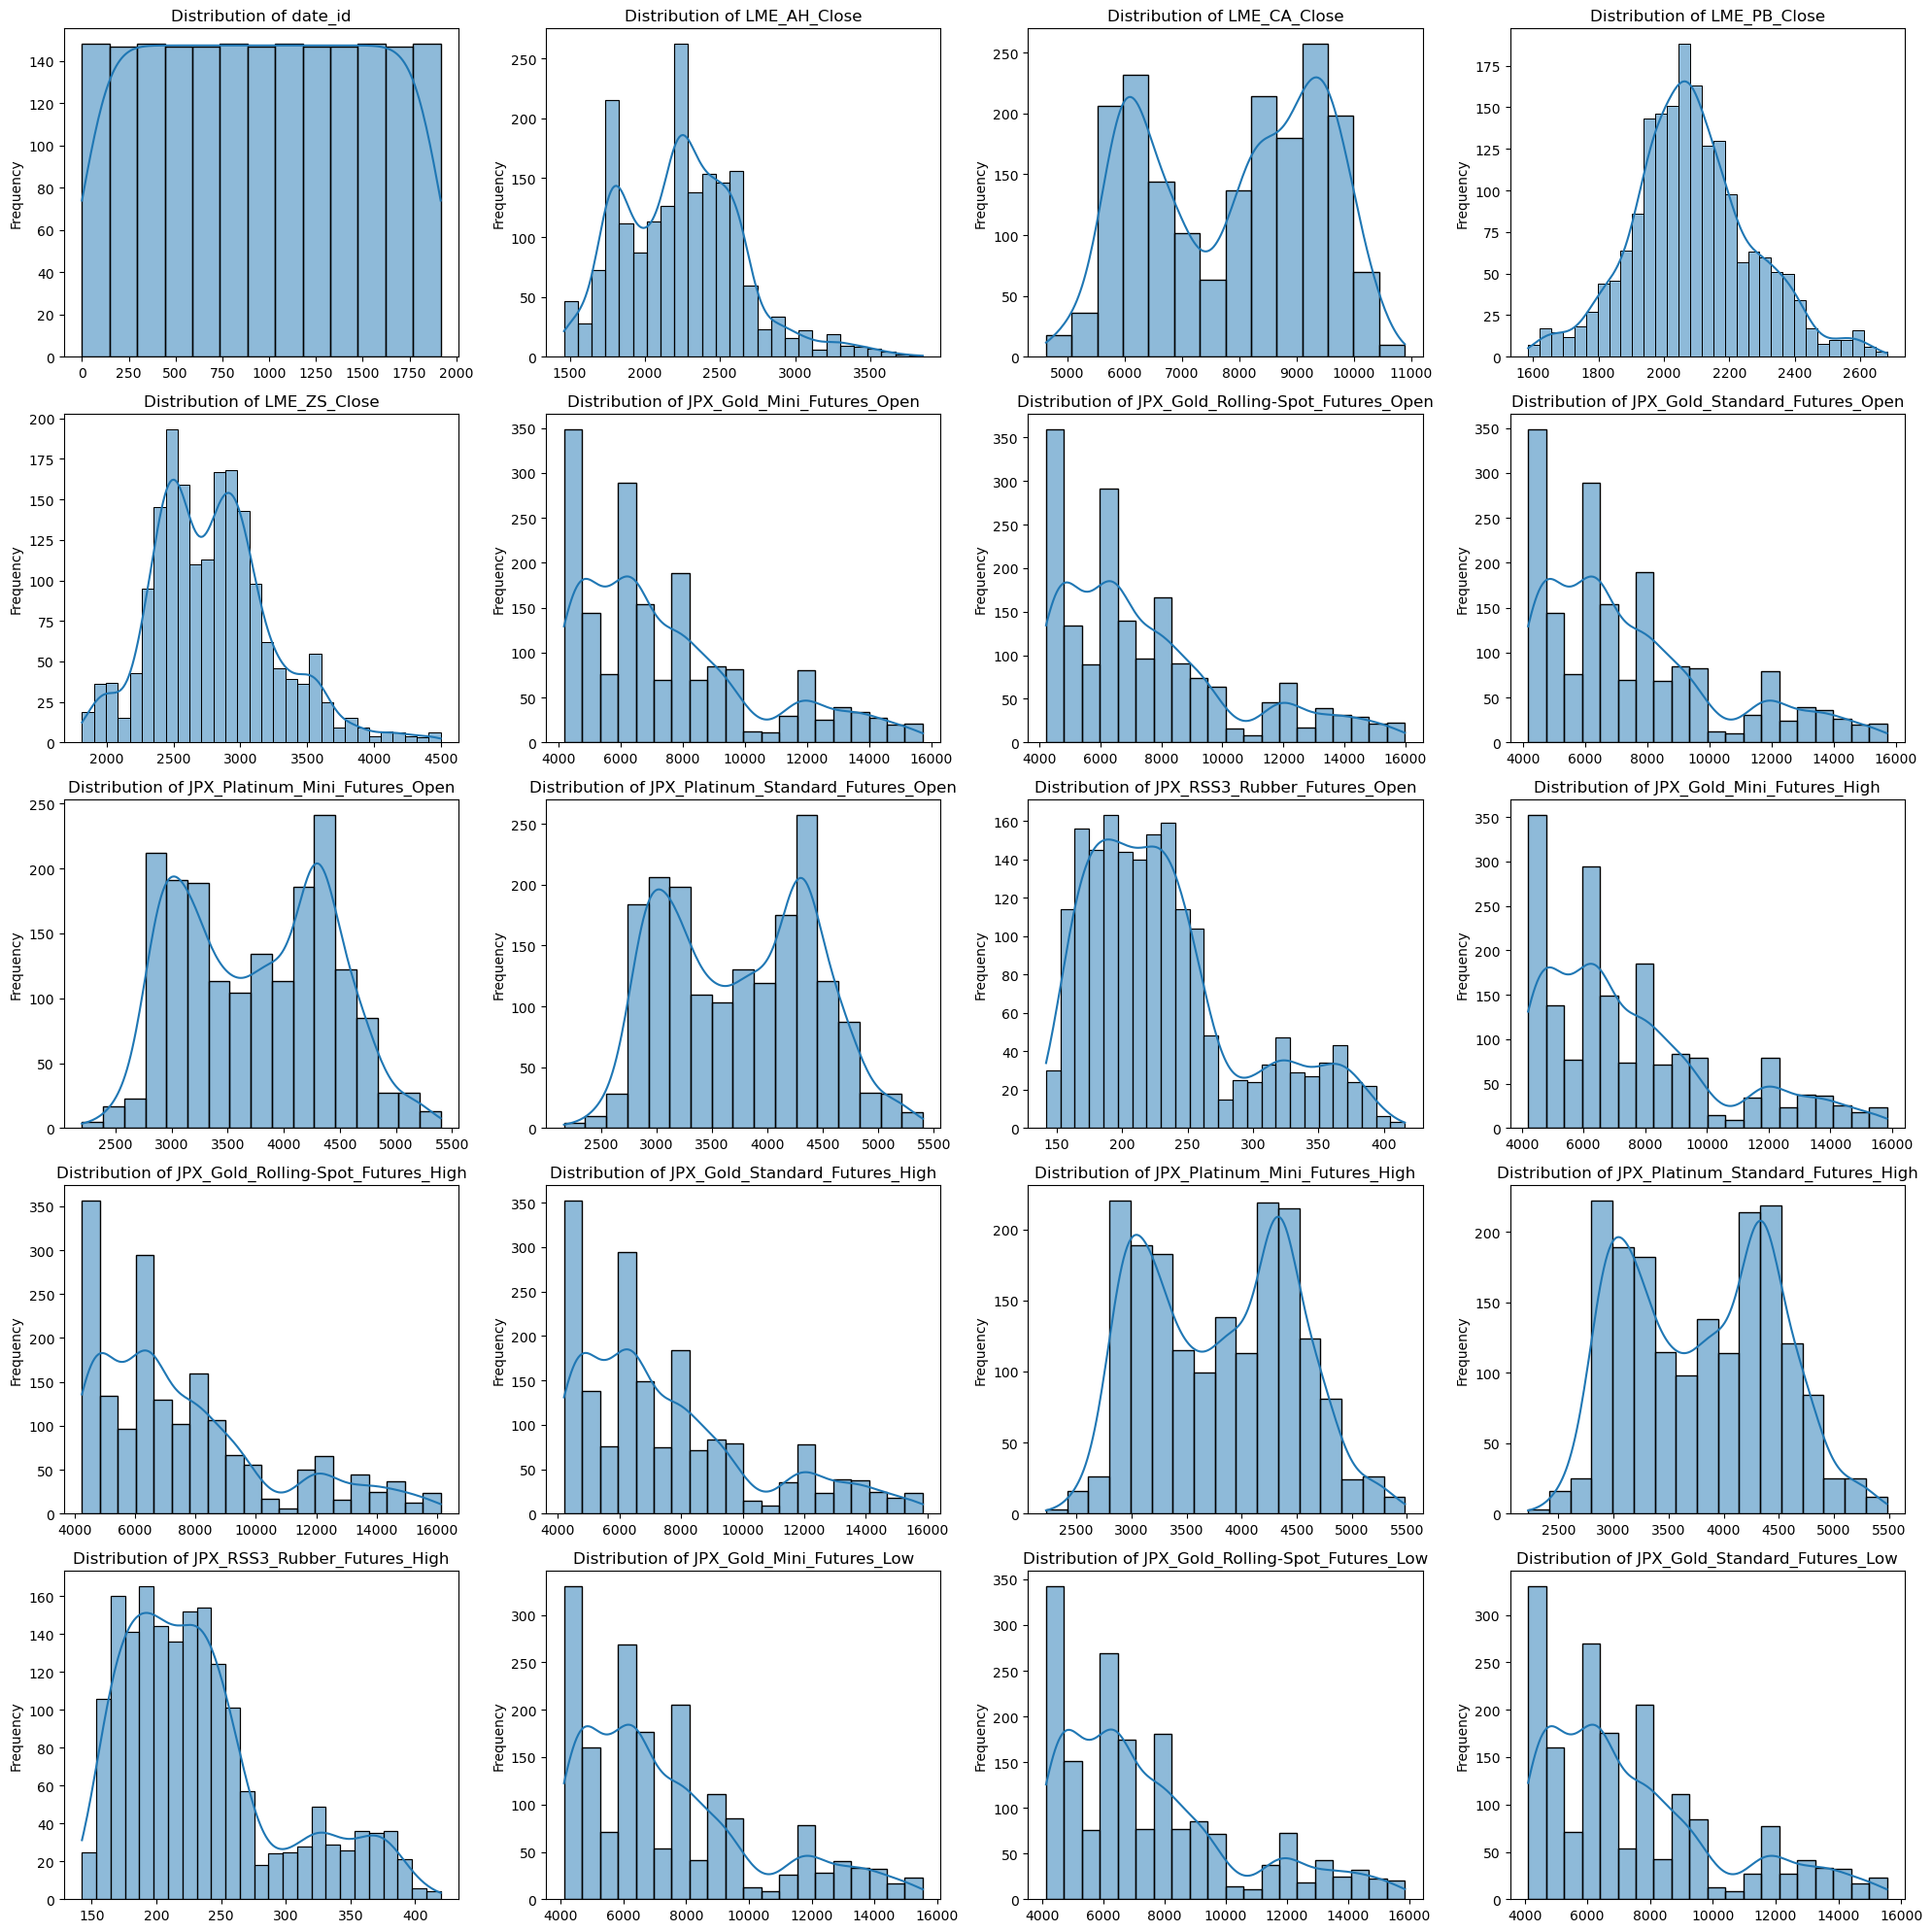

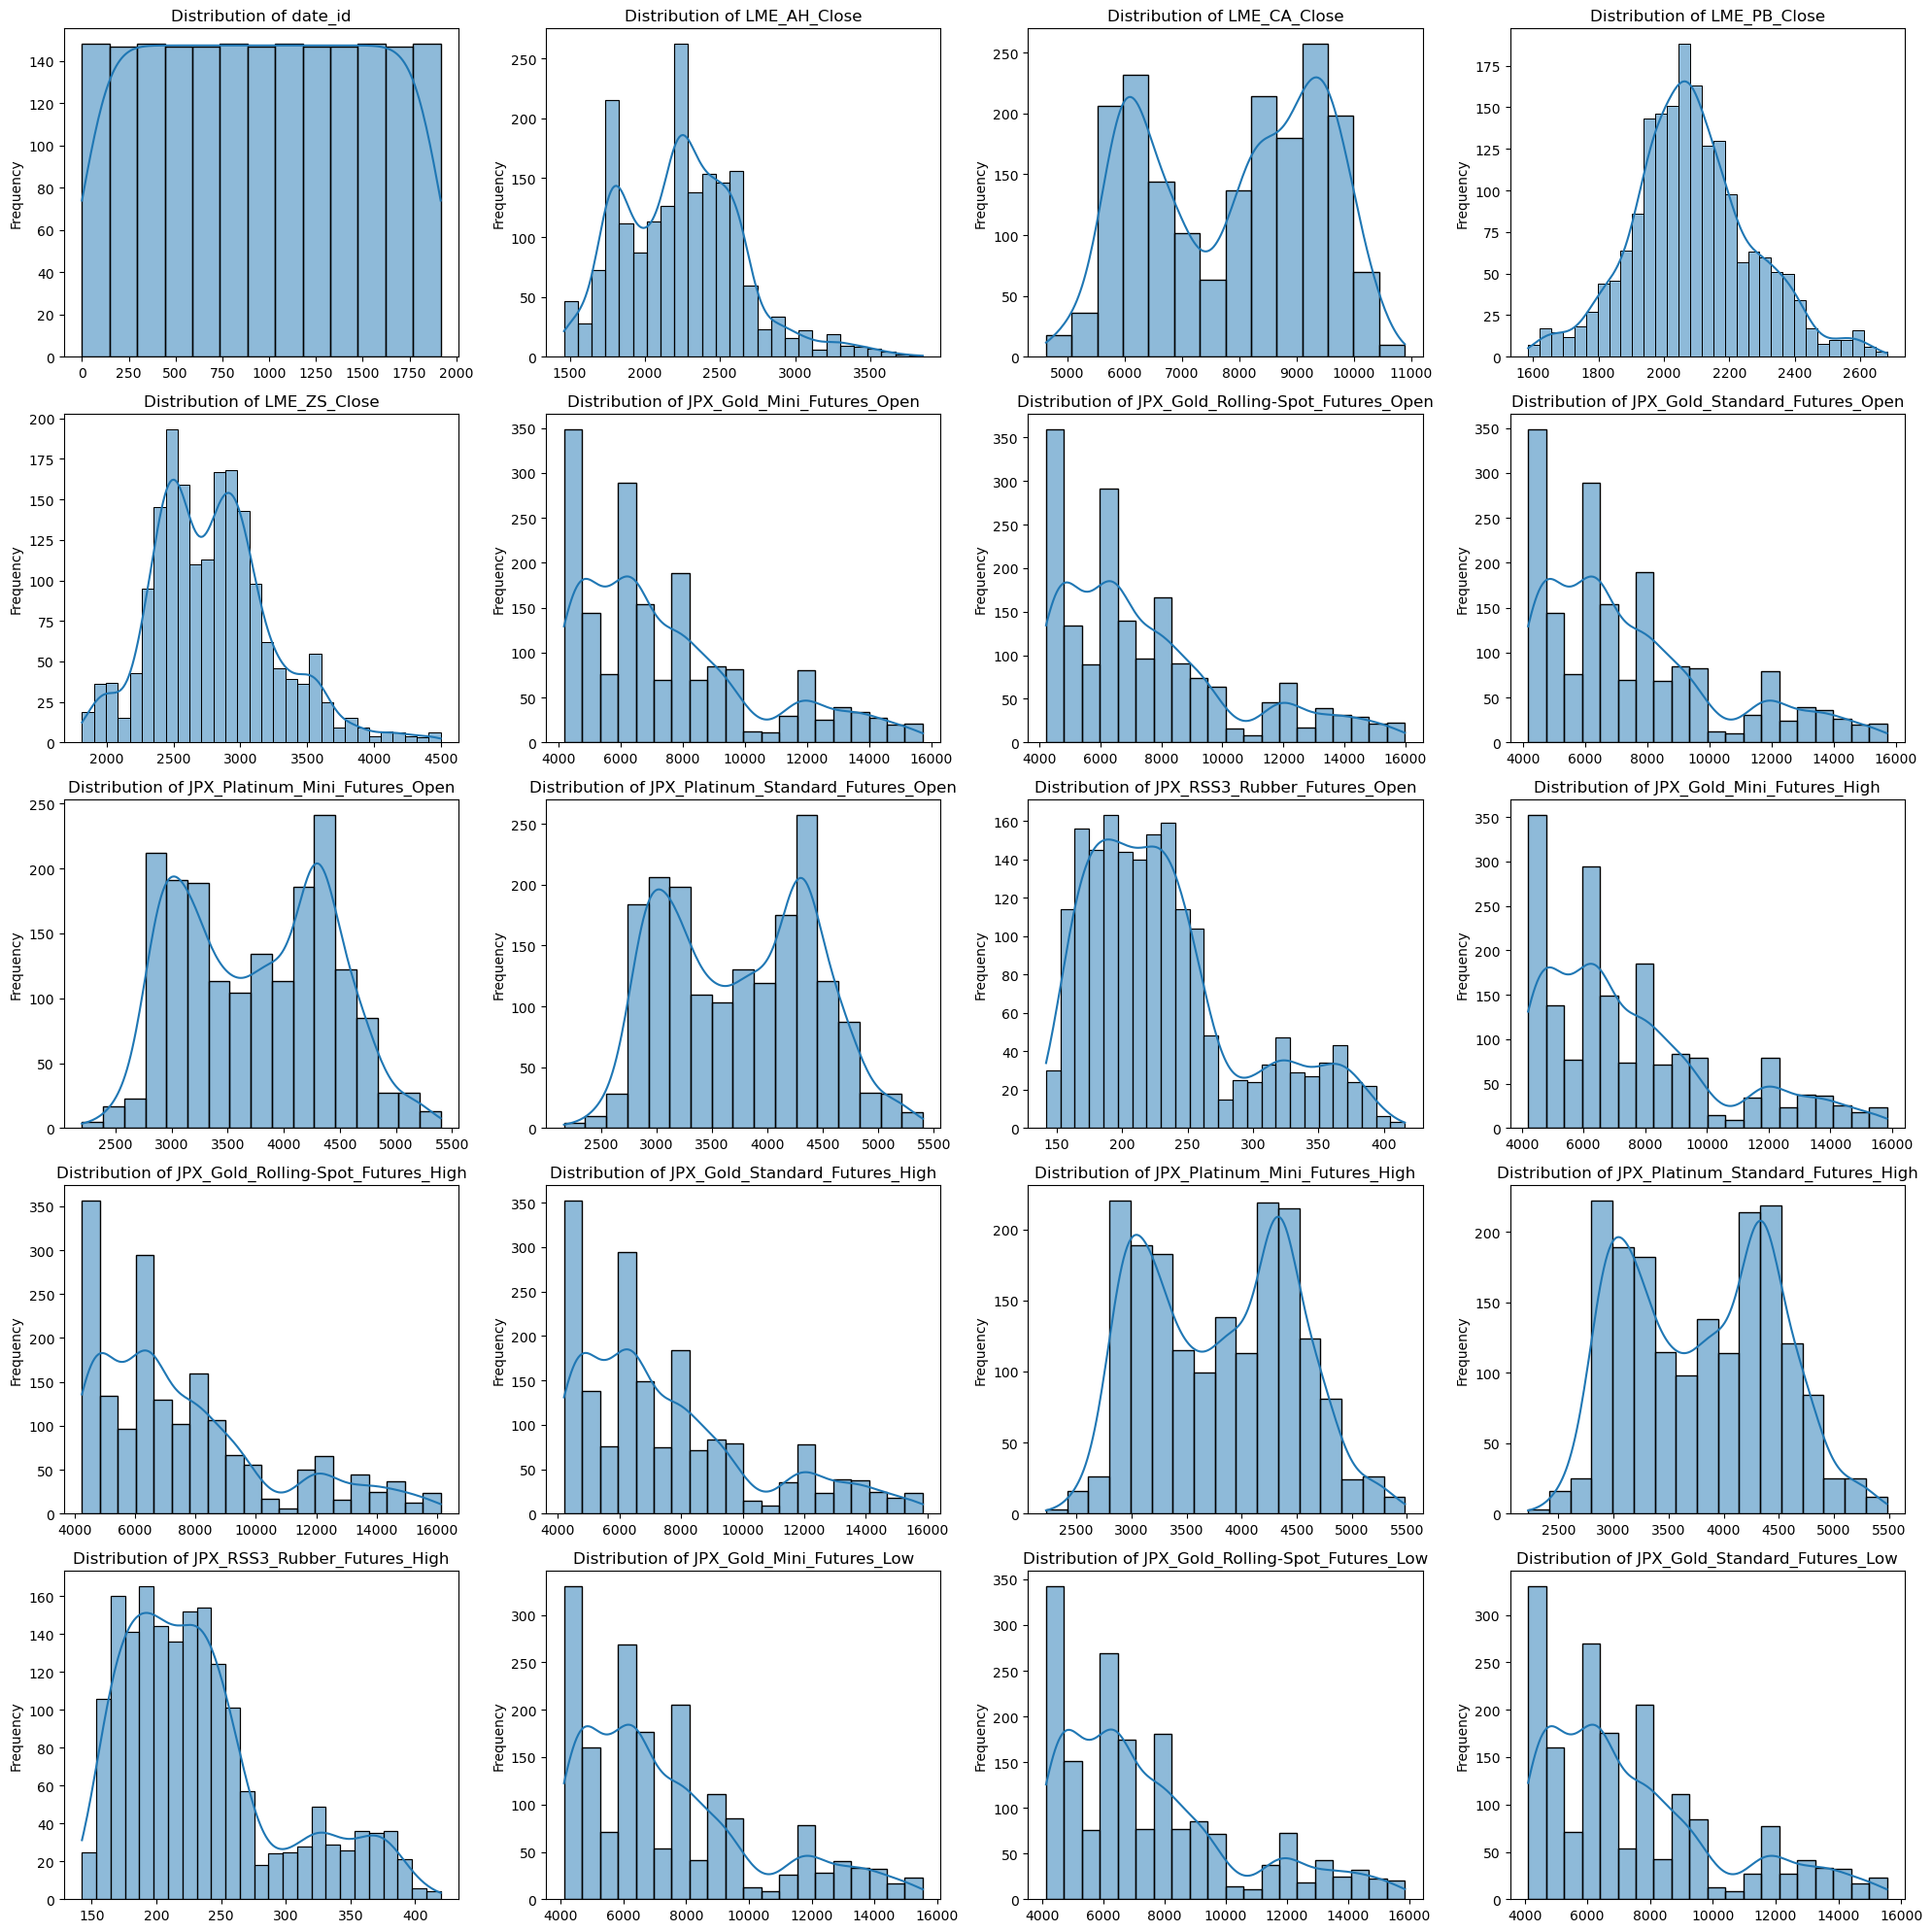

In [7]:
# Plot distribution for each feature in train (first 20 for readability)
import matplotlib.pyplot as plt
import seaborn as sns

num_features = 20  # Change this to 500 to plot all, but it may be slow
feature_cols = train.columns[:num_features]

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.histplot(train[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

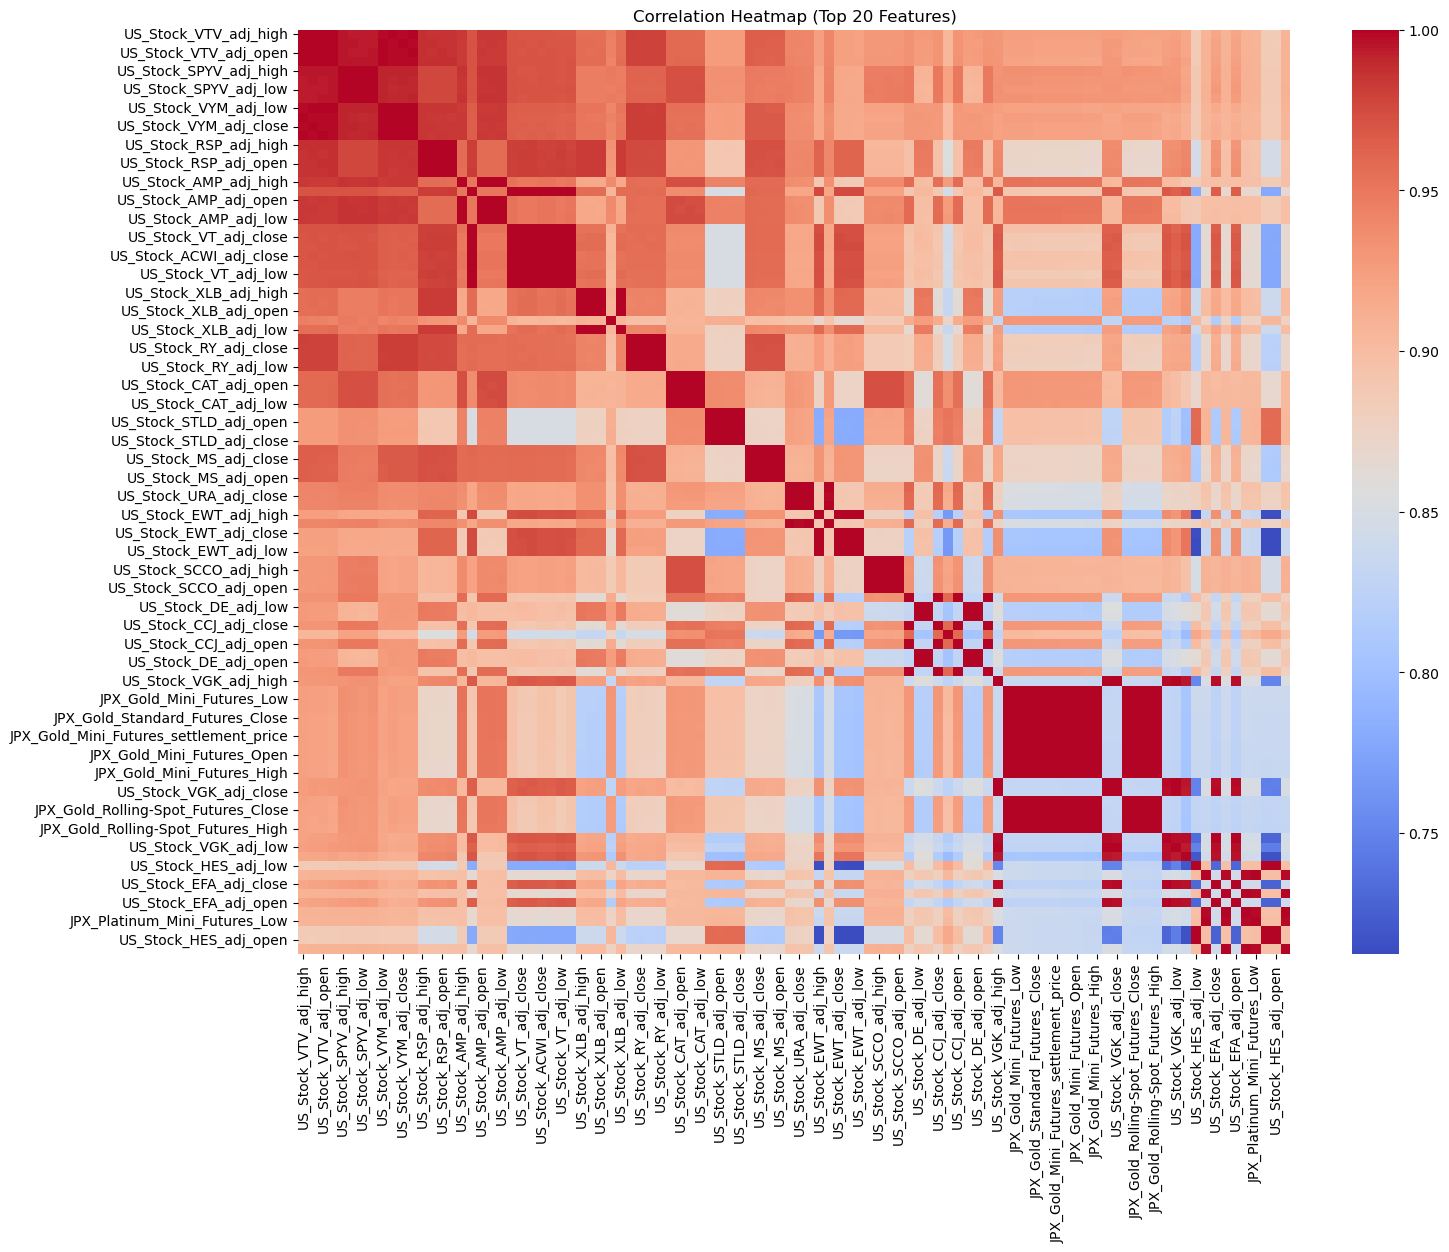

In [13]:
# Correlation analysis for train dataset (showing top 20 features with highest absolute correlation)

corr_matrix = train.corr()

# Get the top 20 features most correlated with each other (excluding self-correlation)
# We'll use the sum of absolute correlations for ranking
corr_sums = corr_matrix.abs().sum().sort_values(ascending=False)
top_20_features = corr_sums.head(100).index

plt.figure(figsize=(16, 12))
sns.heatmap(train[top_20_features].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap (Top 20 Features)')
plt.show()
# print(corr_sums)
# print(top_20_features)

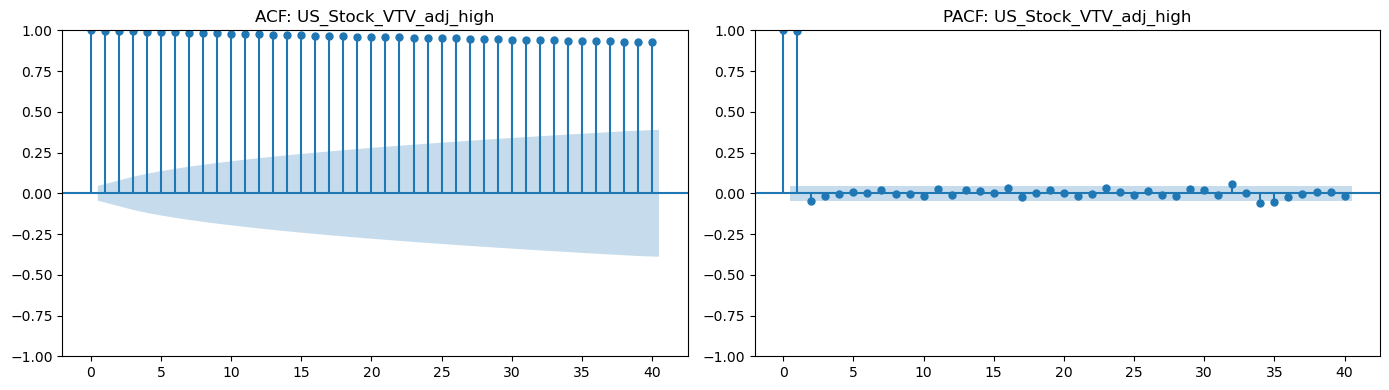

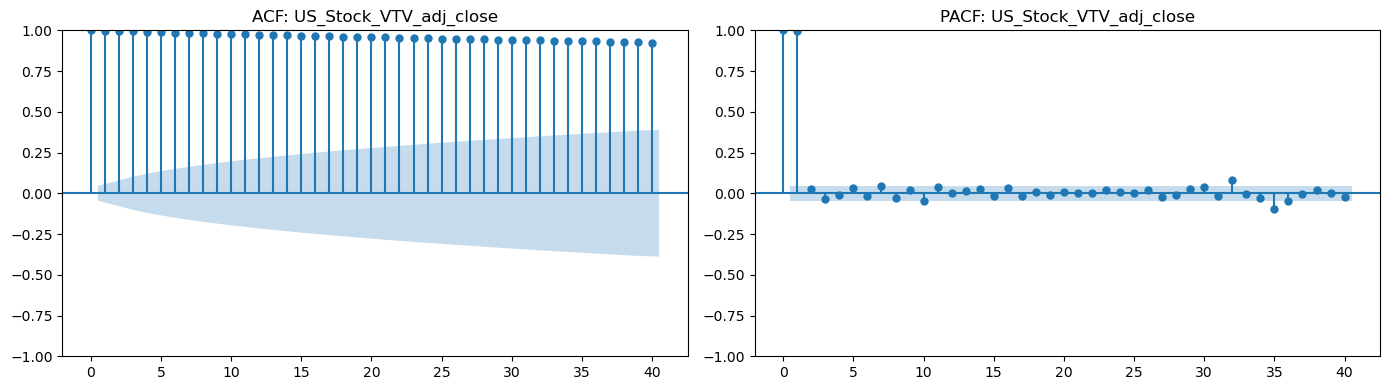

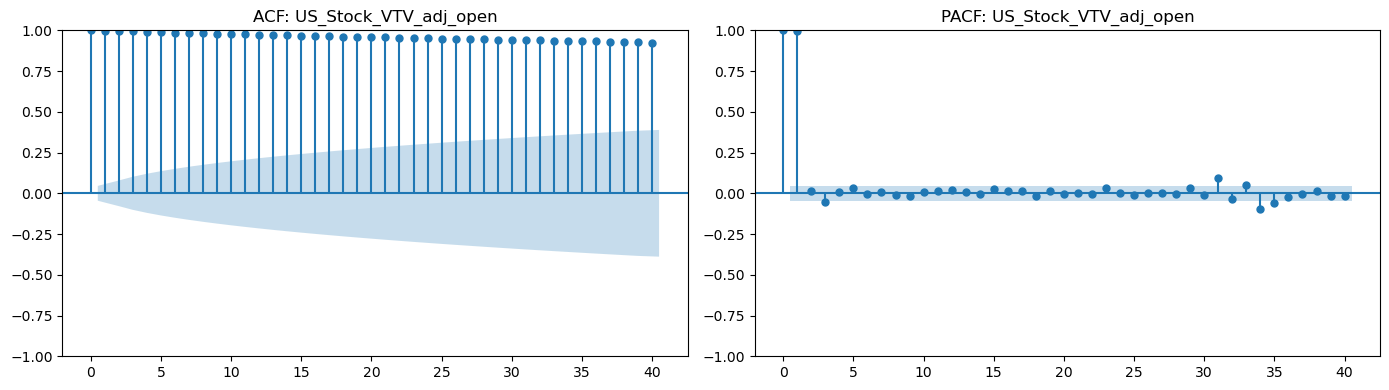

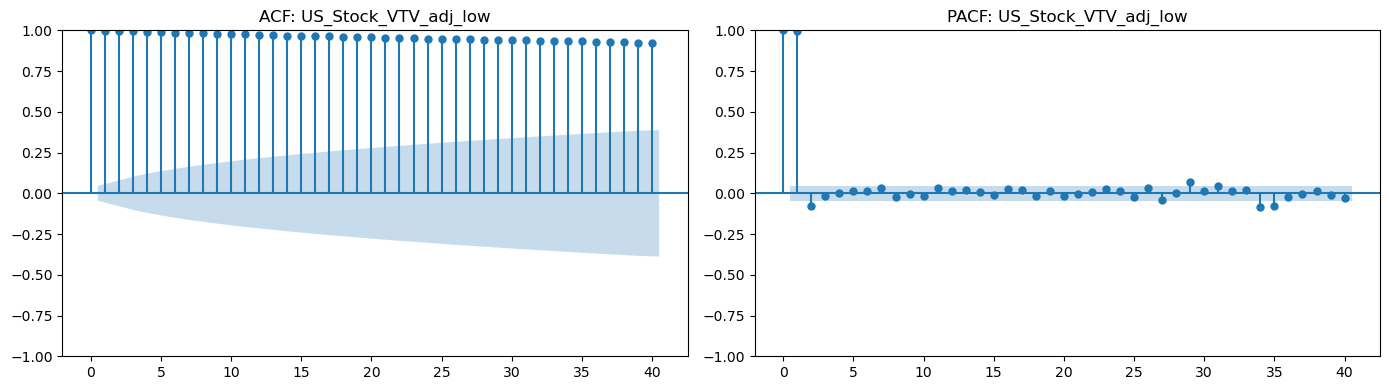

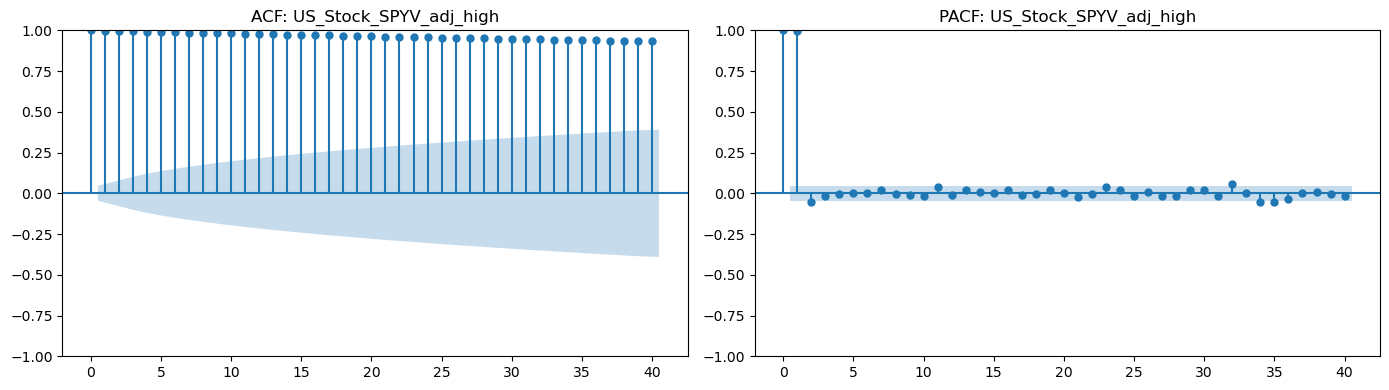

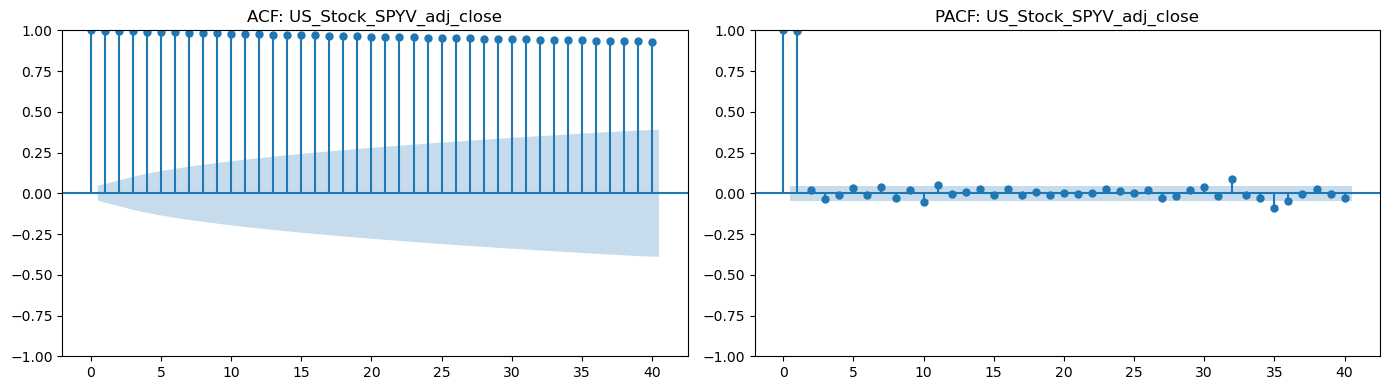

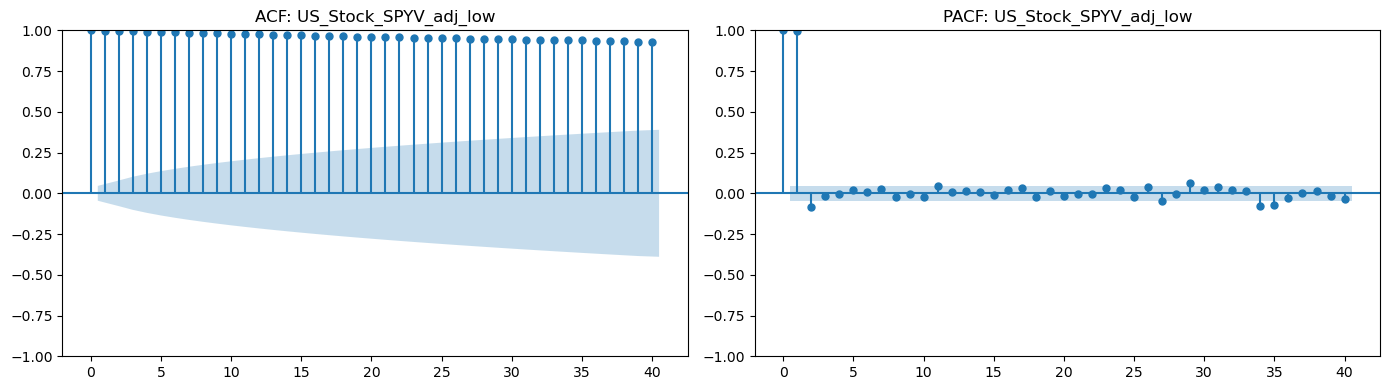

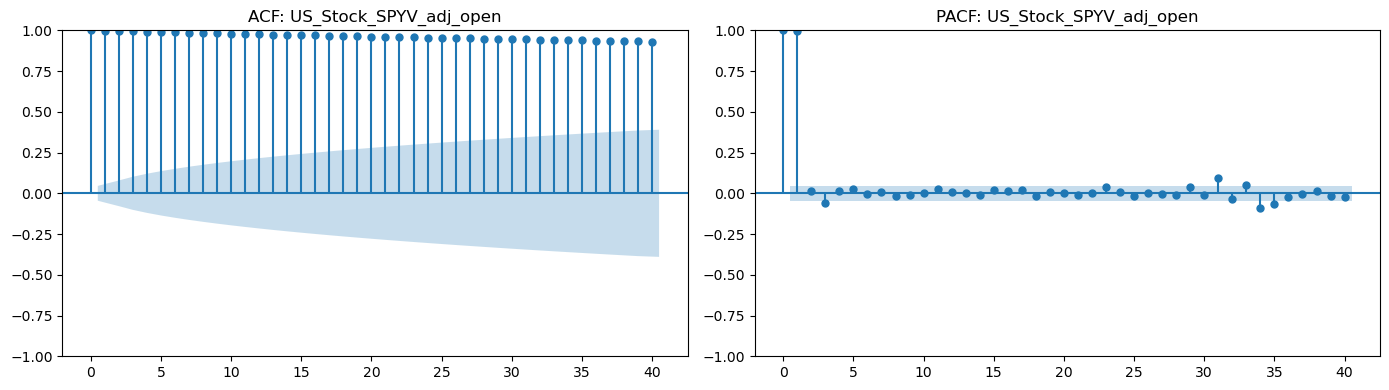

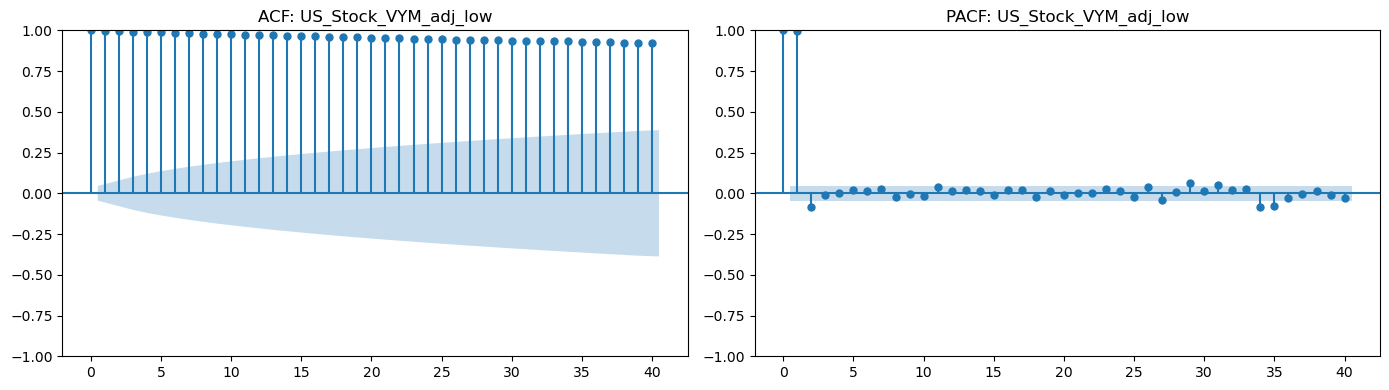

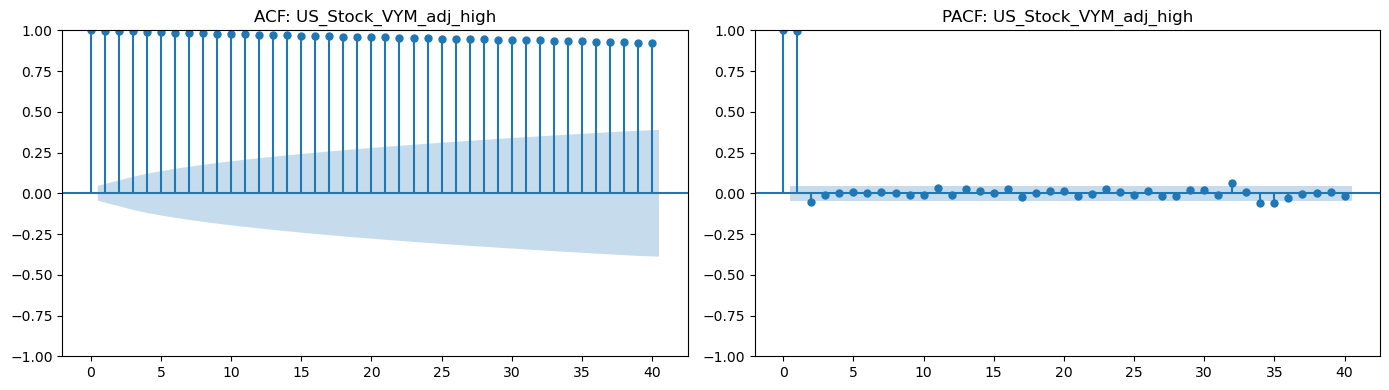

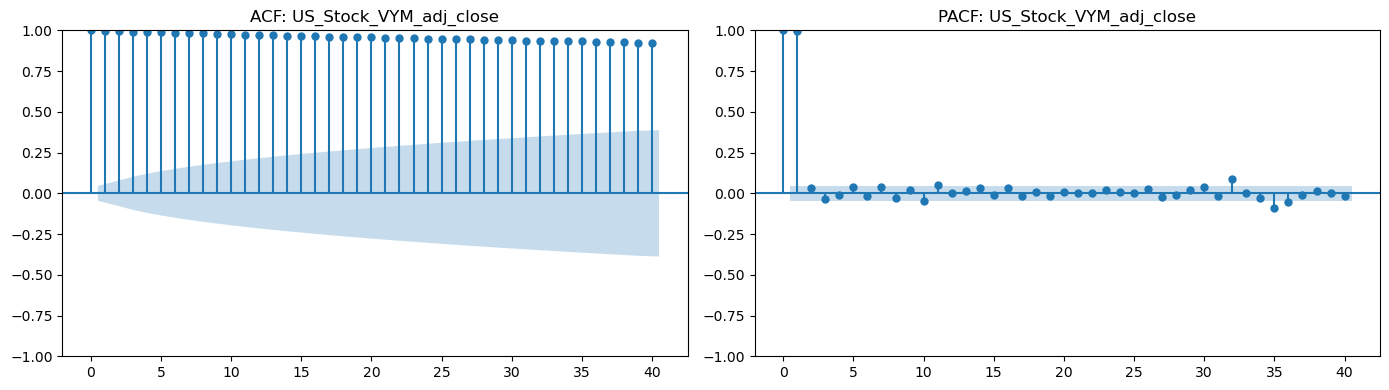

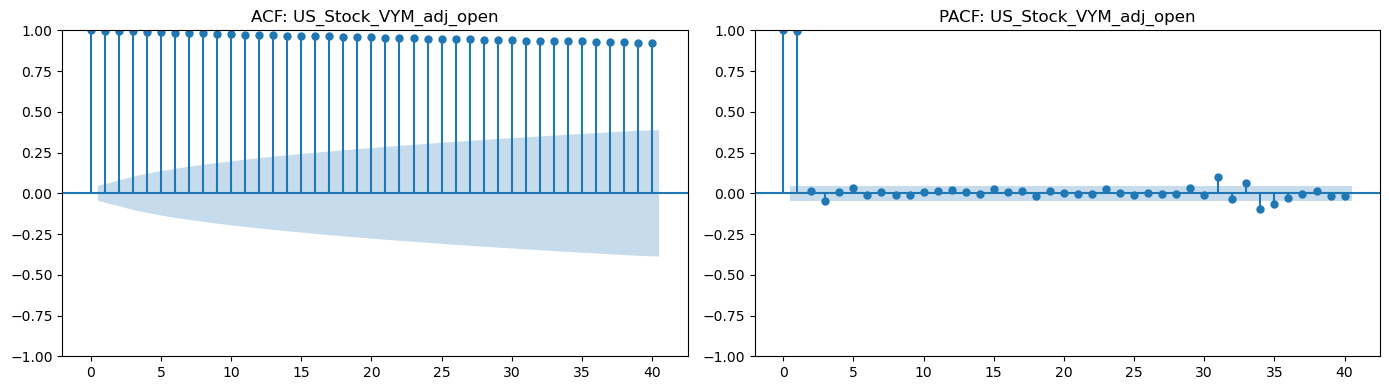

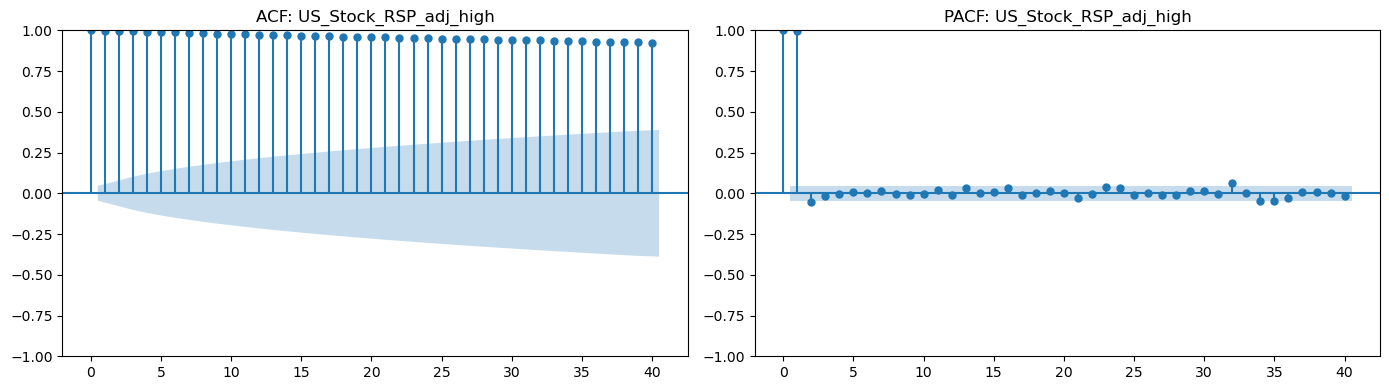

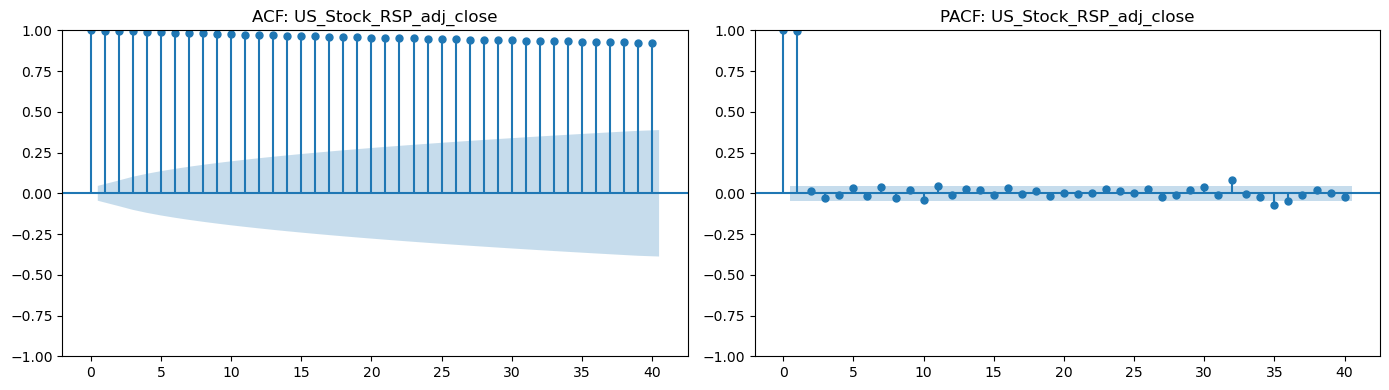

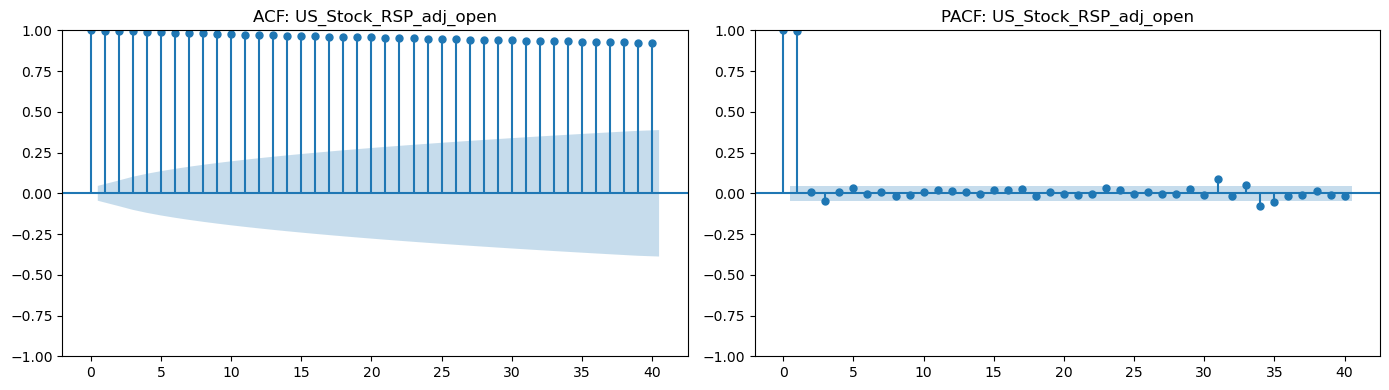

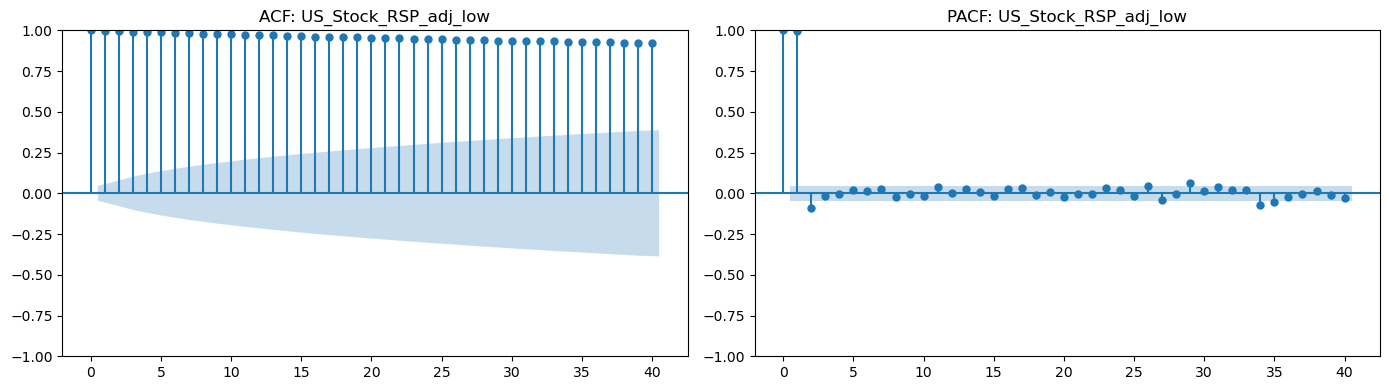

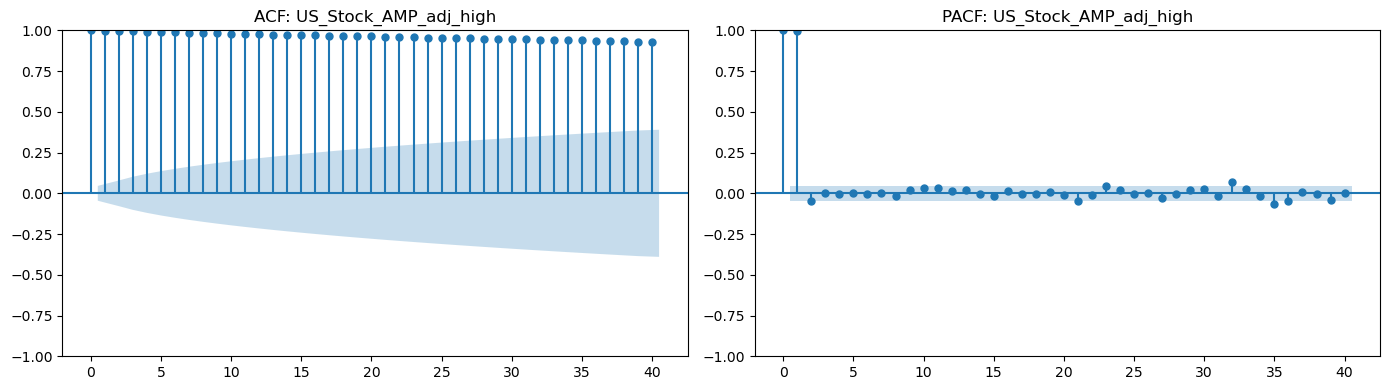

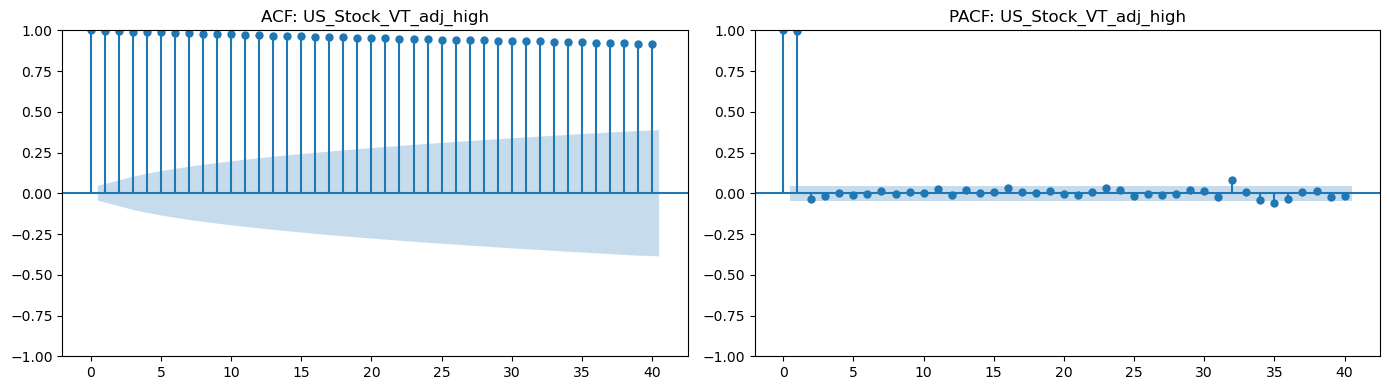

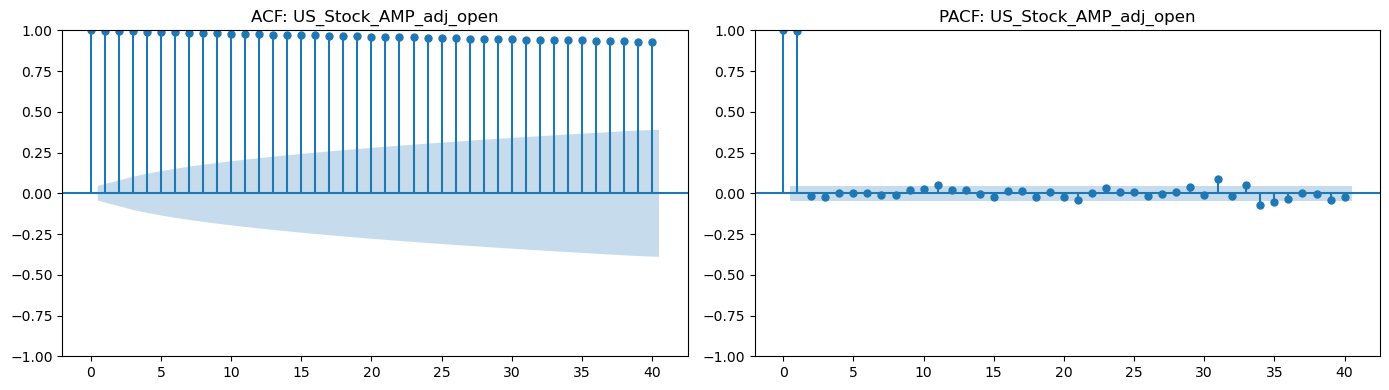

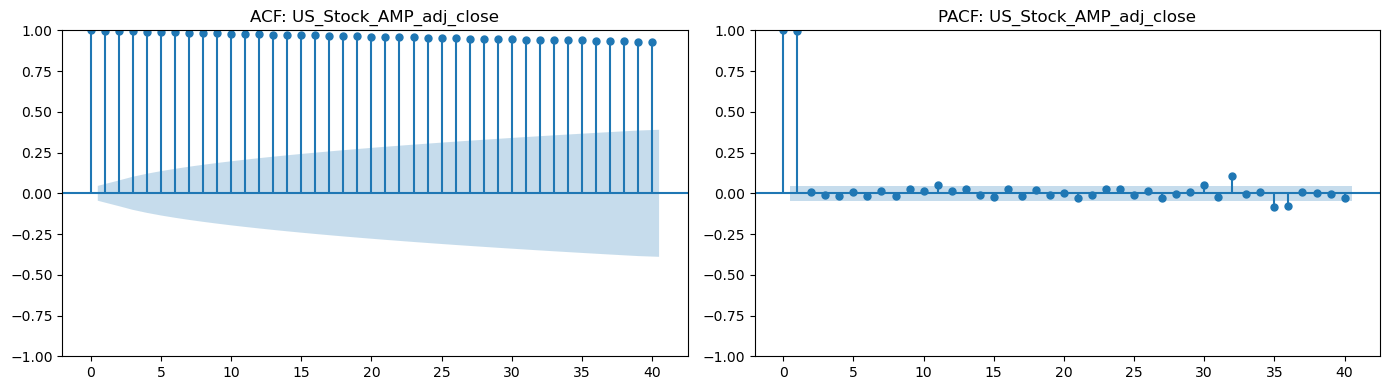

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Perform ACF and PACF for each feature in top_20_features (limit to first 20 for readability)
for feature in list(top_20_features)[:20]:
    series = train[feature].dropna()
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plot_acf(series, ax=plt.gca(), lags=40)
    plt.title(f'ACF: {feature}')
    plt.subplot(1, 2, 2)
    plot_pacf(series, ax=plt.gca(), lags=40)
    plt.title(f'PACF: {feature}')
    plt.tight_layout()
    plt.show()

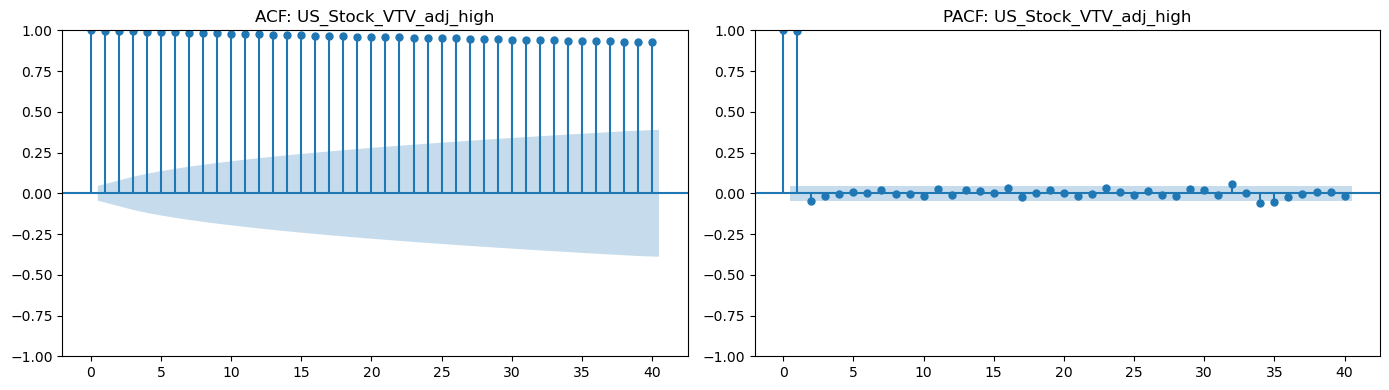

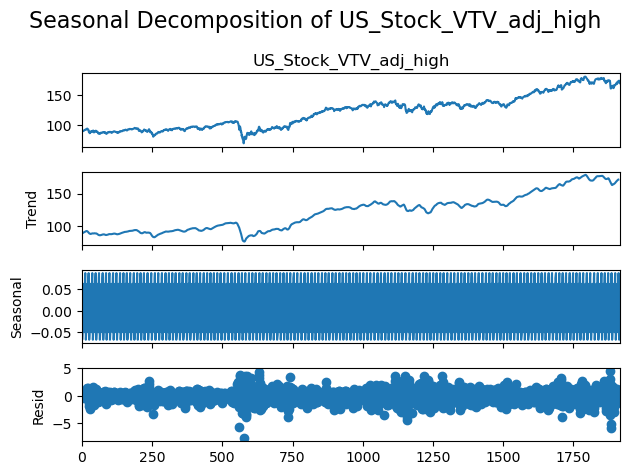

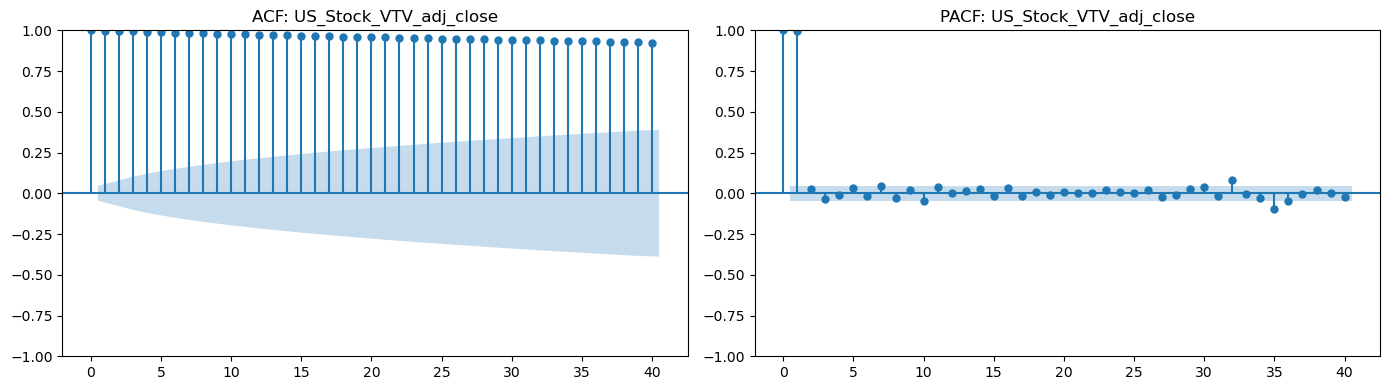

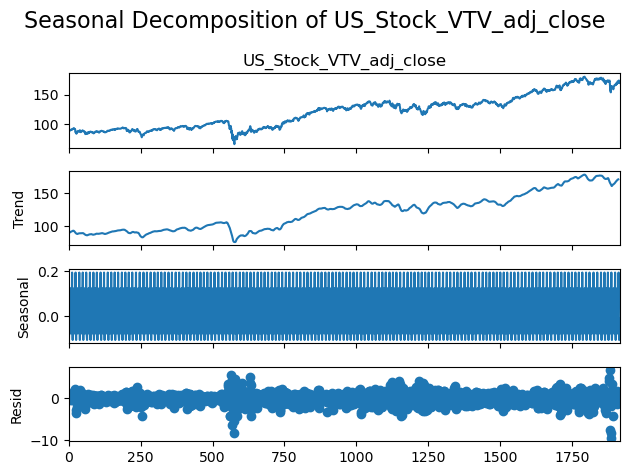

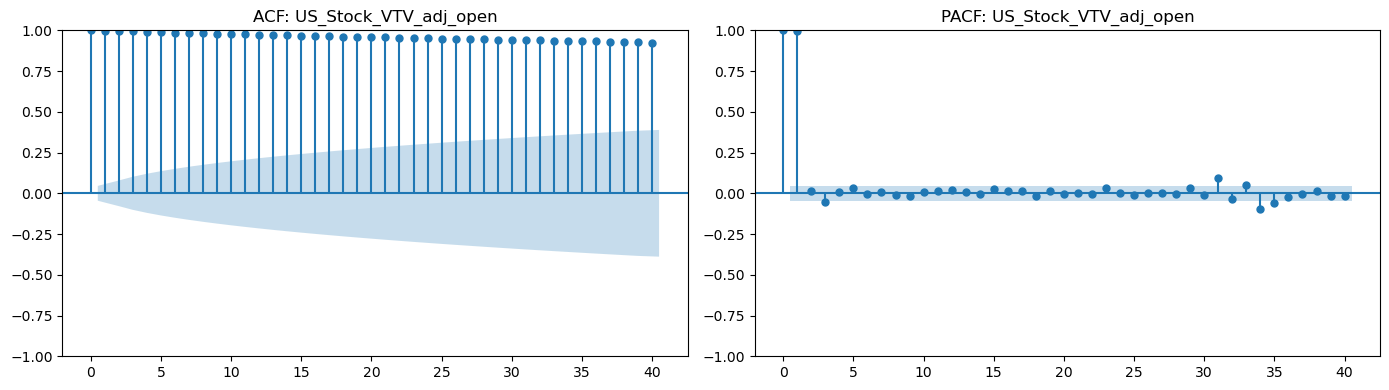

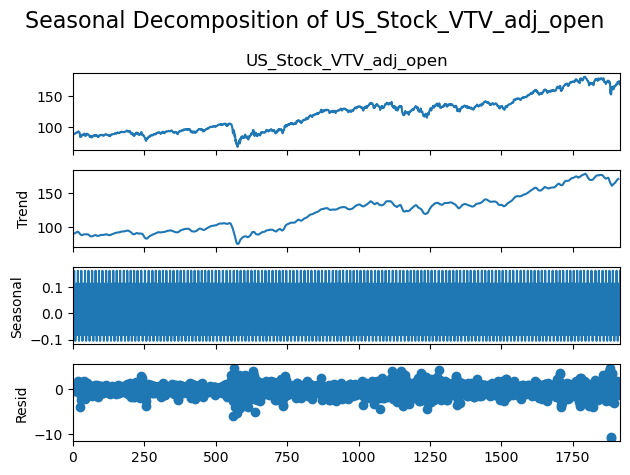

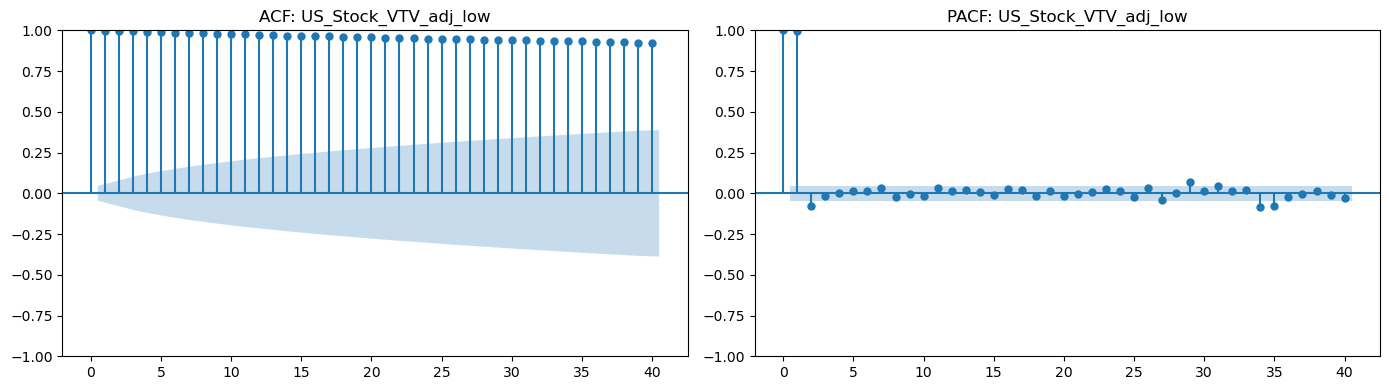

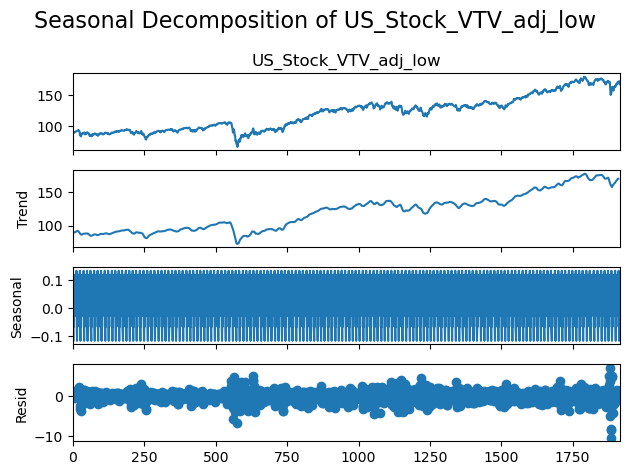

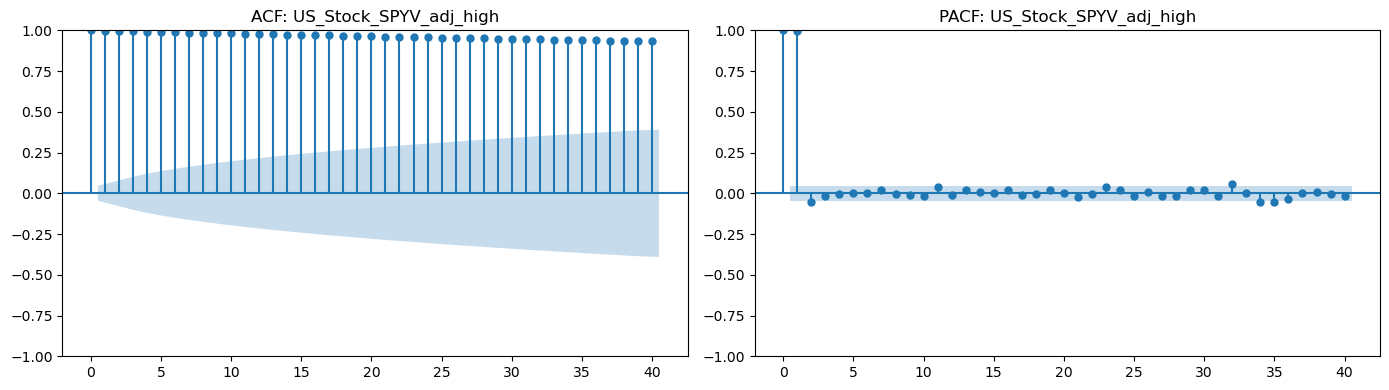

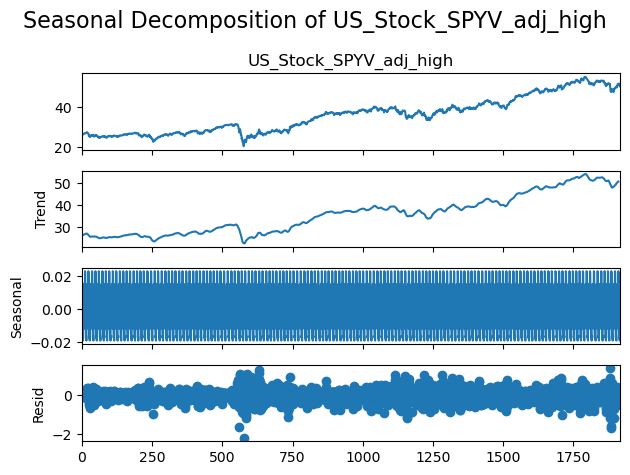

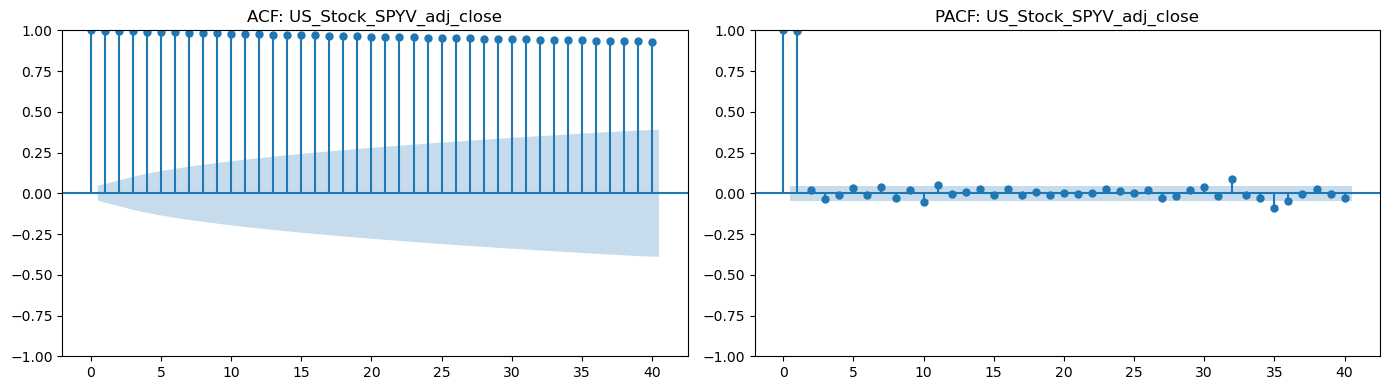

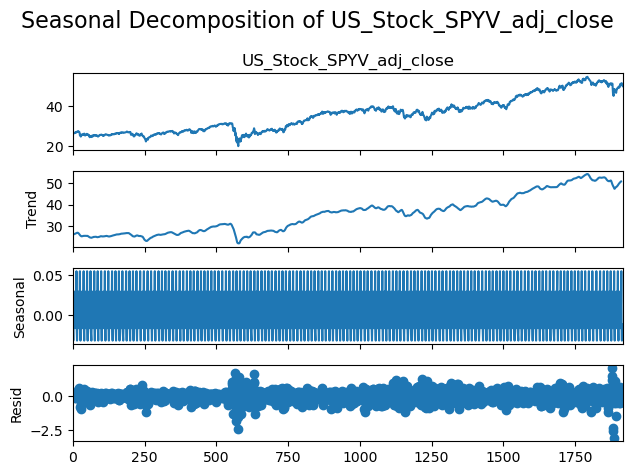

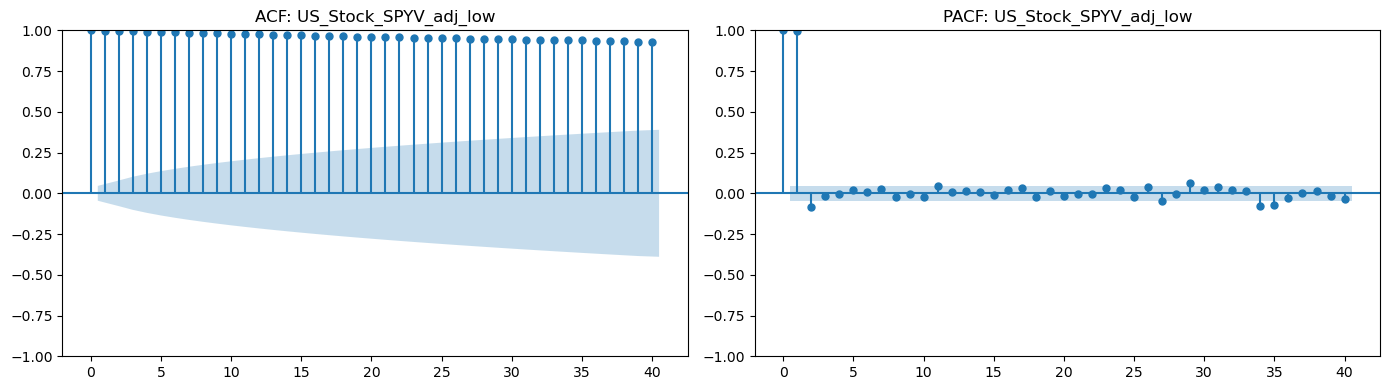

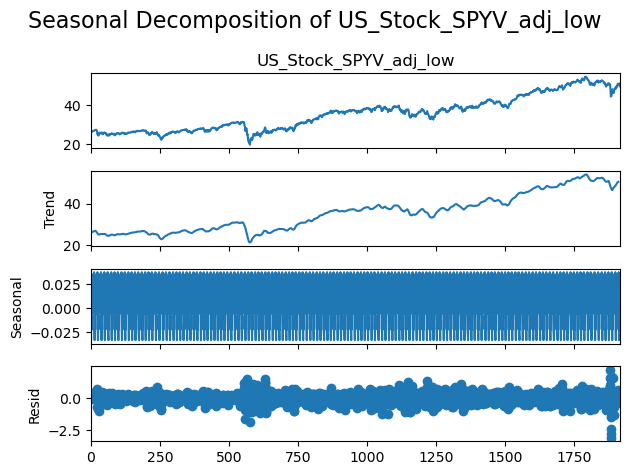

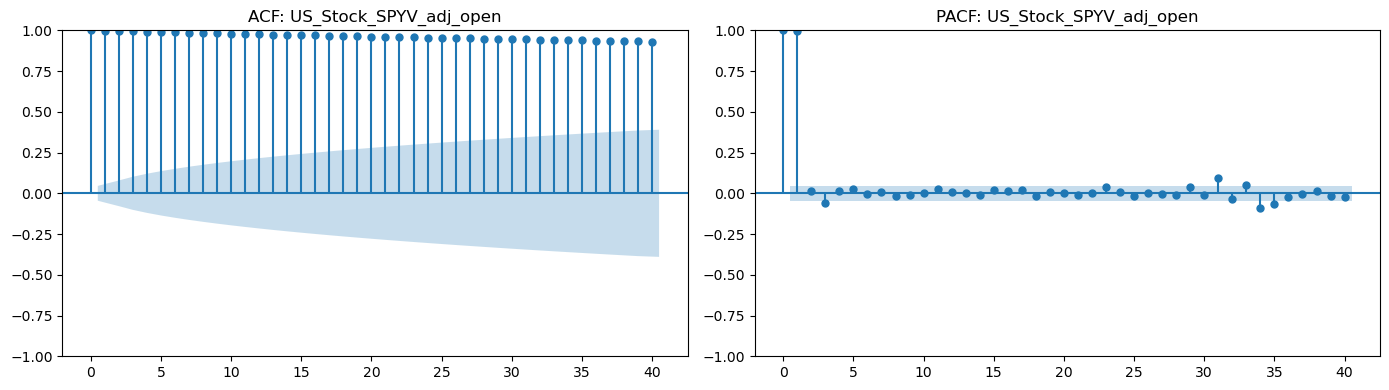

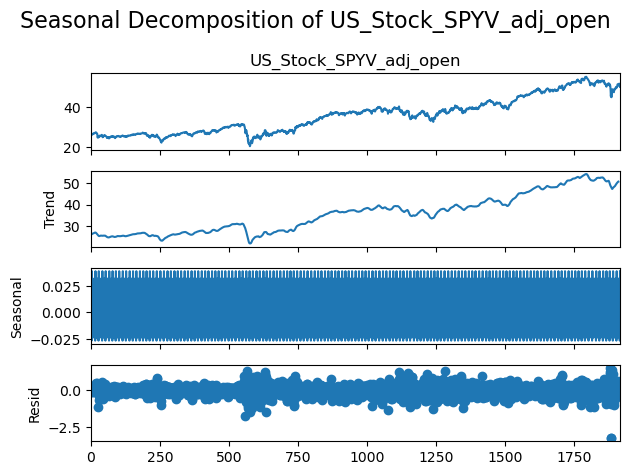

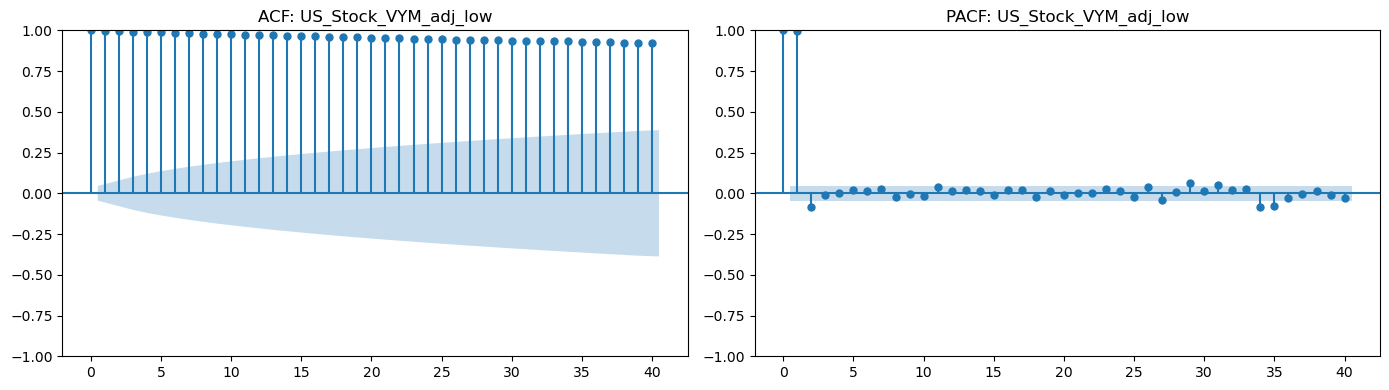

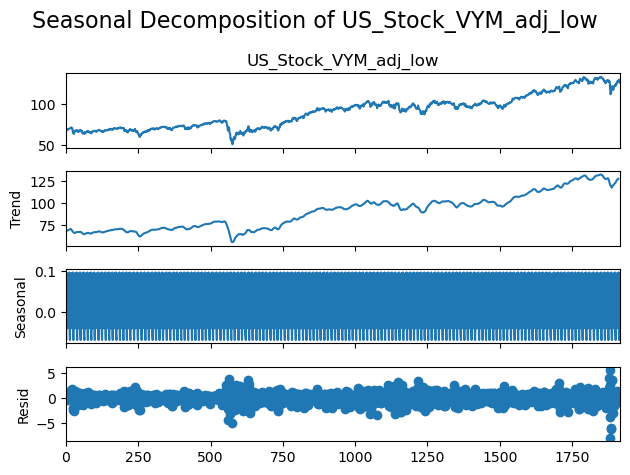

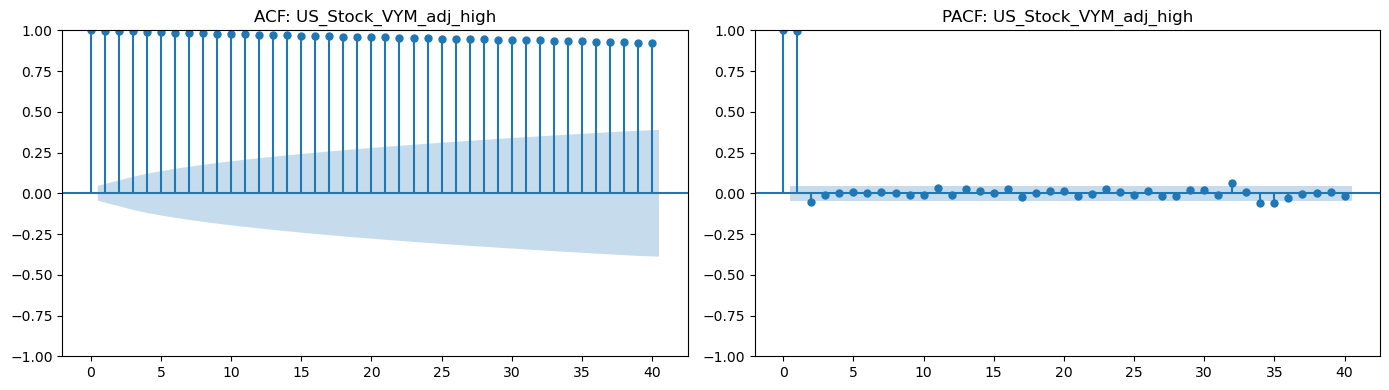

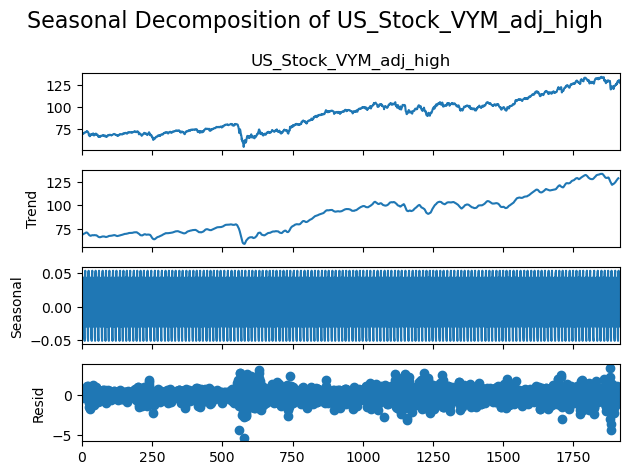

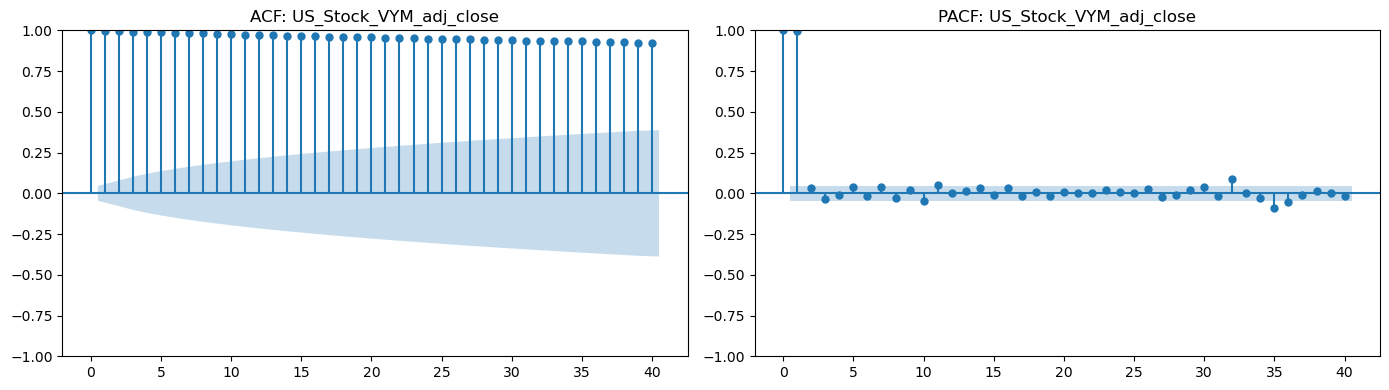

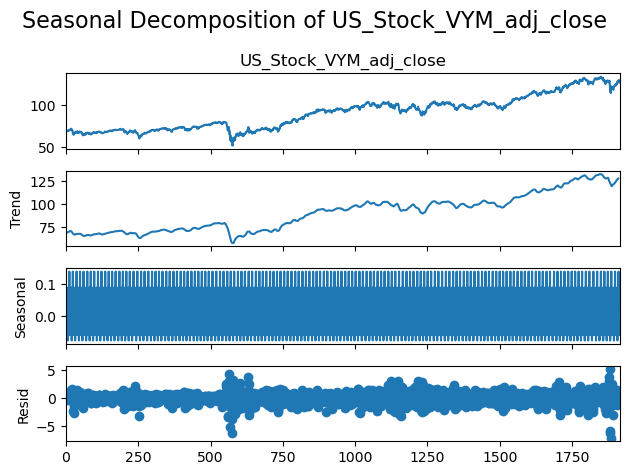

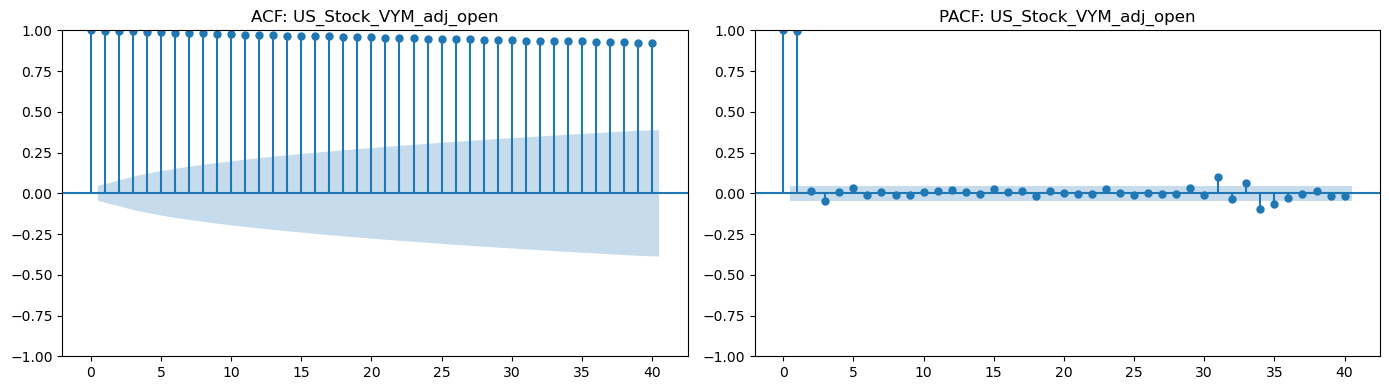

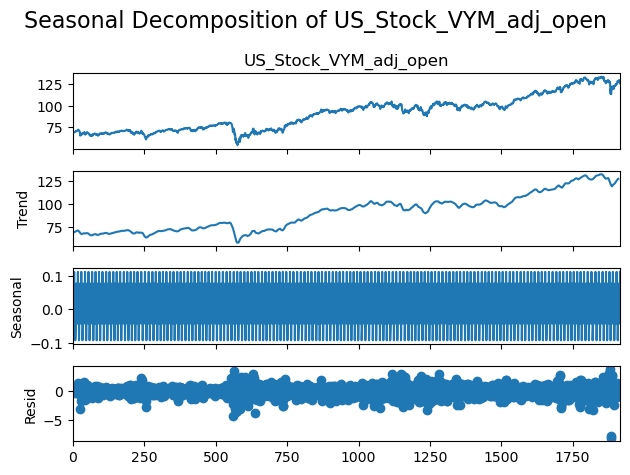

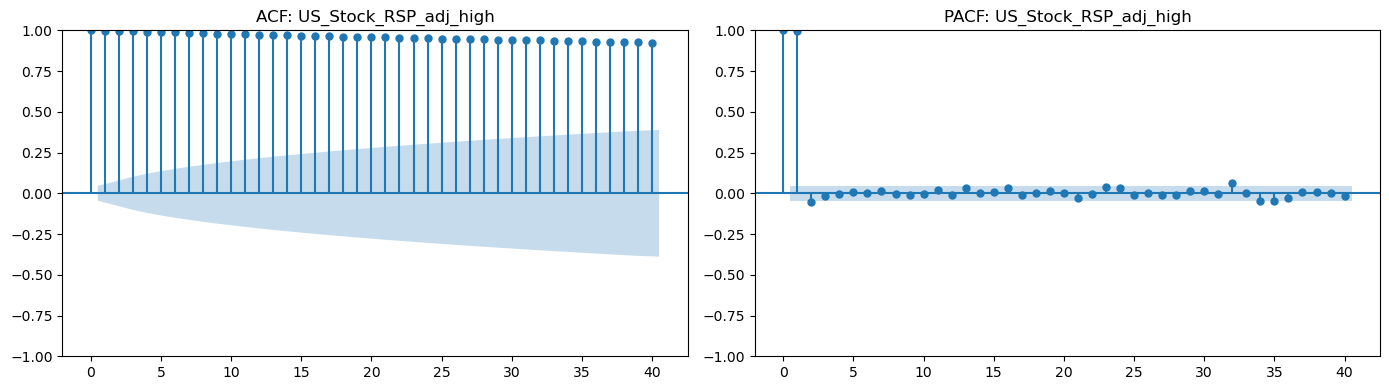

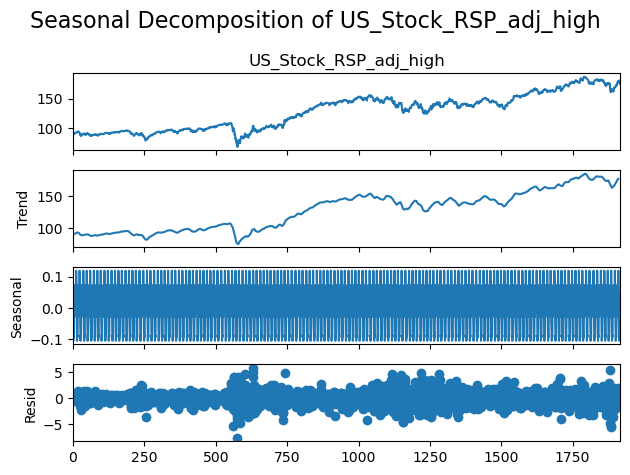

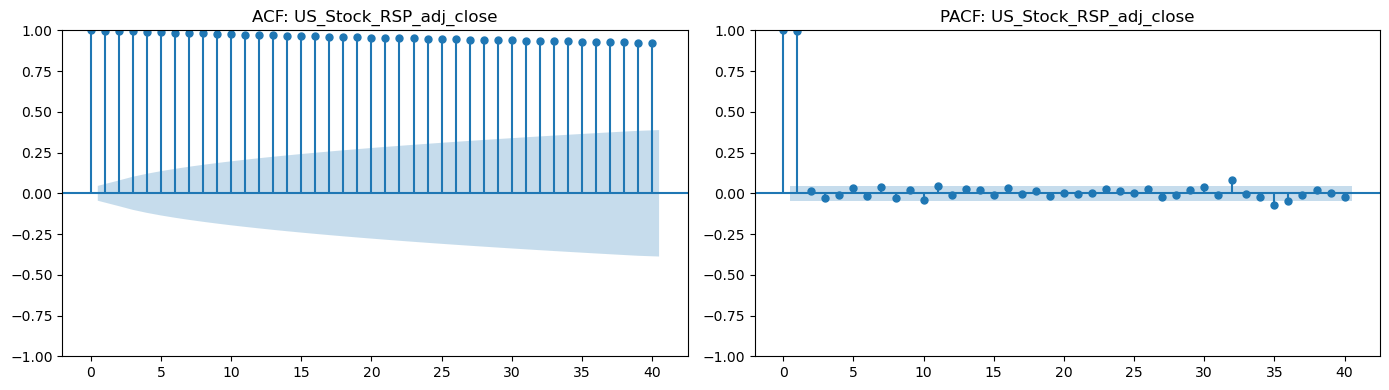

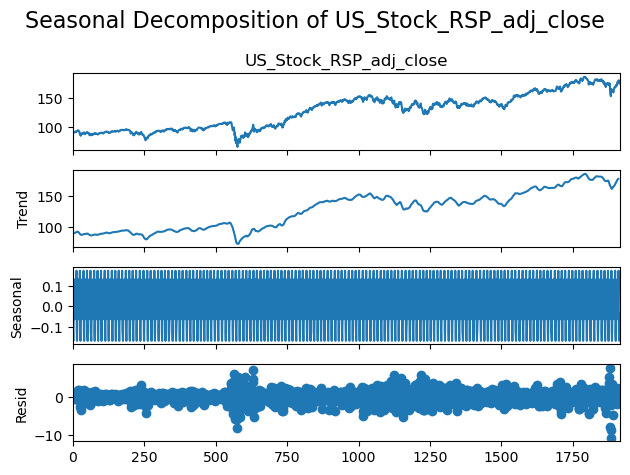

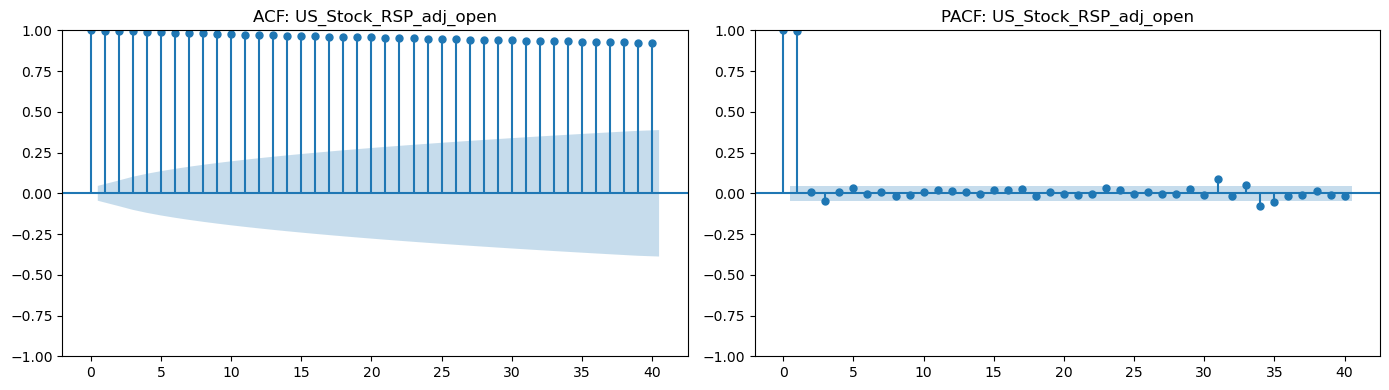

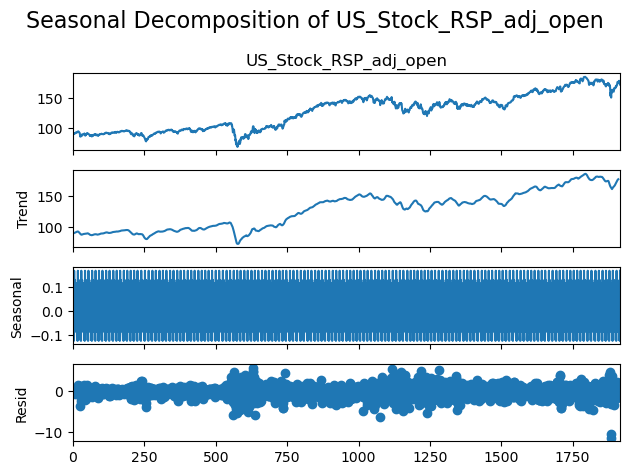

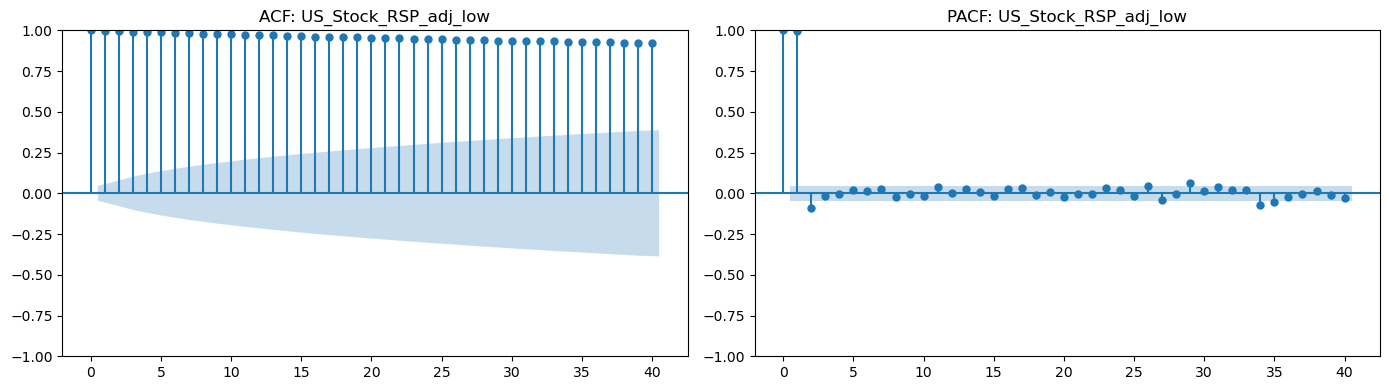

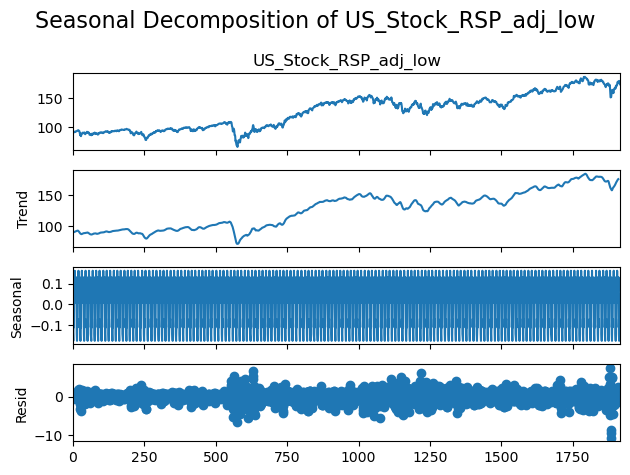

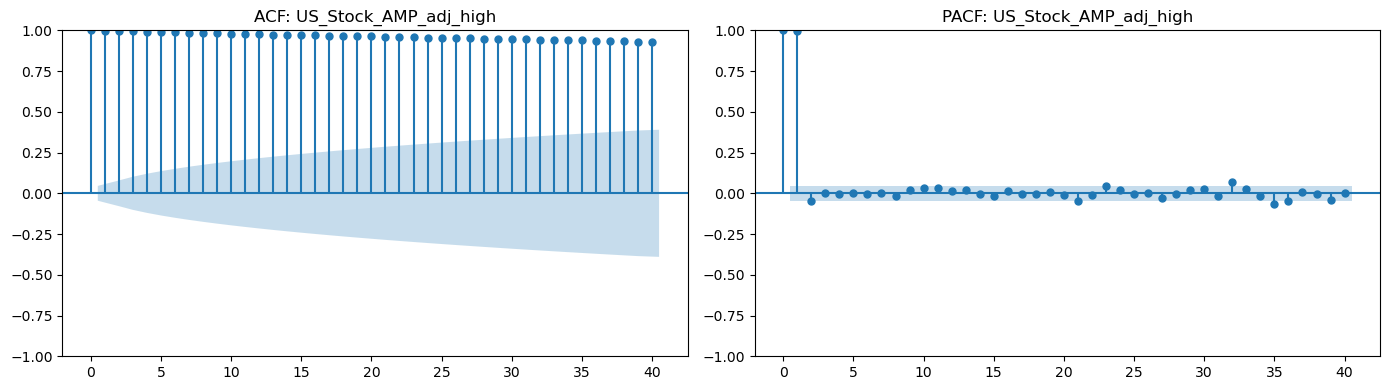

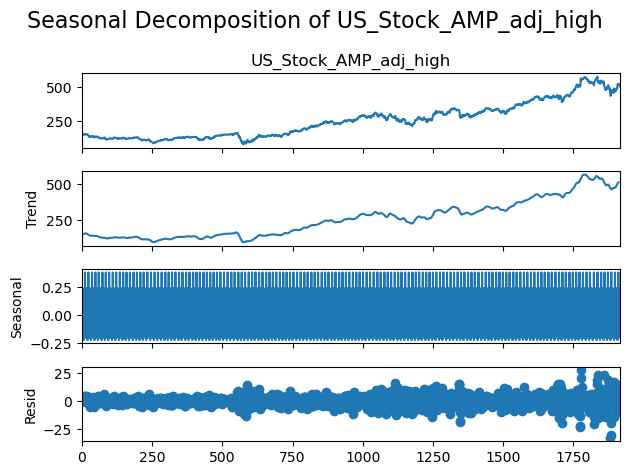

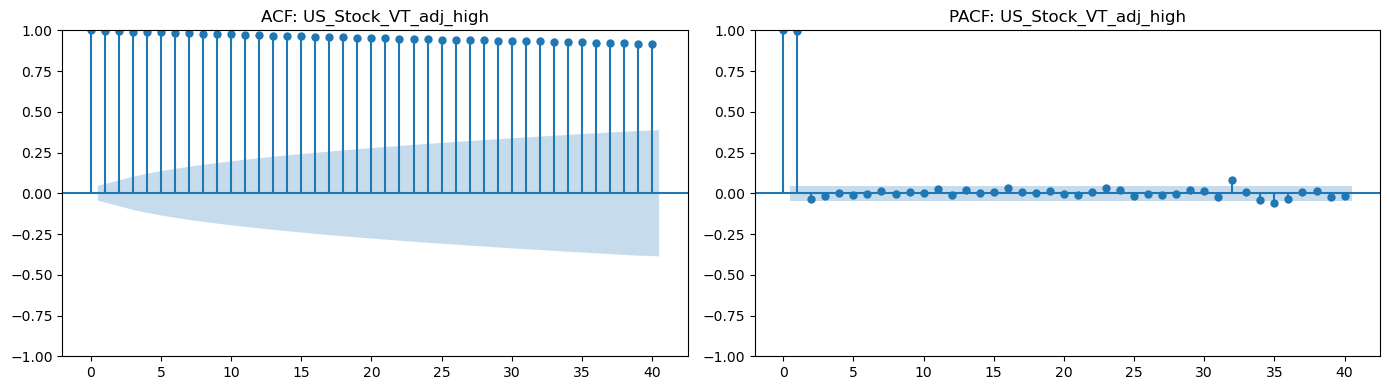

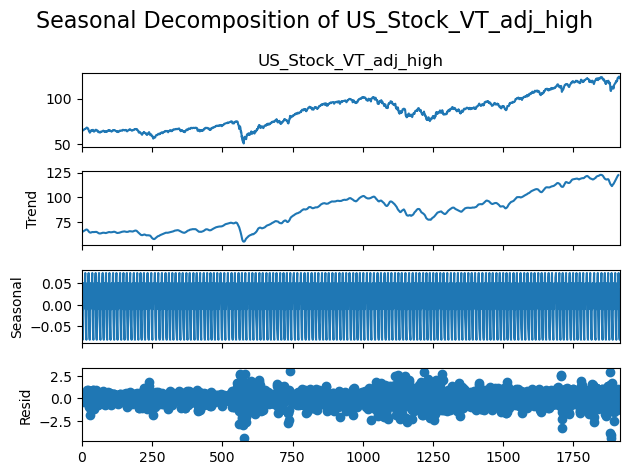

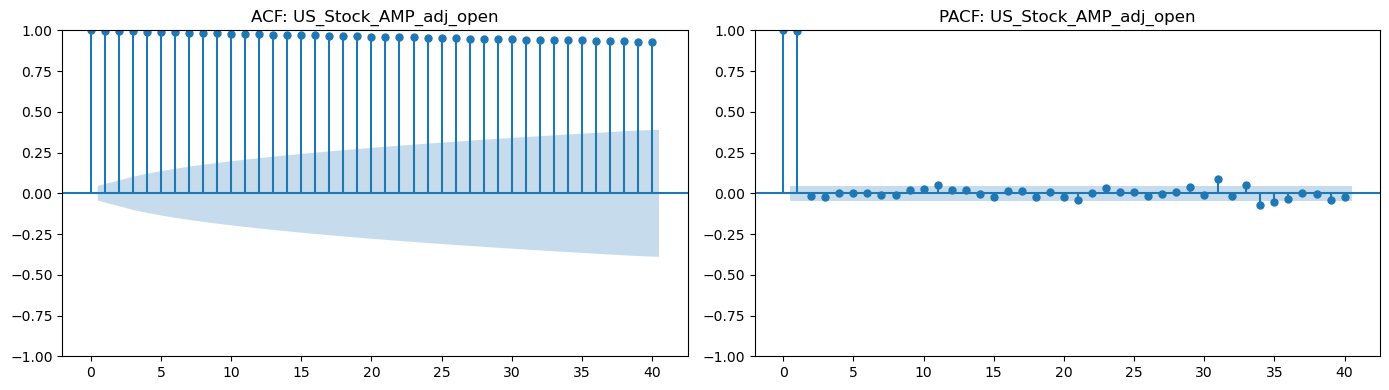

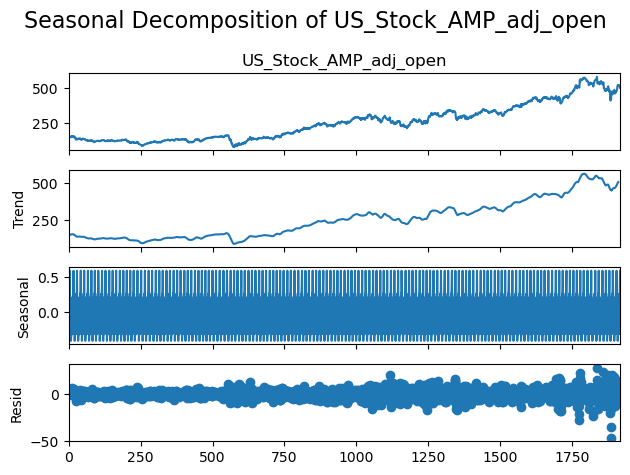

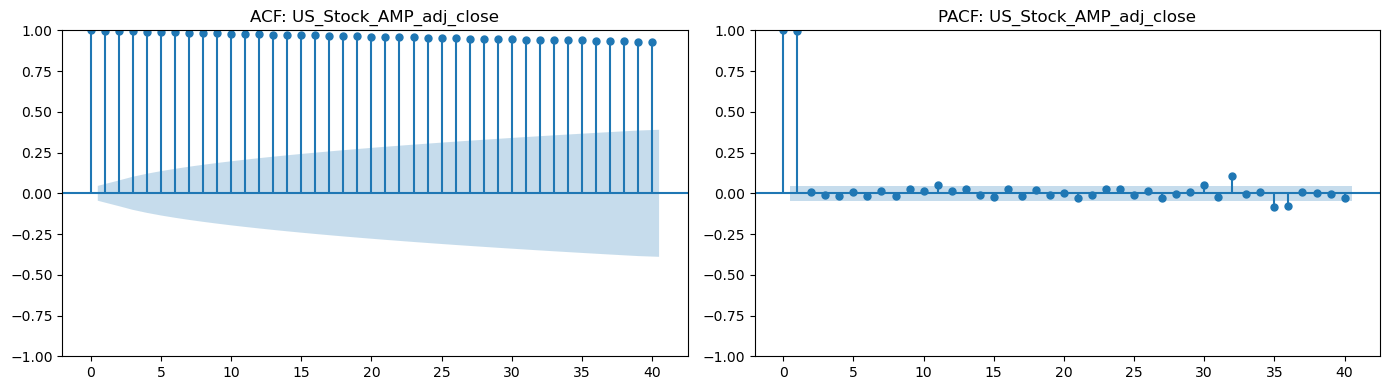

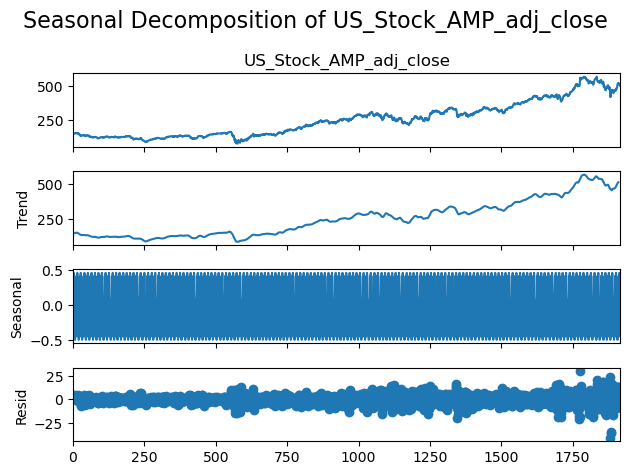

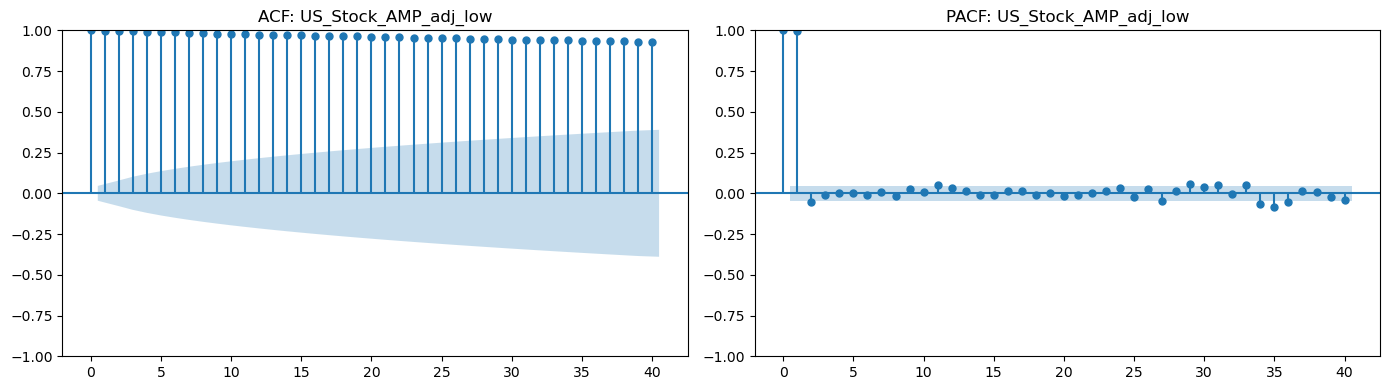

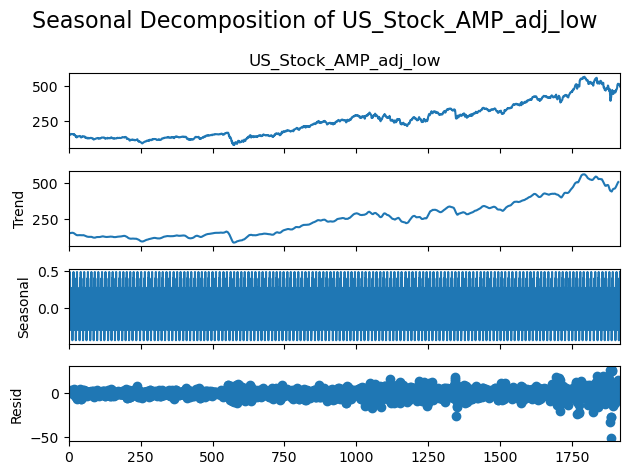

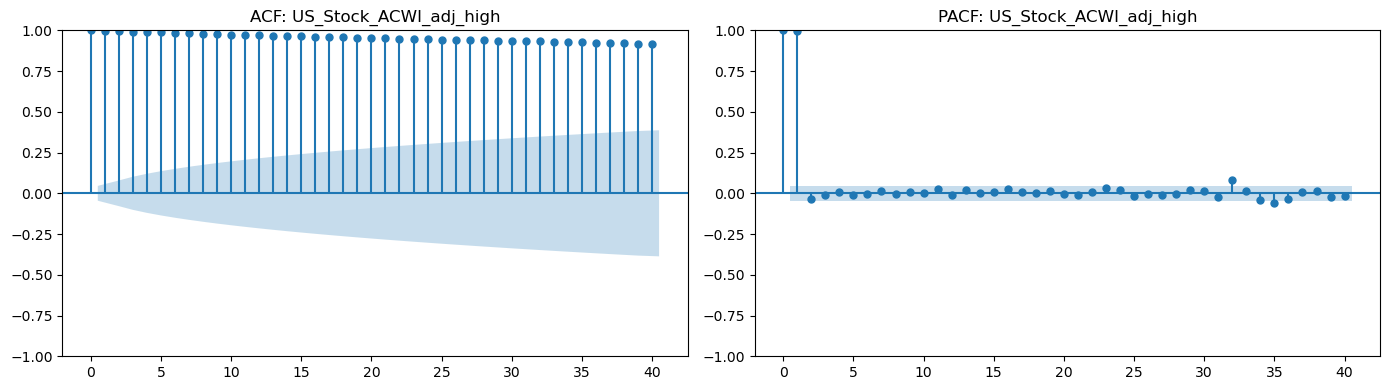

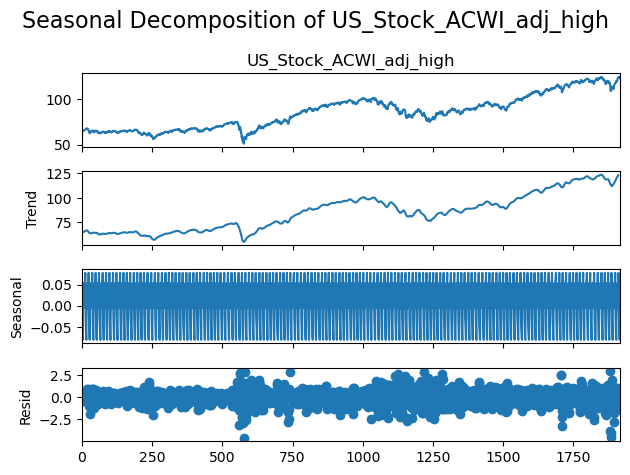

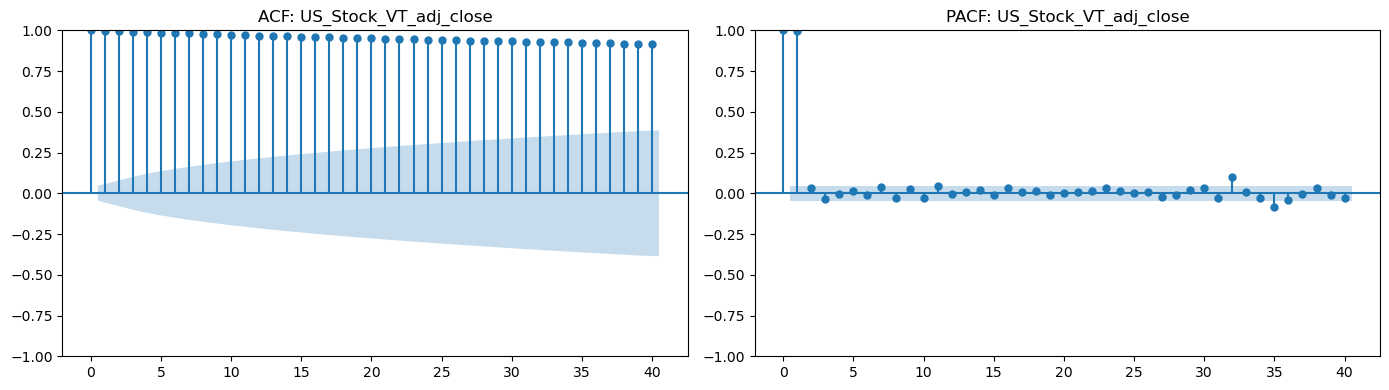

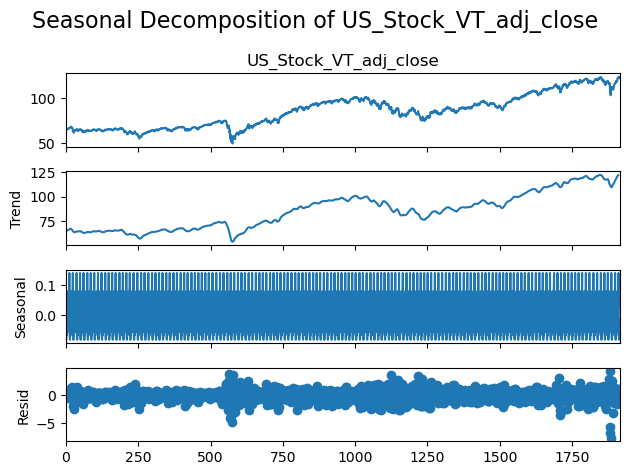

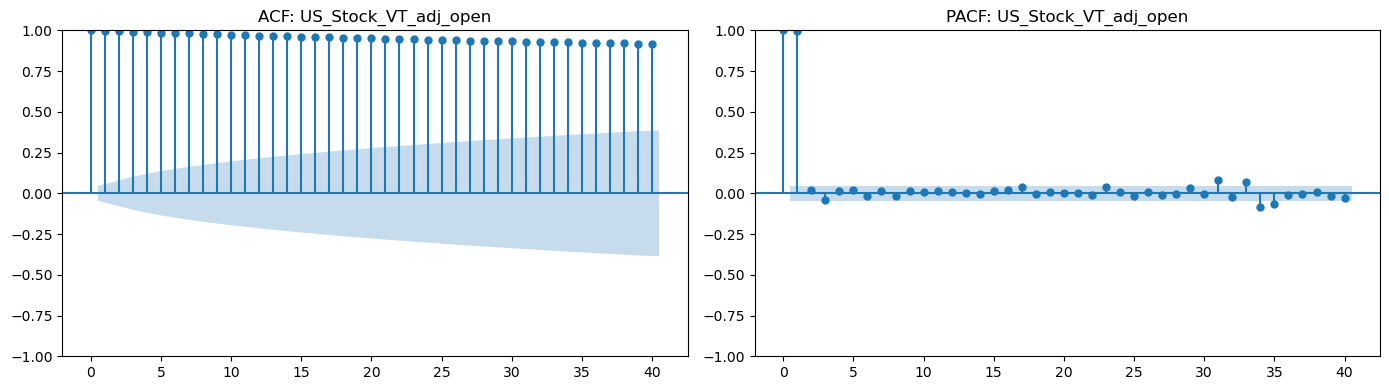

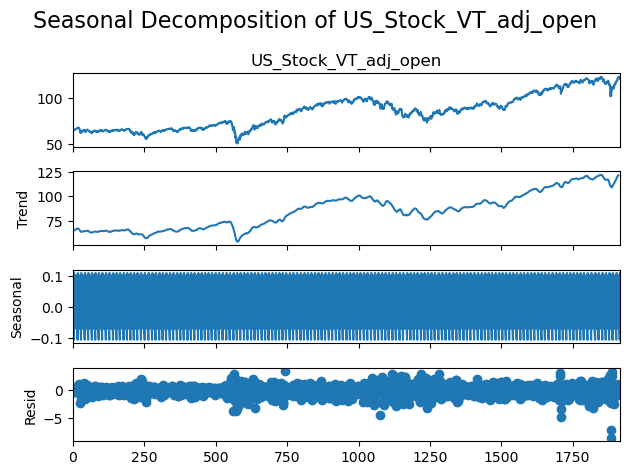

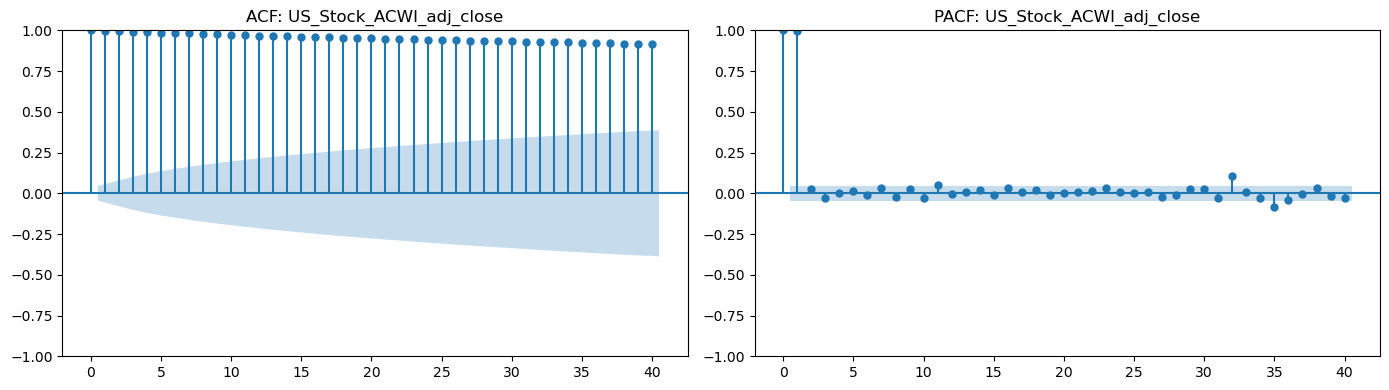

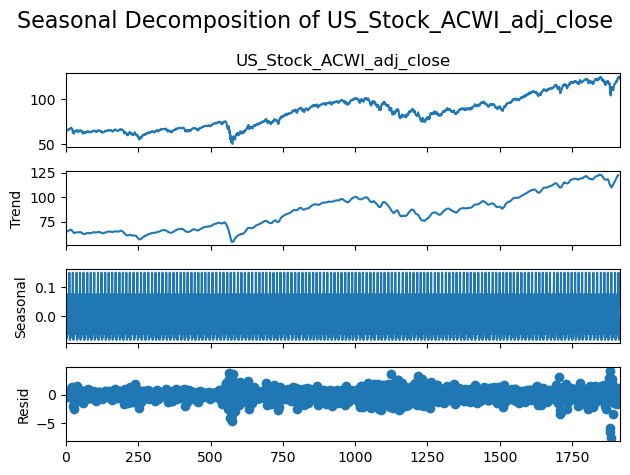

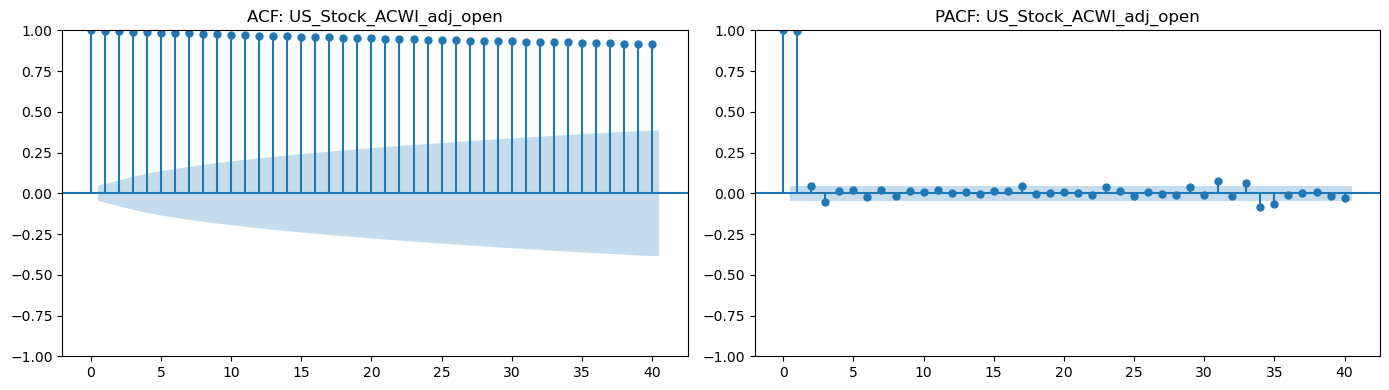

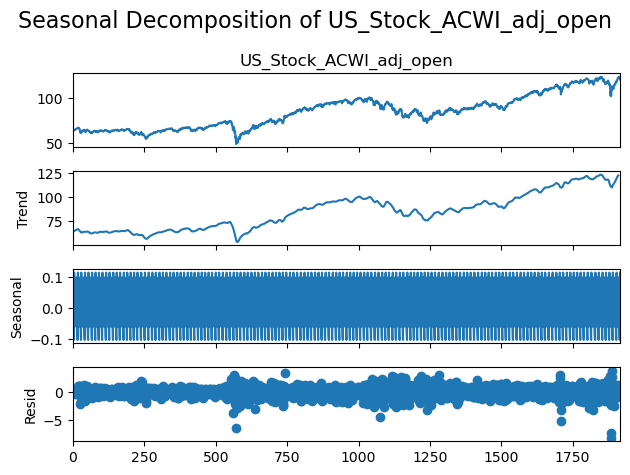

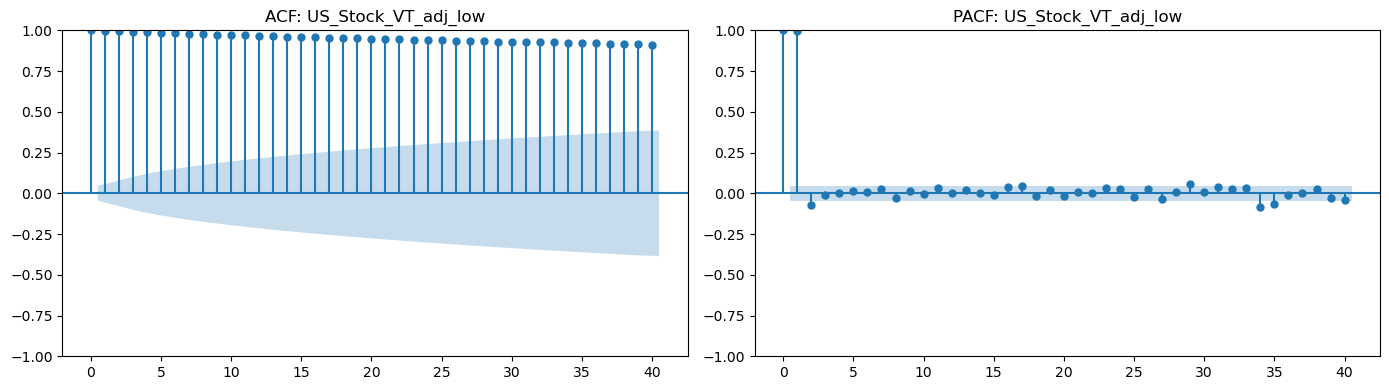

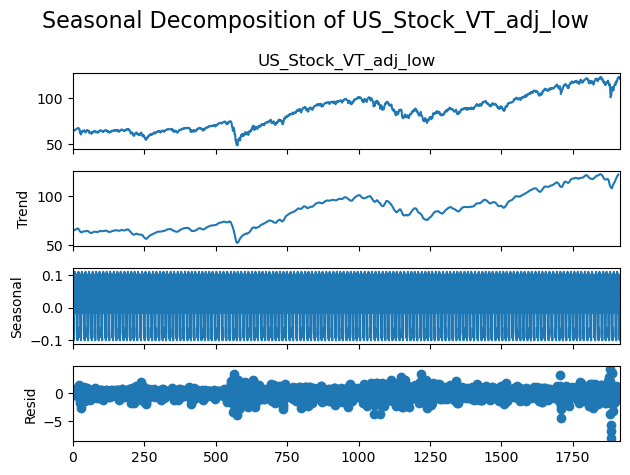

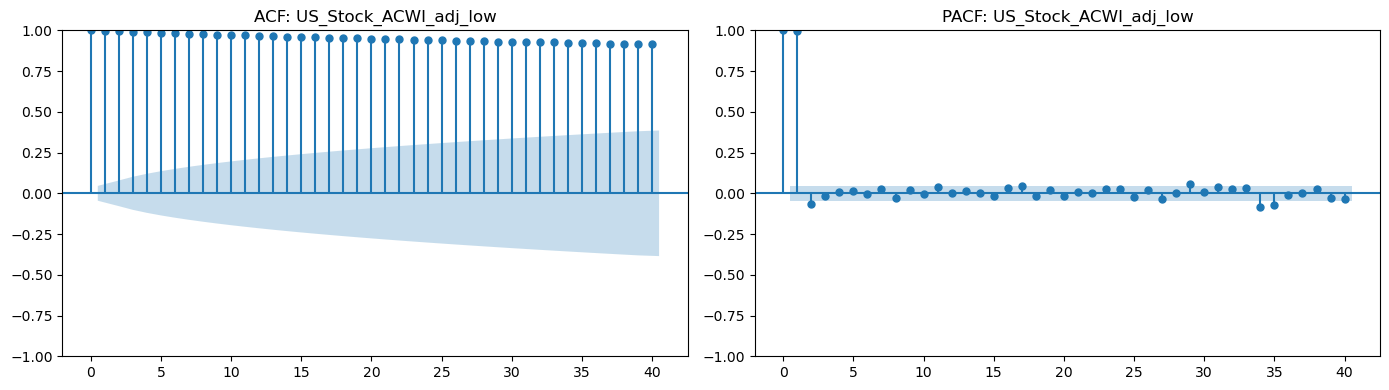

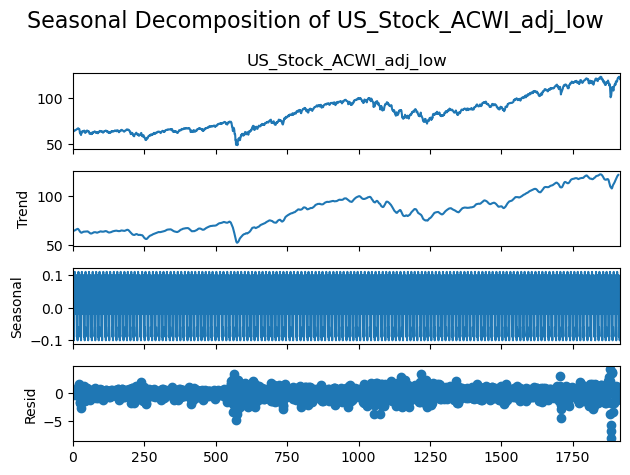

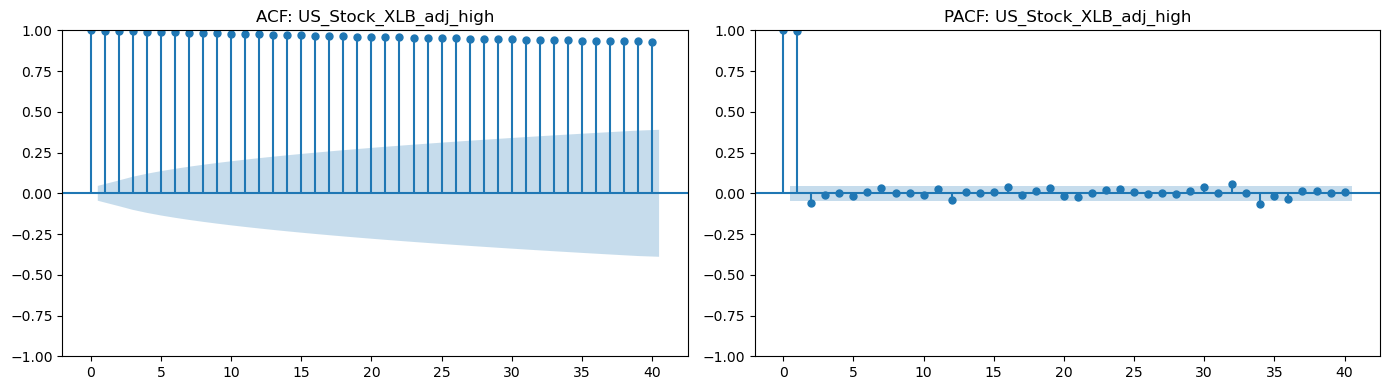

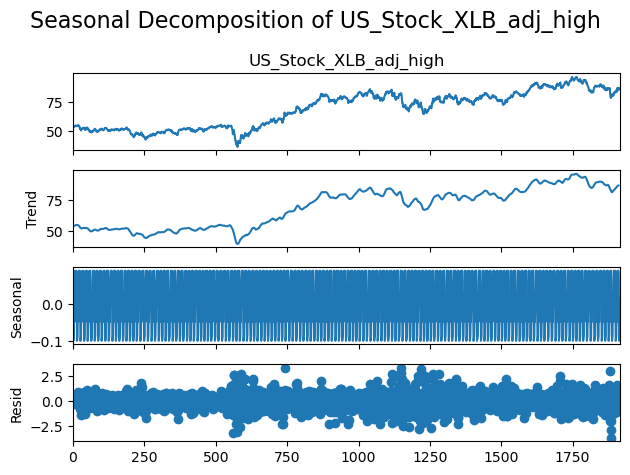

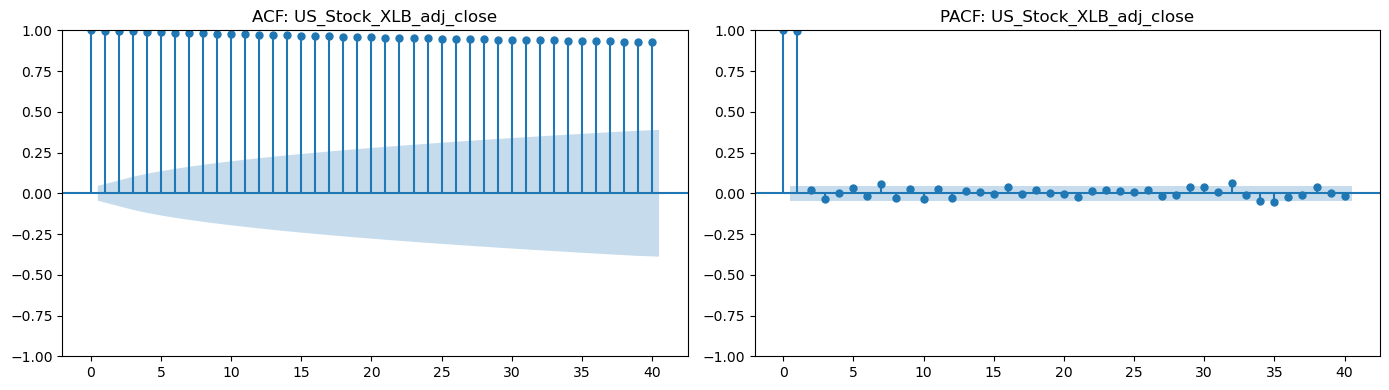

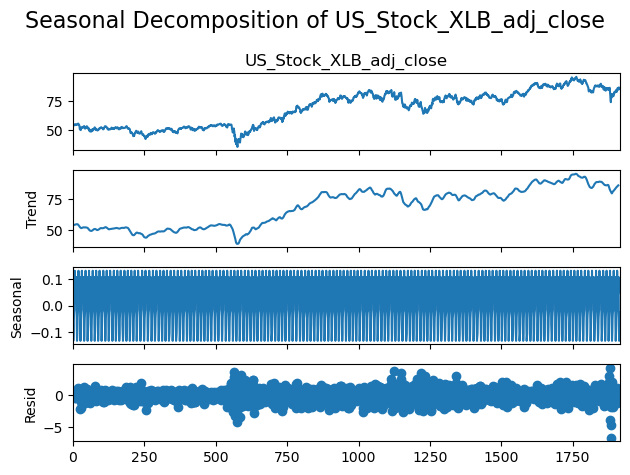

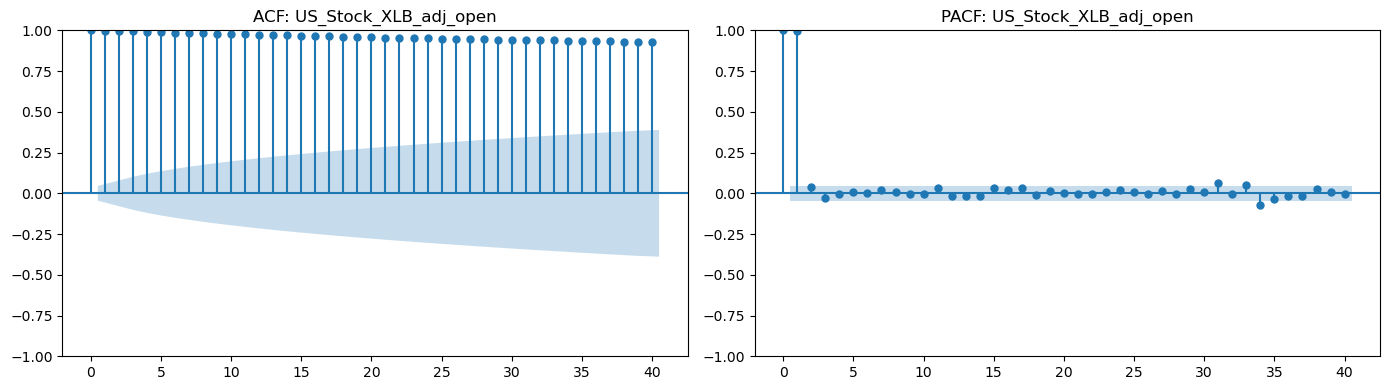

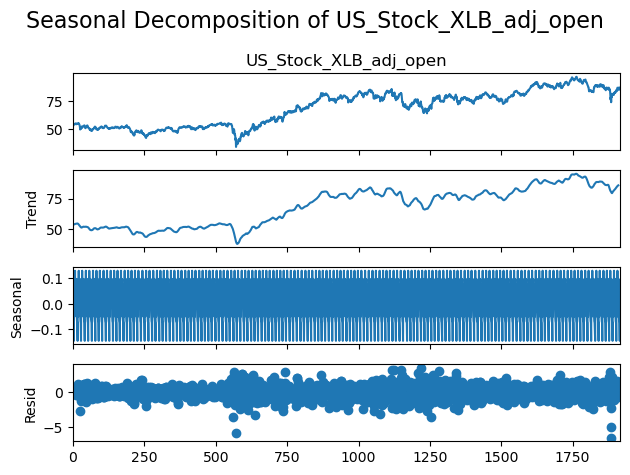

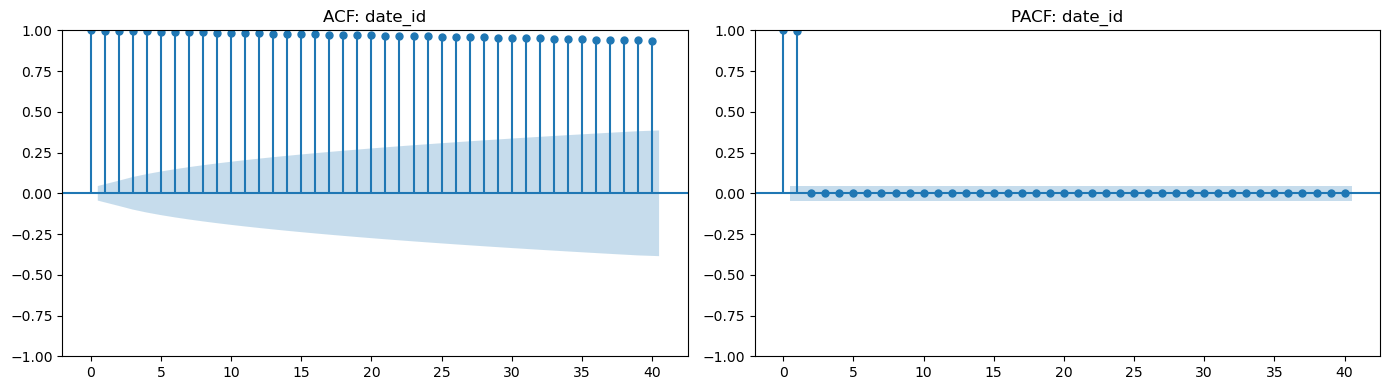

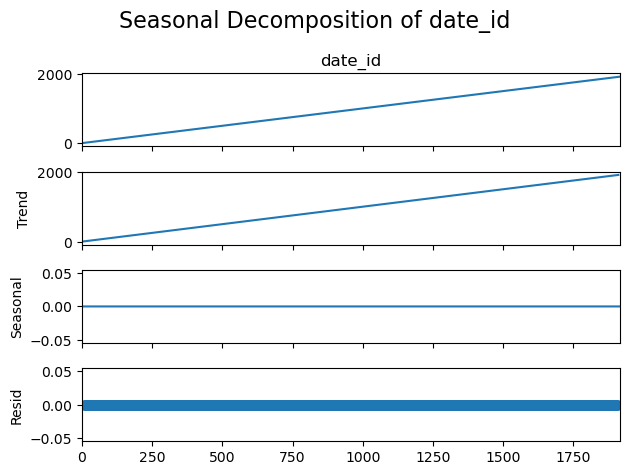

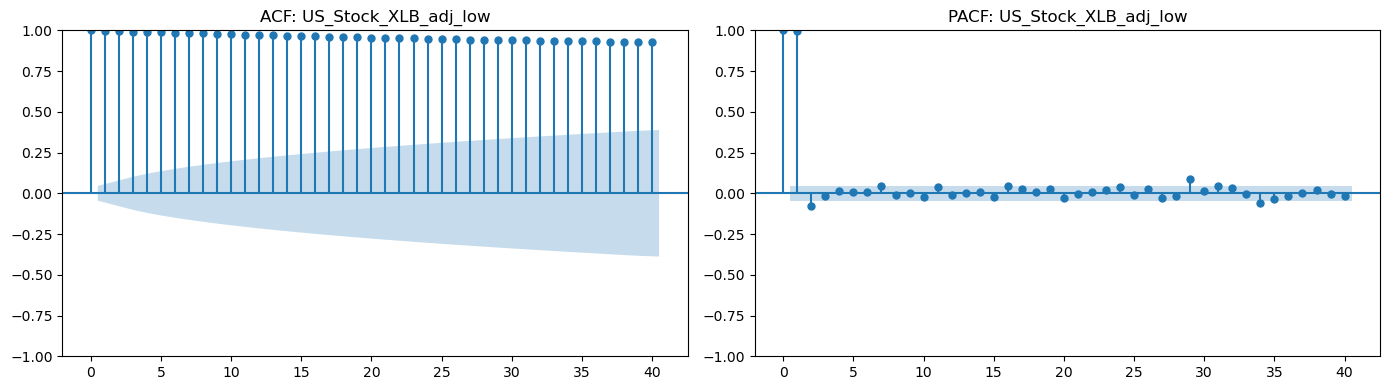

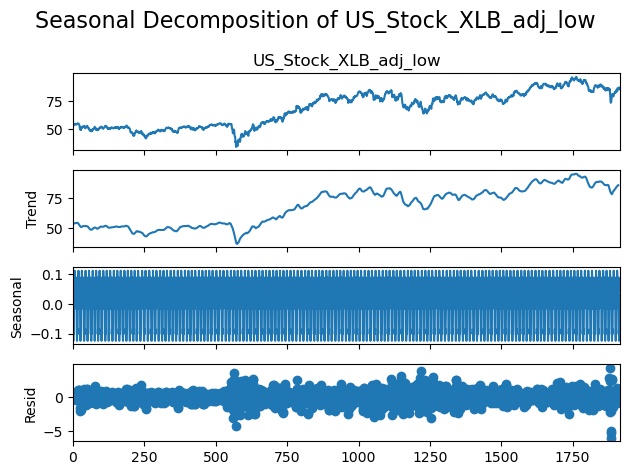

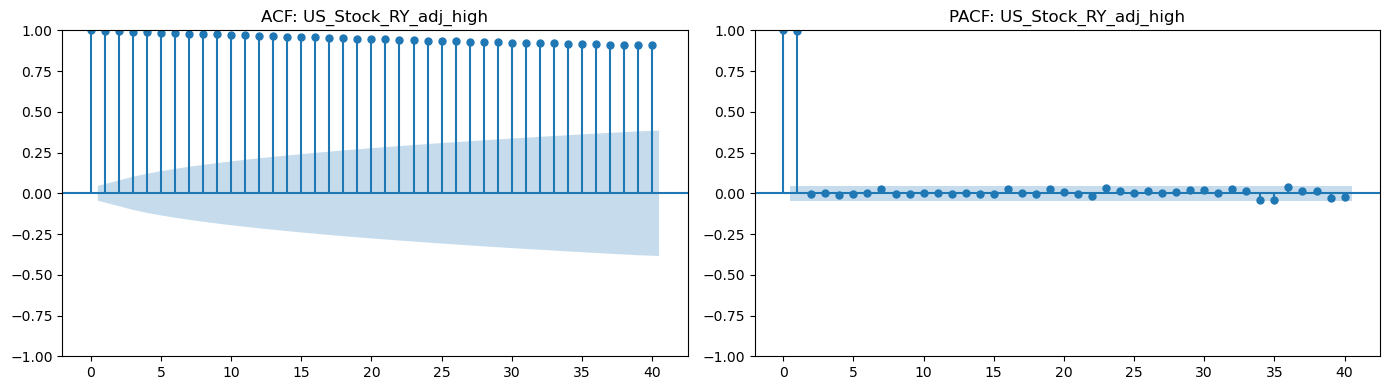

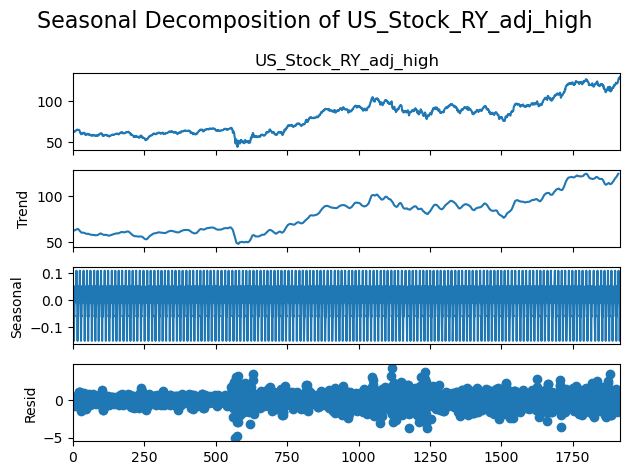

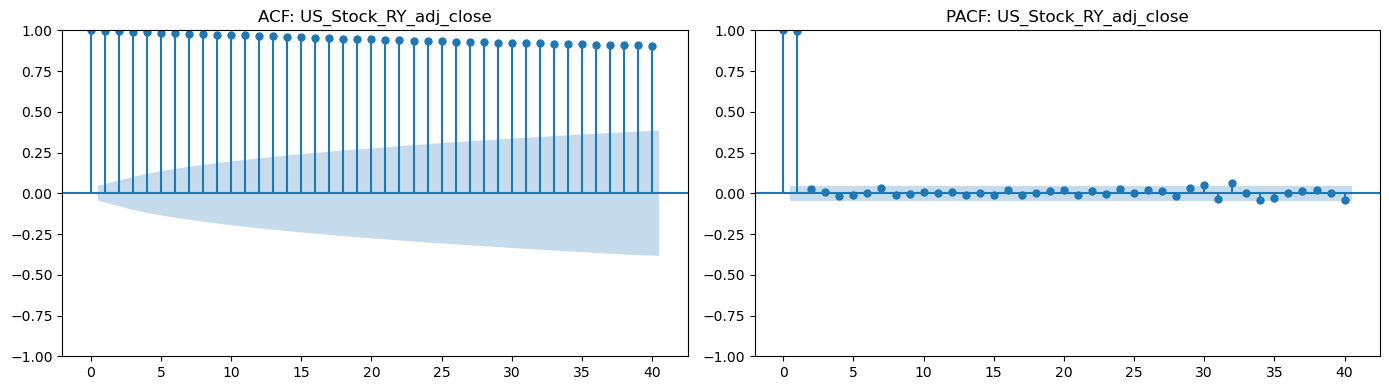

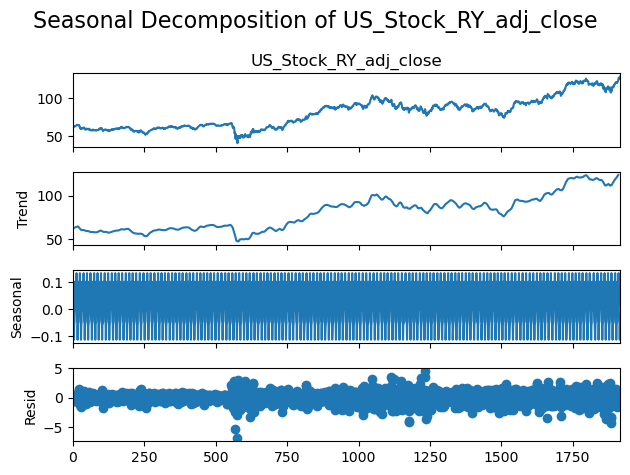

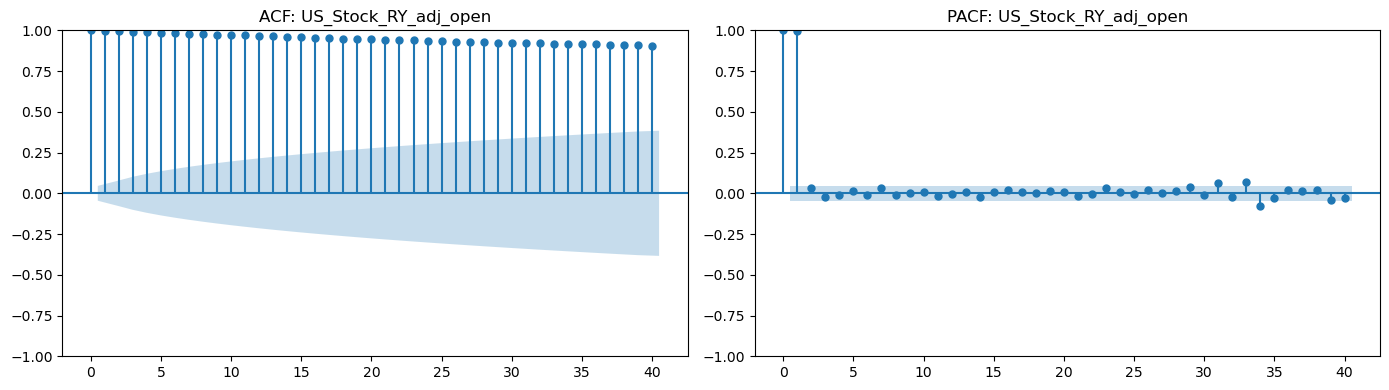

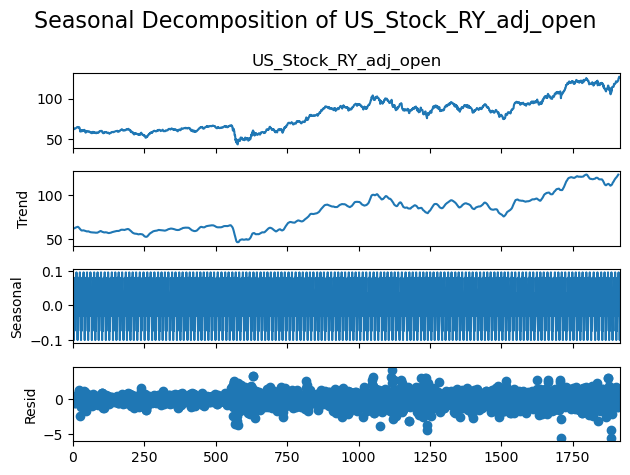

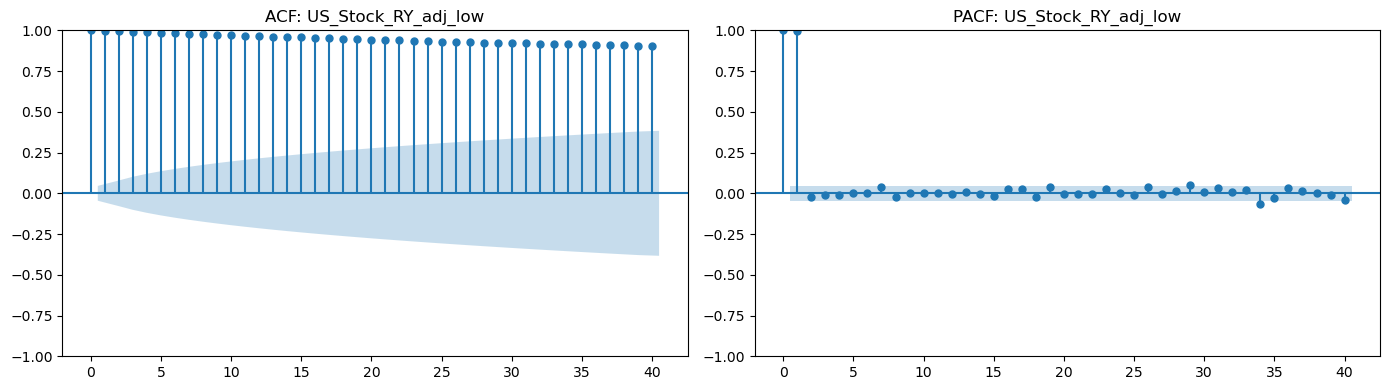

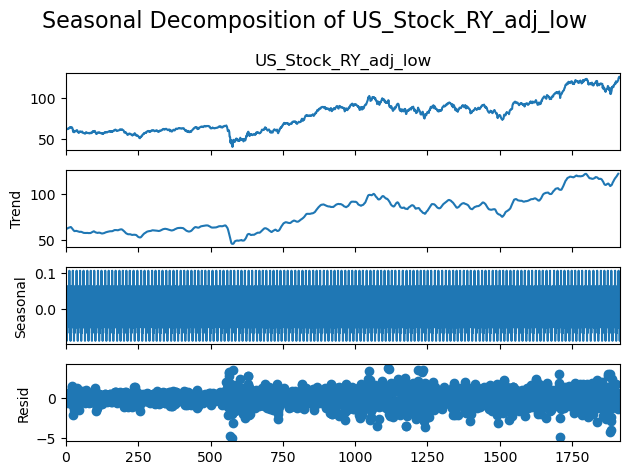

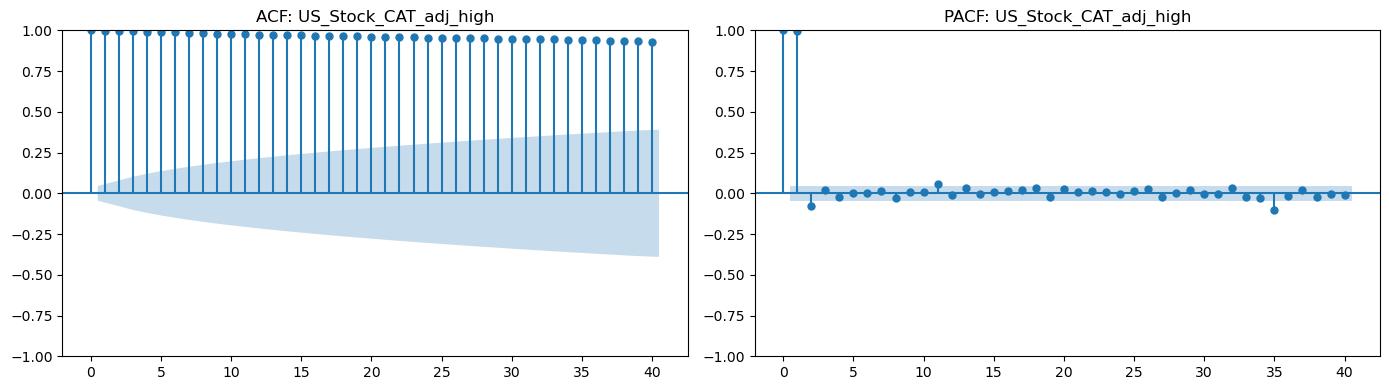

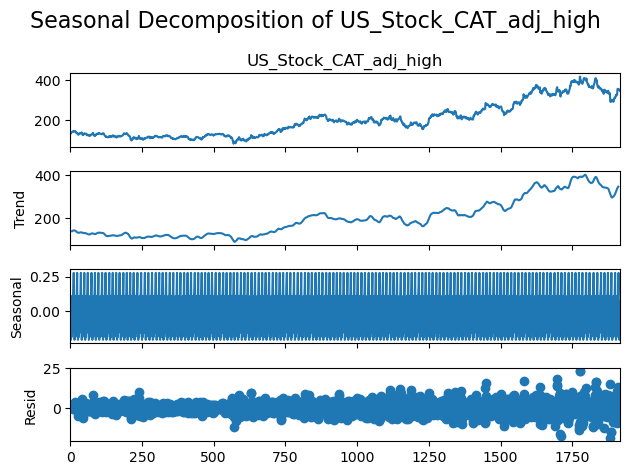

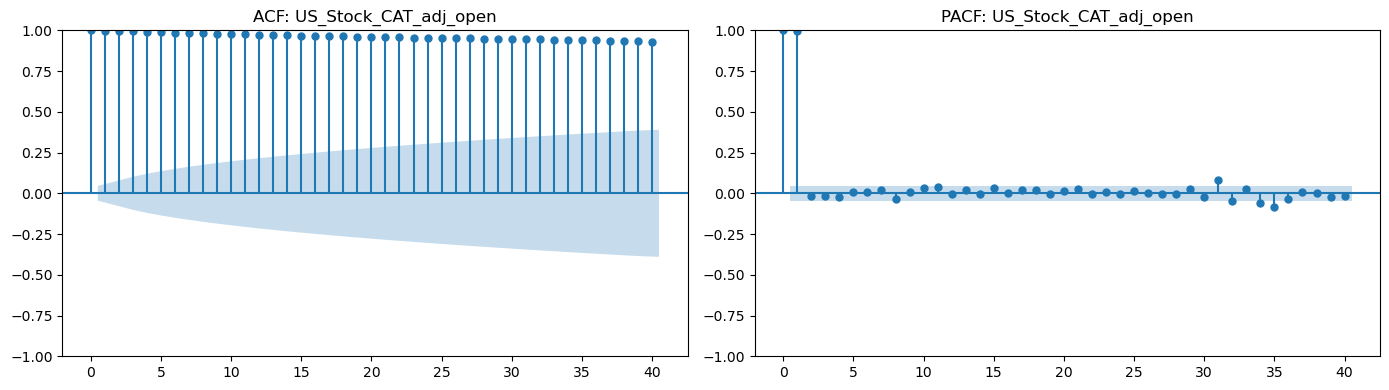

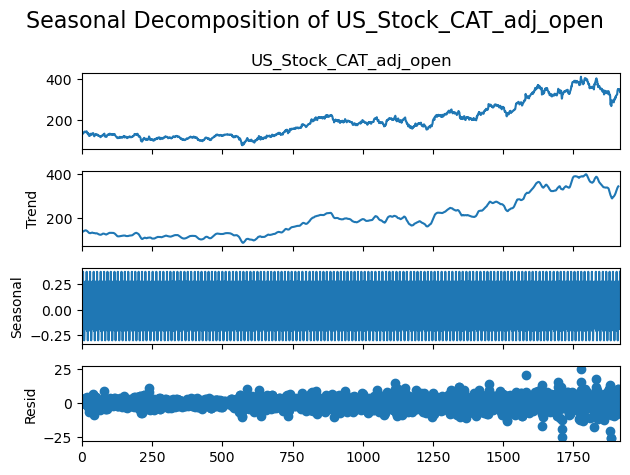

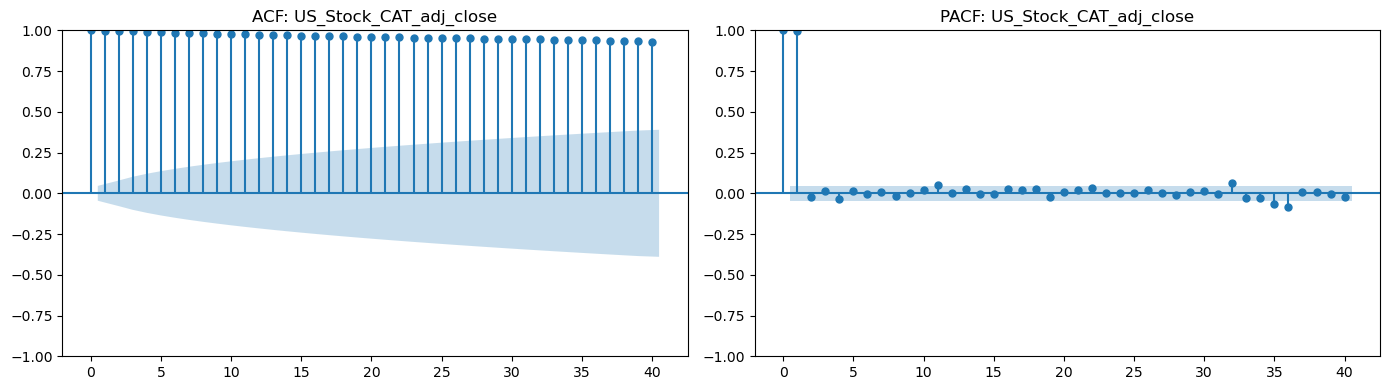

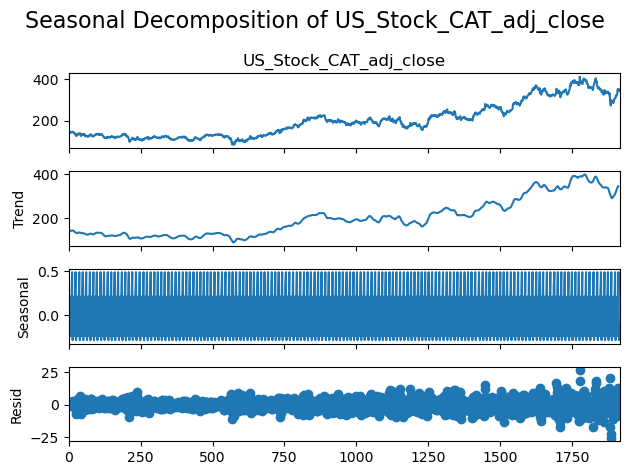

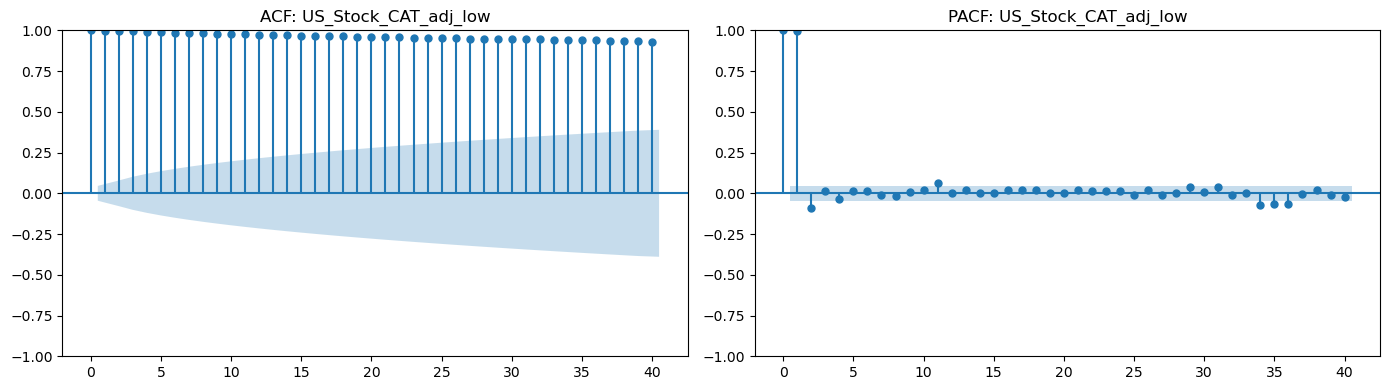

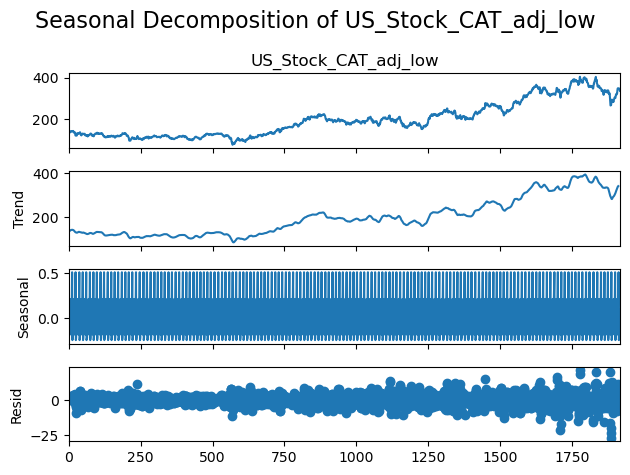

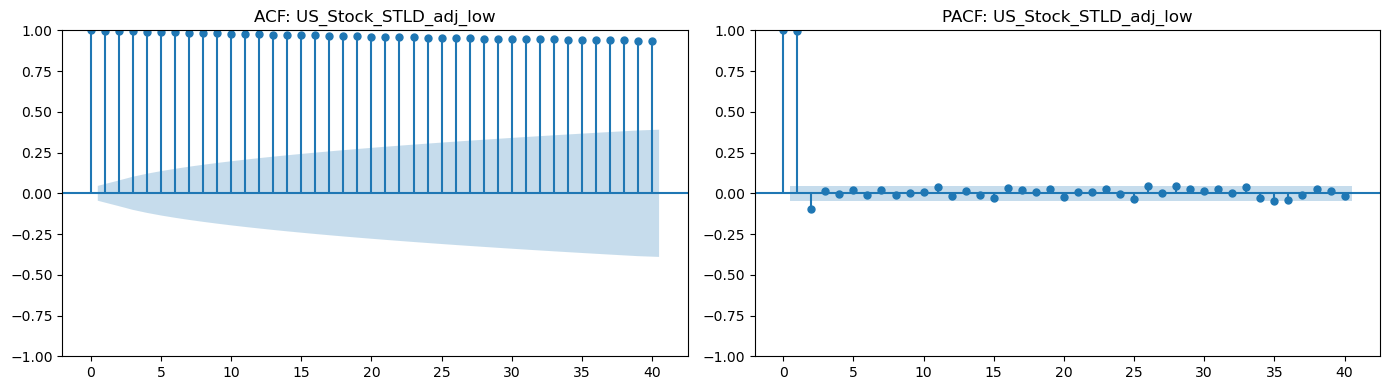

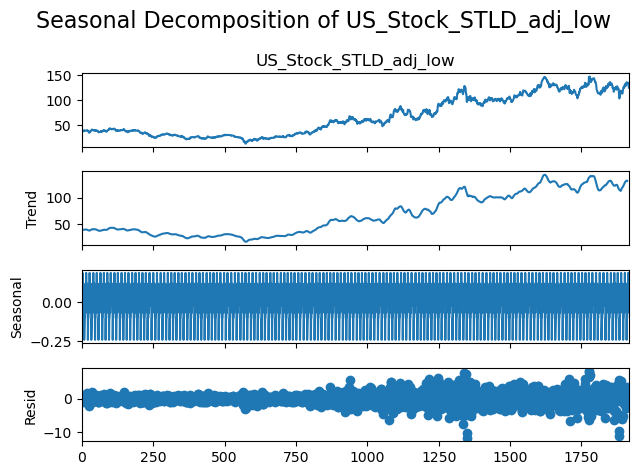

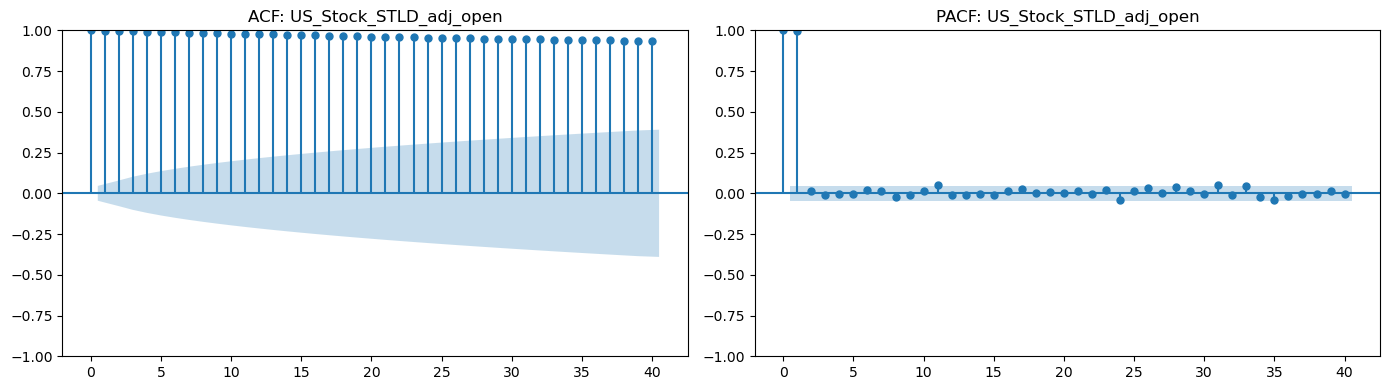

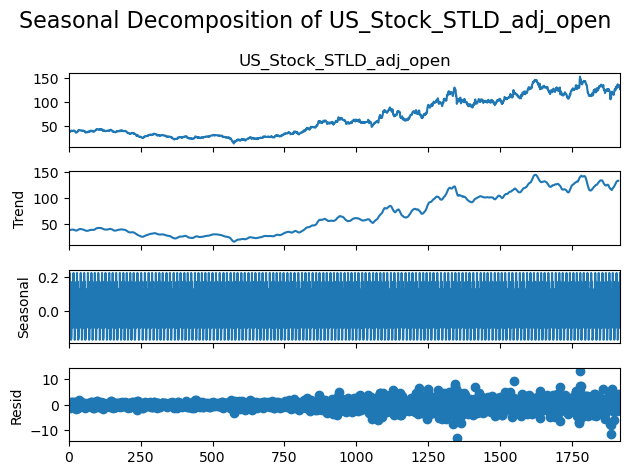

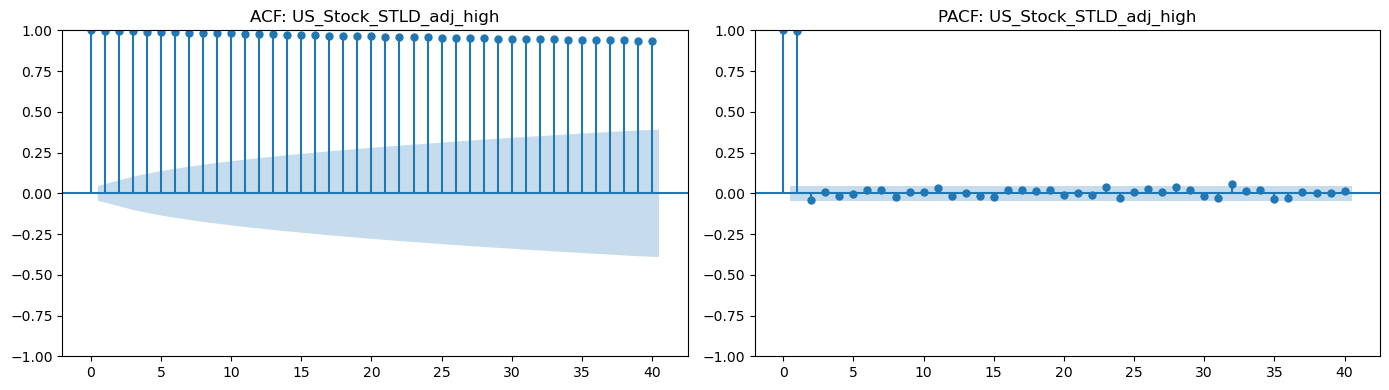

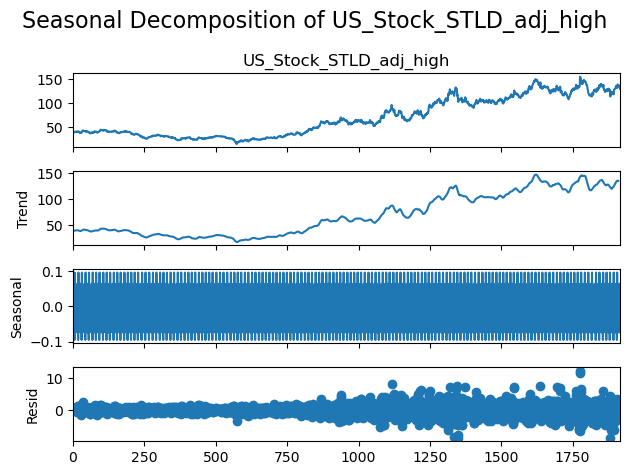

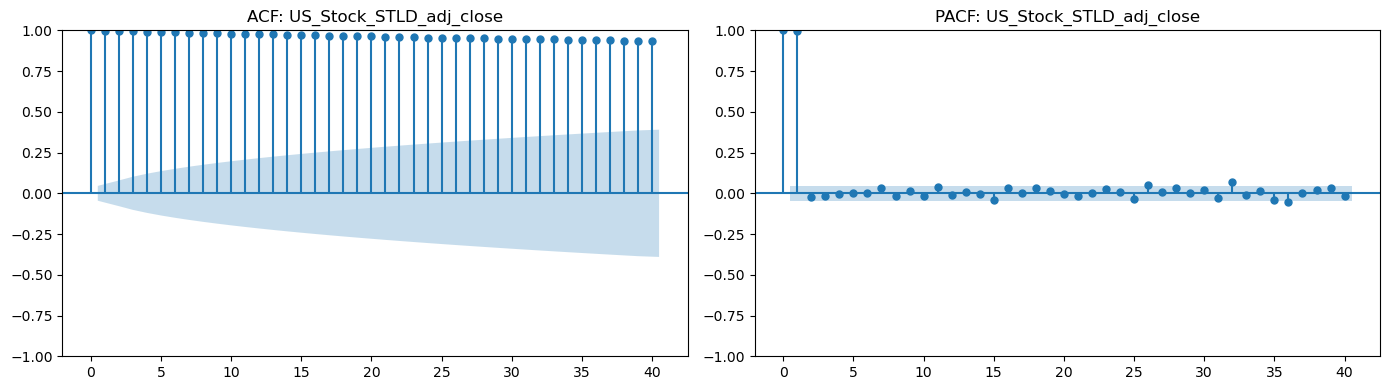

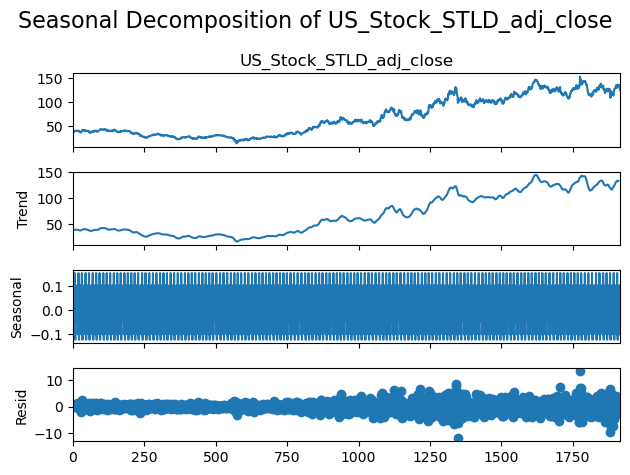

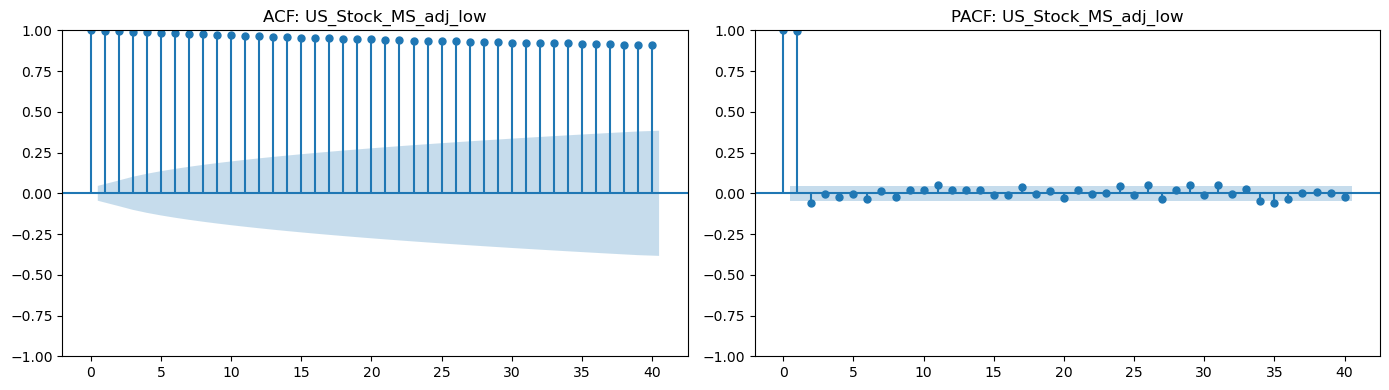

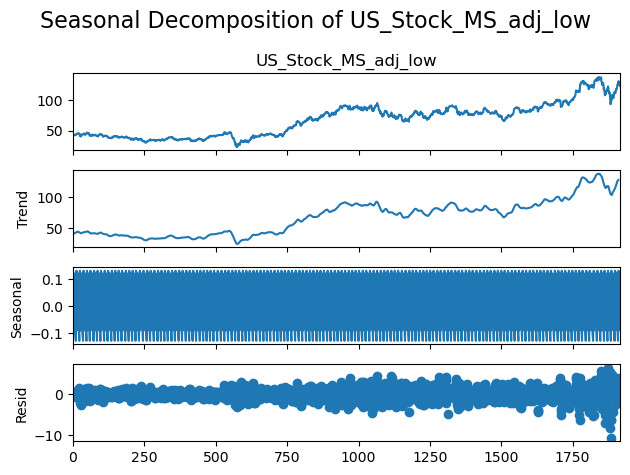

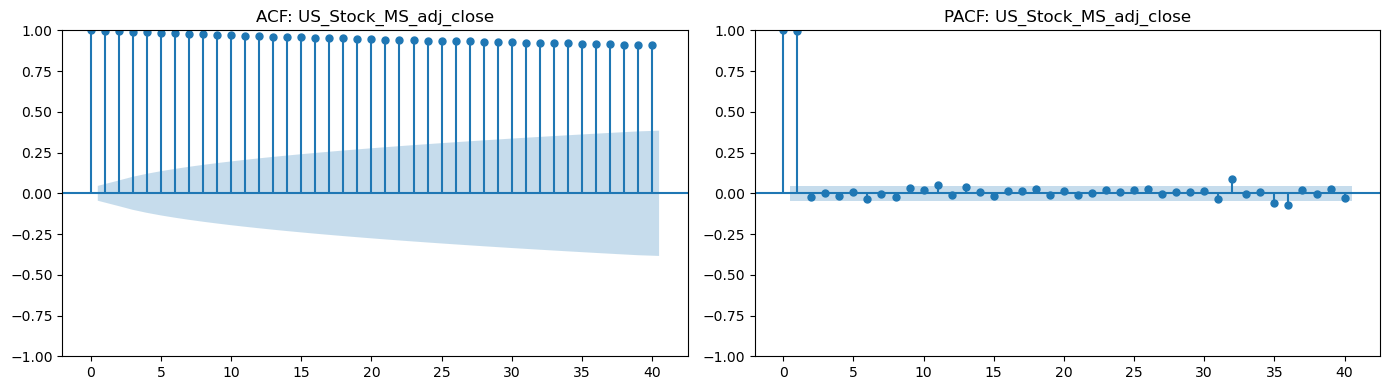

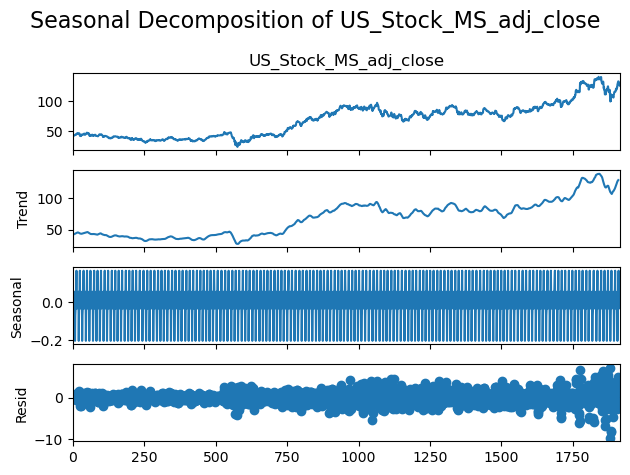

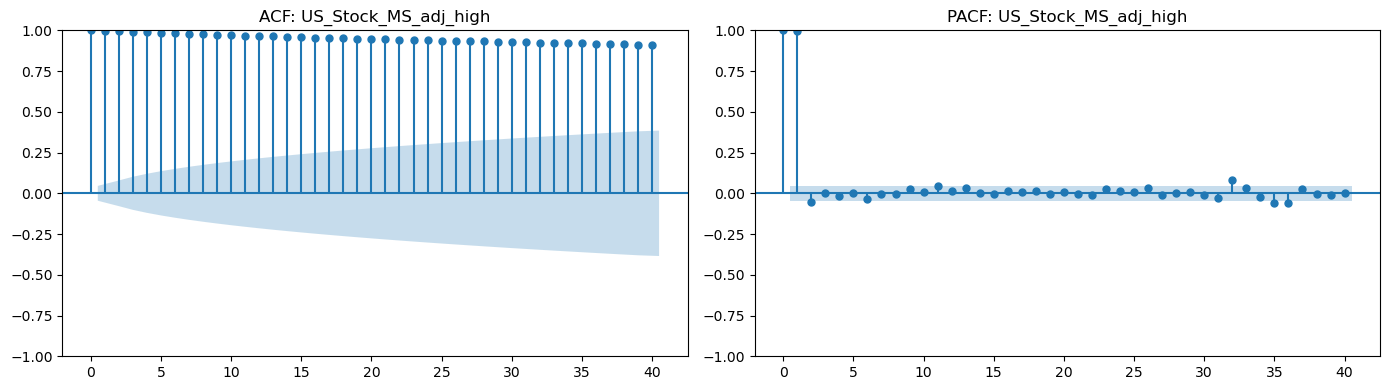

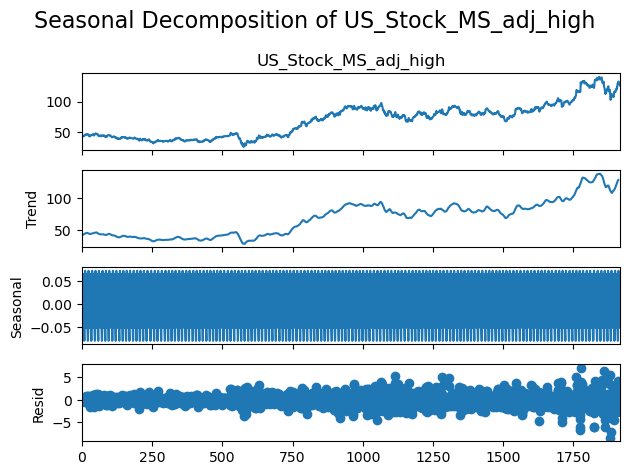

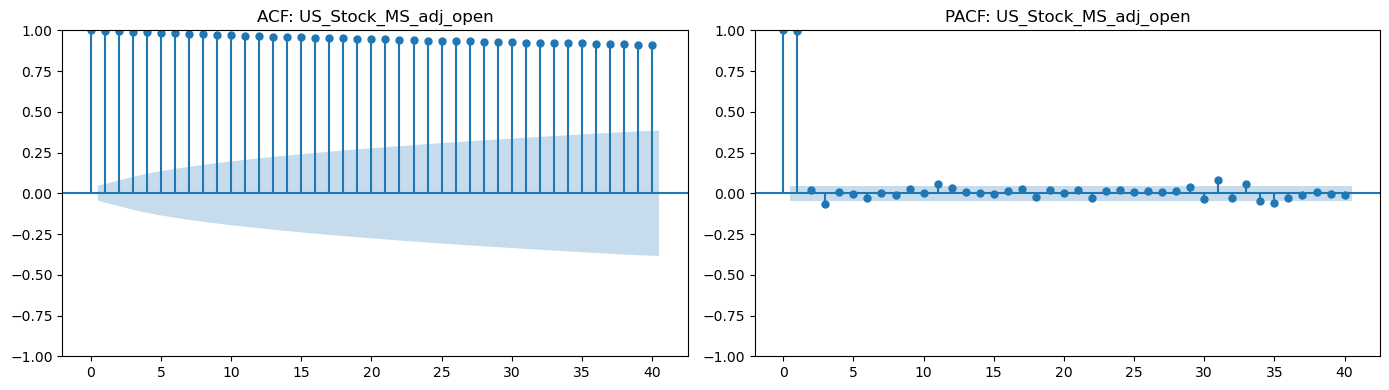

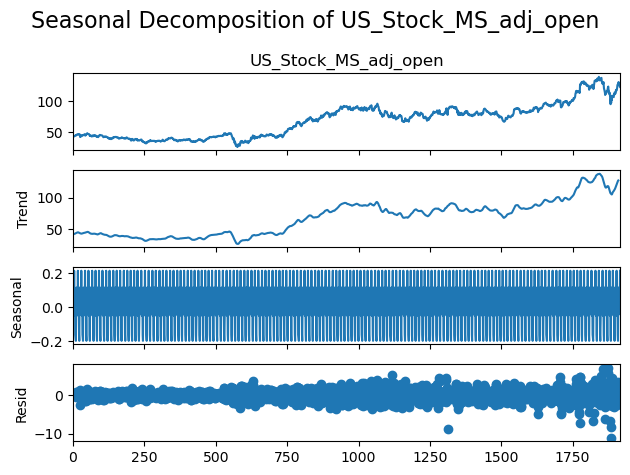

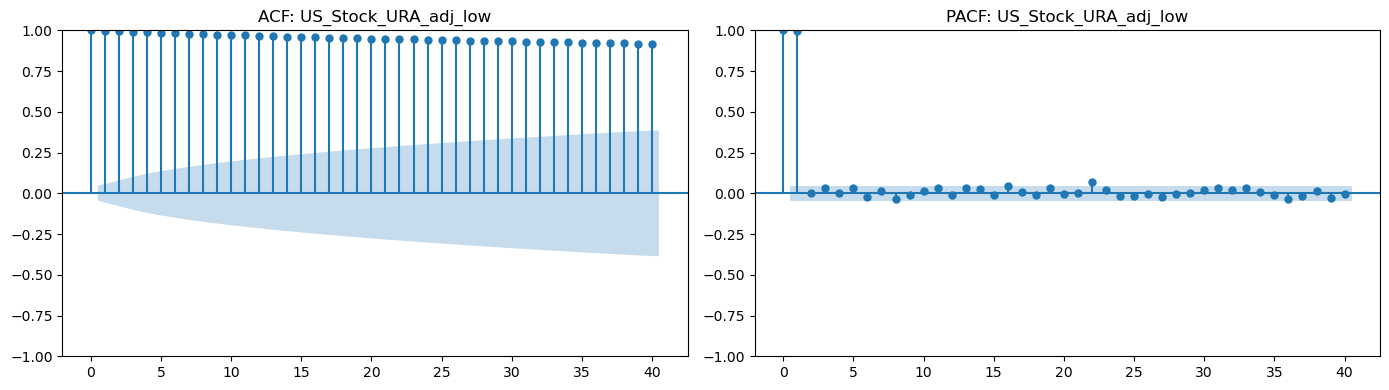

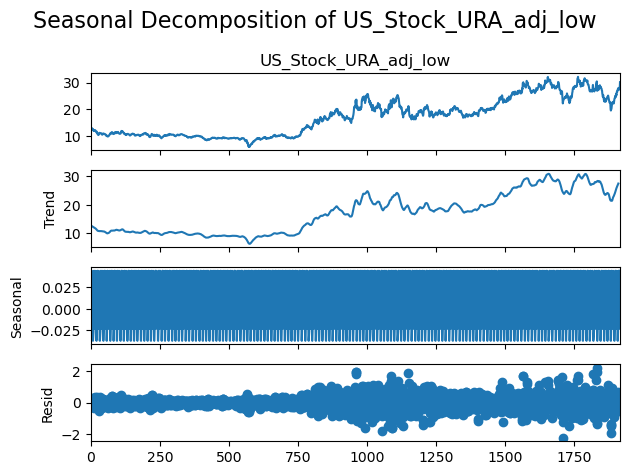

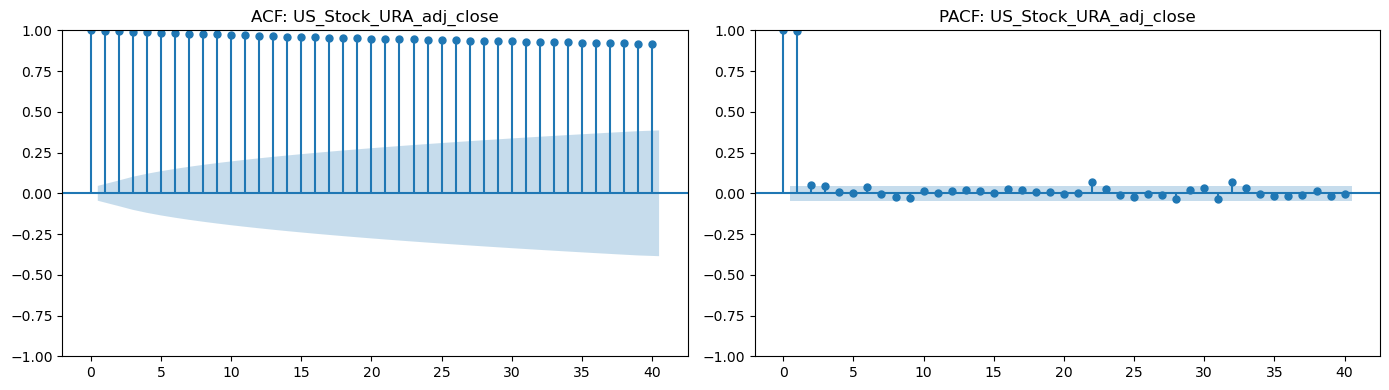

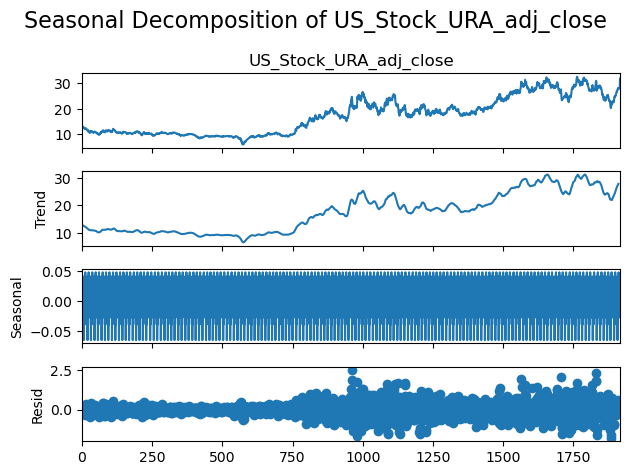

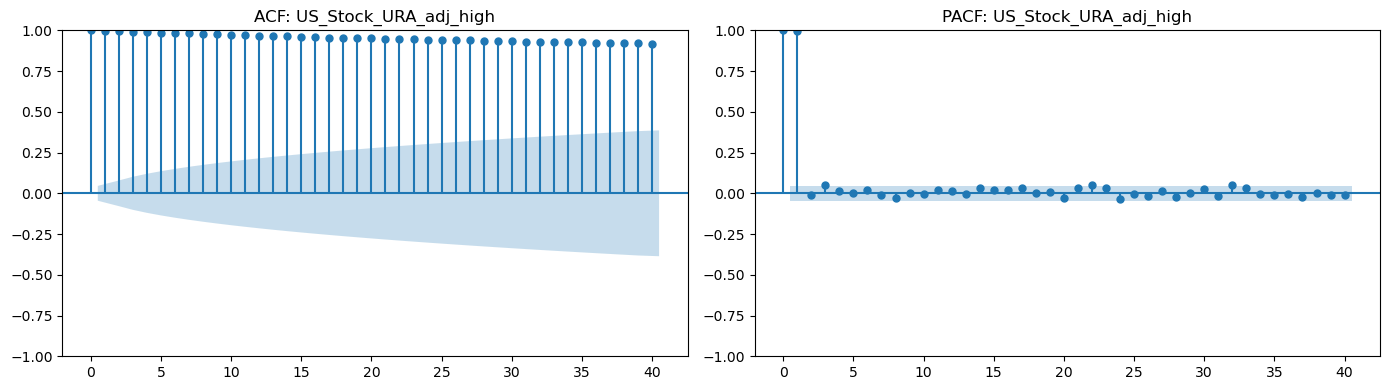

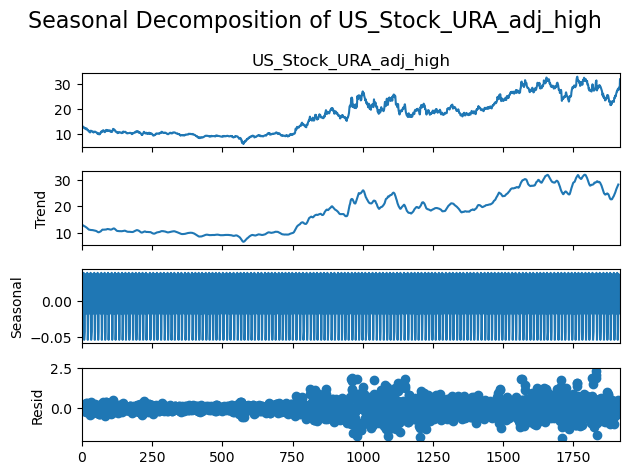

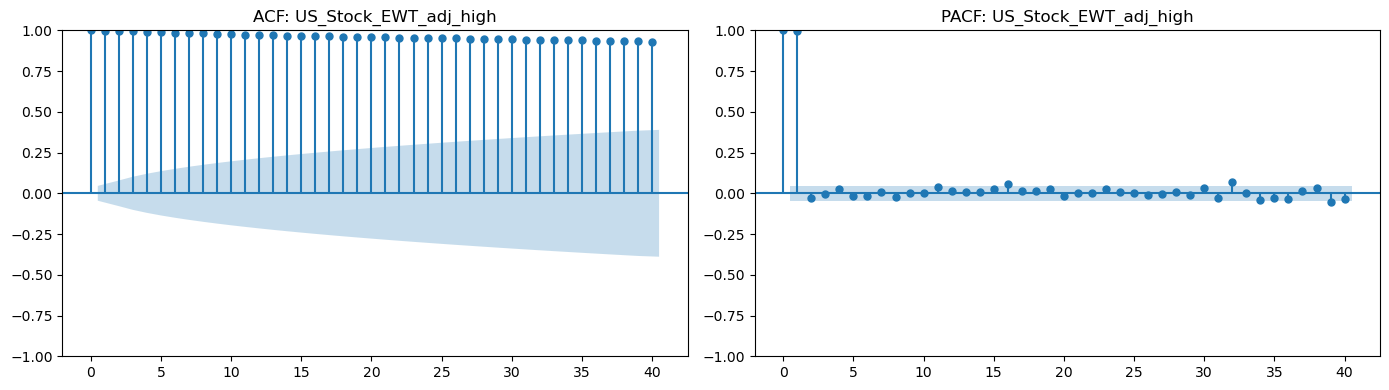

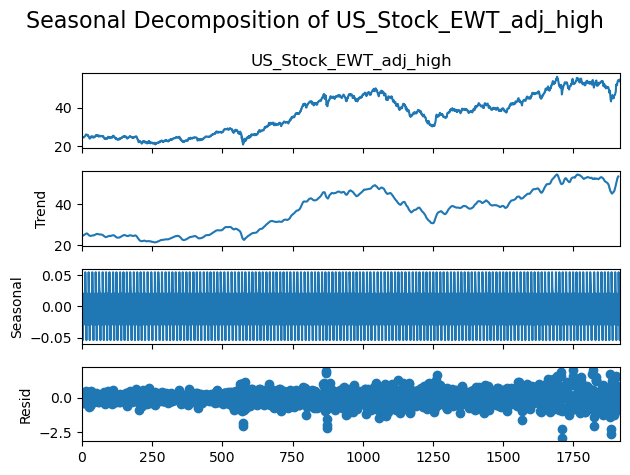

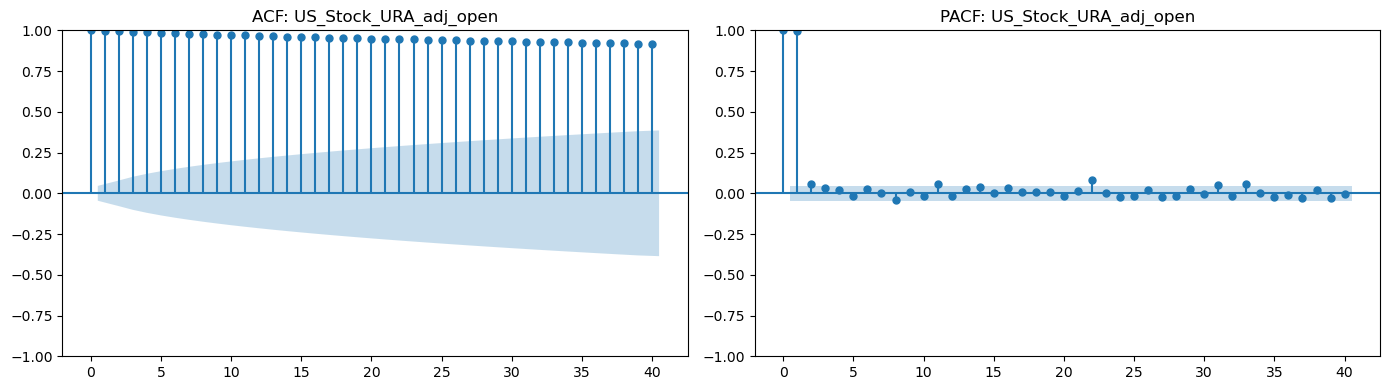

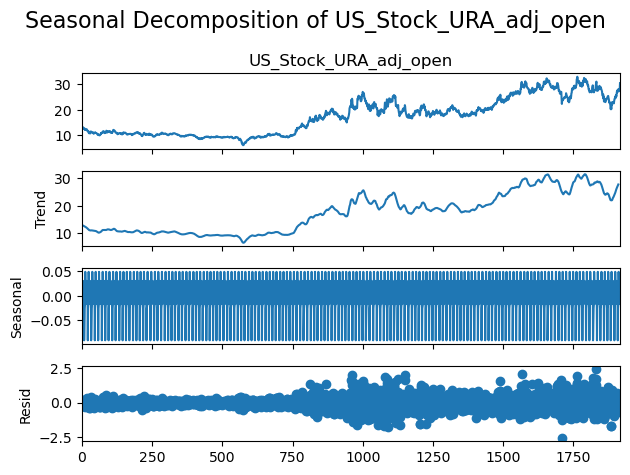

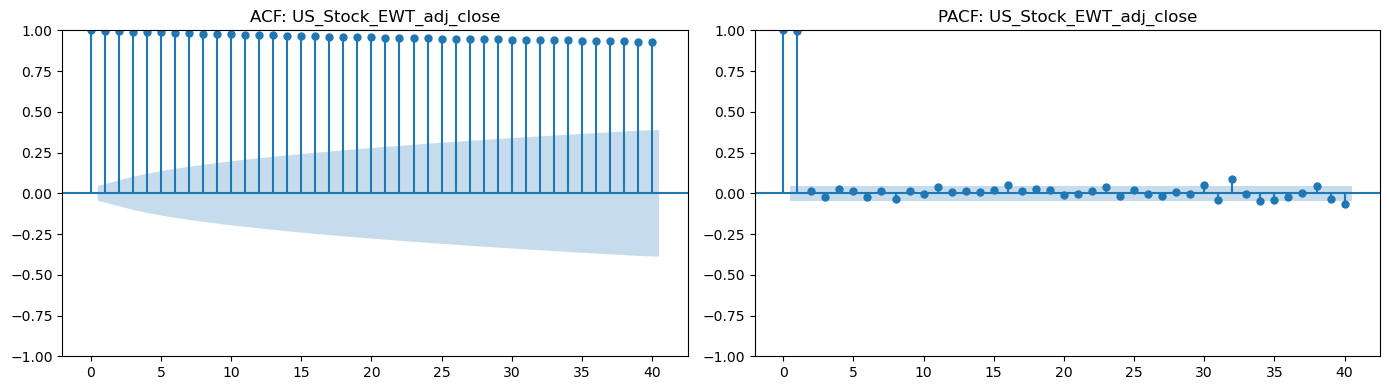

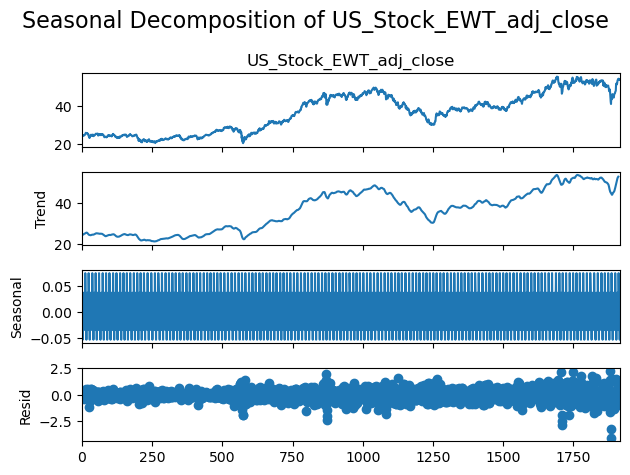

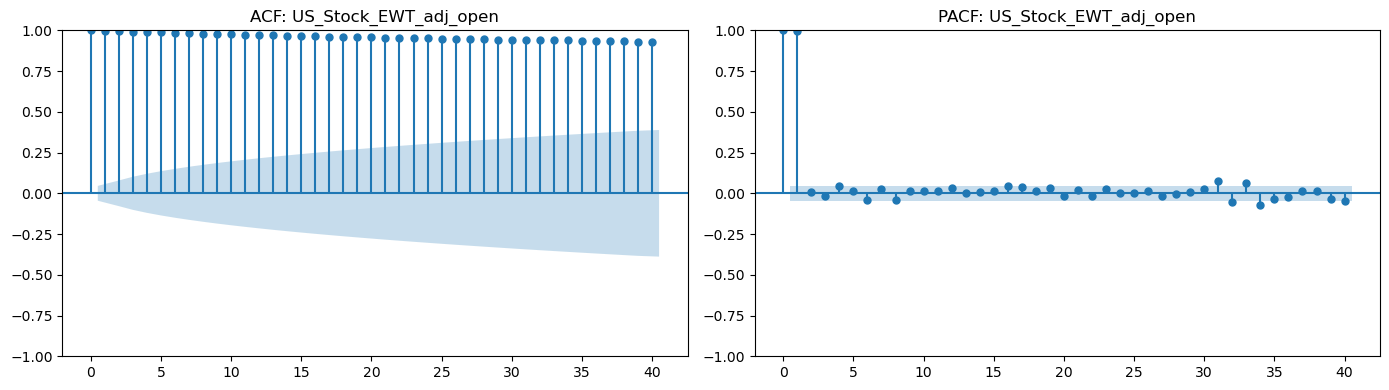

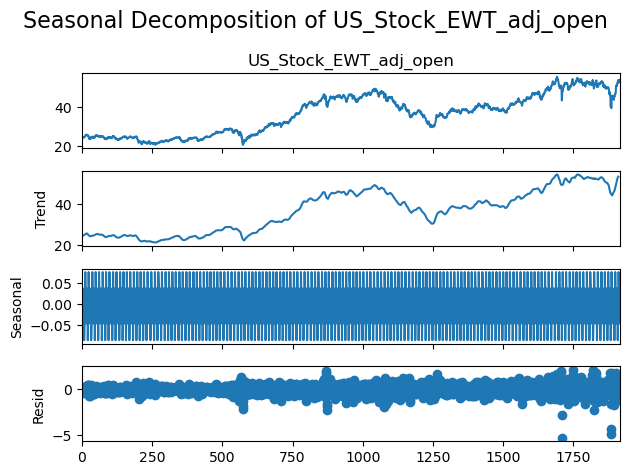

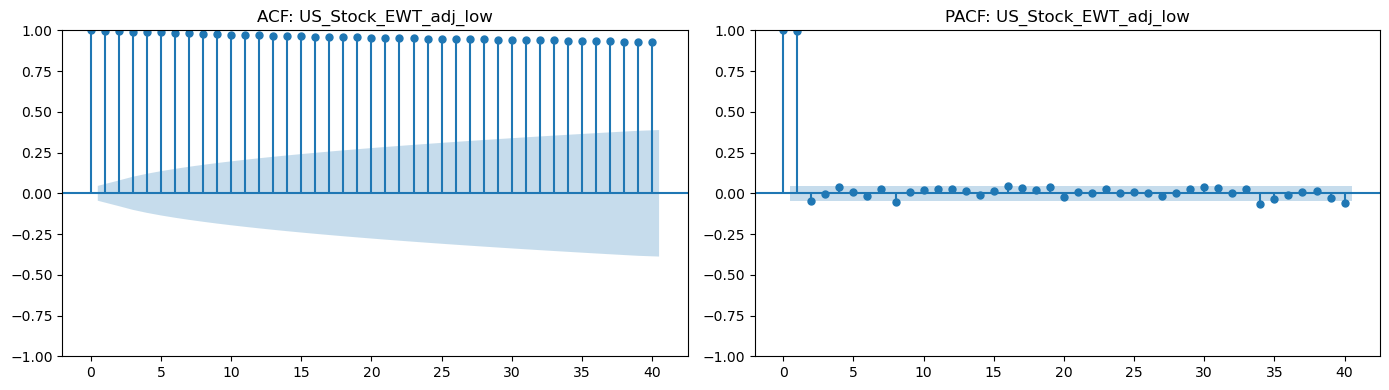

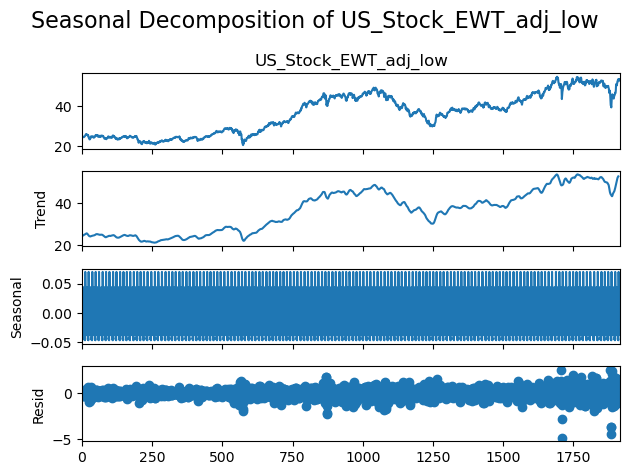

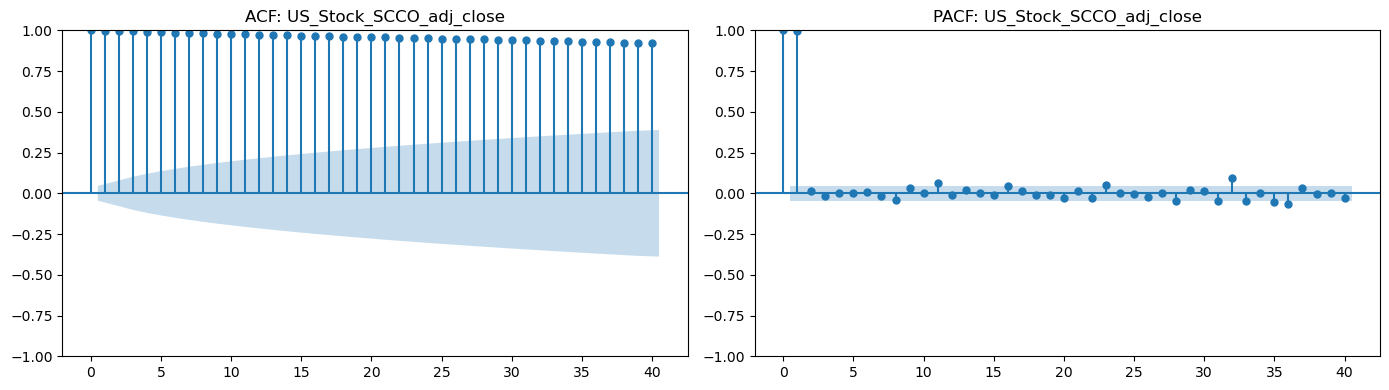

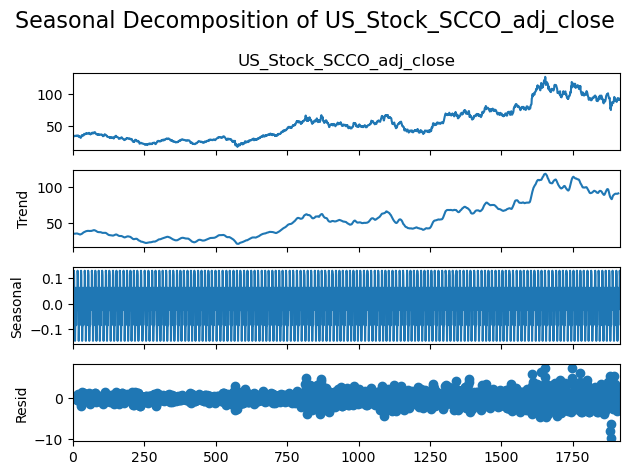

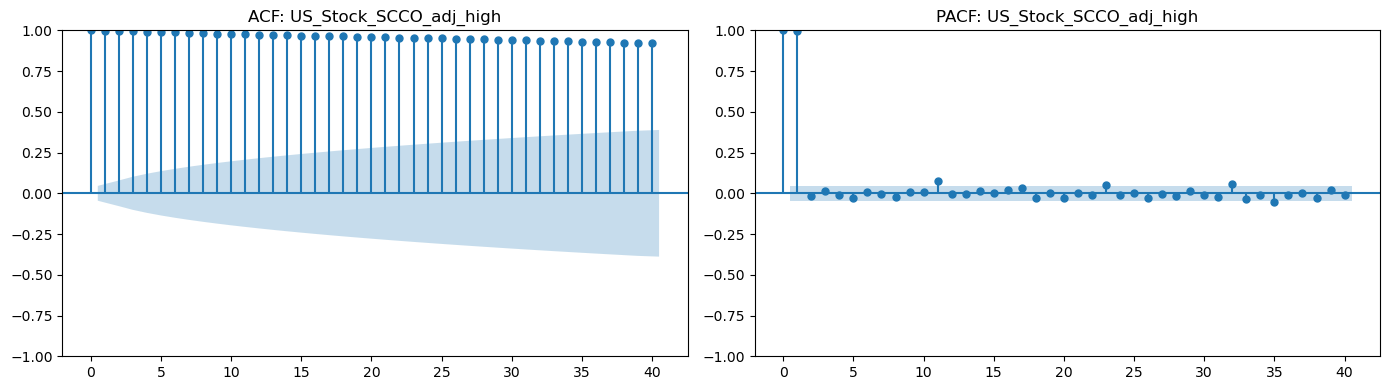

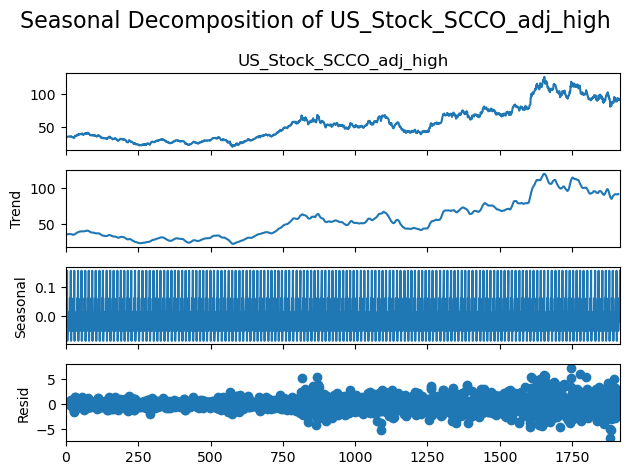

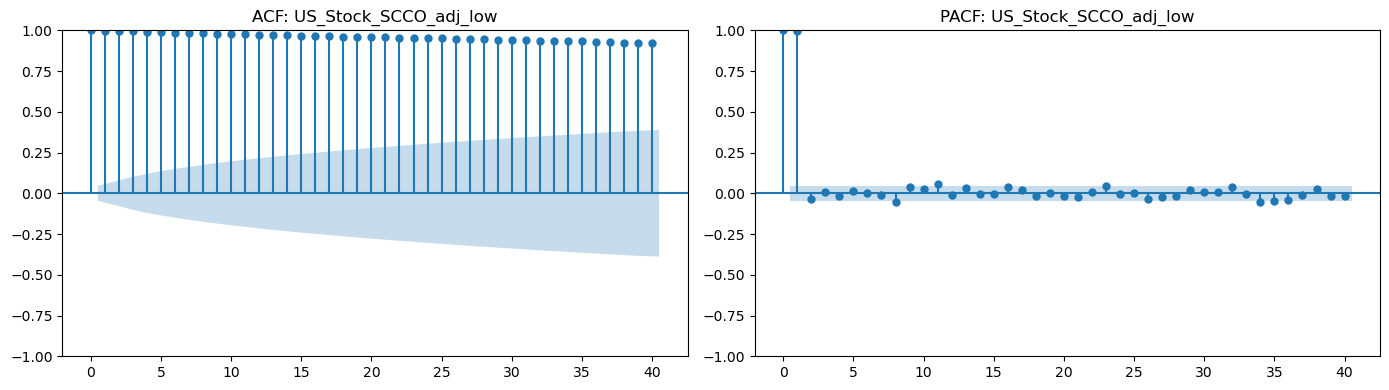

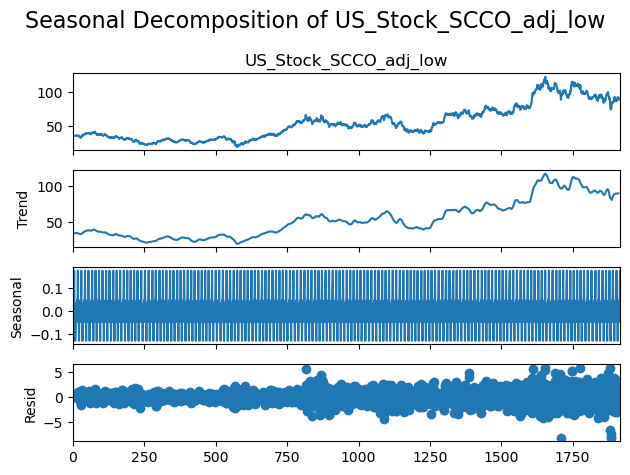

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# ACF and PACF plots for top_20_features
for feature in top_20_features[:100]:  # Limit to first 20 for readability
    series = train[feature].dropna()
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plot_acf(series, ax=plt.gca(), lags=40)
    plt.title(f'ACF: {feature}')
    plt.subplot(1, 2, 2)
    plot_pacf(series, ax=plt.gca(), lags=40)
    plt.title(f'PACF: {feature}')
    plt.tight_layout()
    plt.show()

    # Seasonality decomposition (assume frequency=12 for monthly, change as needed)
    try:
        decomposition = seasonal_decompose(series, model='additive', period=12)
        decomposition.plot()
        plt.suptitle(f'Seasonal Decomposition of {feature}', fontsize=16)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Seasonal decomposition failed for {feature}: {e}")

c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



ARIMA summary for US_Stock_VTV_adj_high:
                                 SARIMAX Results                                 
Dep. Variable:     US_Stock_VTV_adj_high   No. Observations:                 1853
Model:                    ARIMA(1, 1, 1)   Log Likelihood               -2678.363
Date:                   Tue, 02 Sep 2025   AIC                           5362.726
Time:                           15:35:41   BIC                           5379.298
Sample:                                0   HQIC                          5368.834
                                  - 1853                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0656      0.142      0.462      0.644      -0.213       0.344
ma.L1          0.0542      0.142      0.382      0.702      -0.22

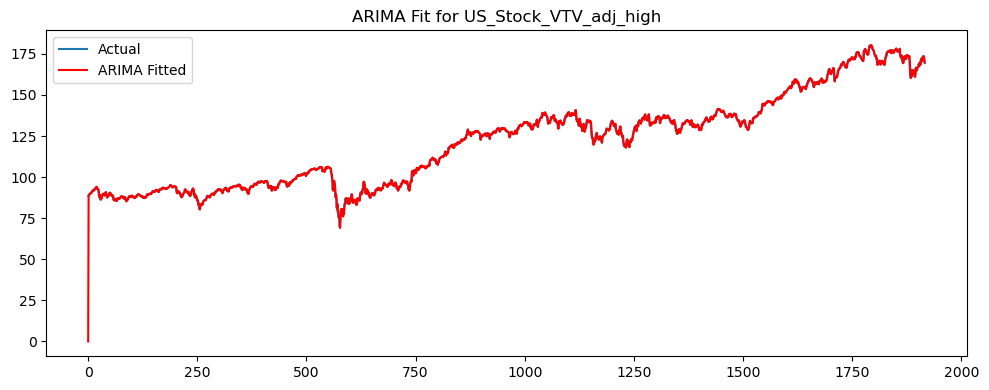

c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



ARIMA summary for US_Stock_VTV_adj_close:
                                 SARIMAX Results                                  
Dep. Variable:     US_Stock_VTV_adj_close   No. Observations:                 1853
Model:                     ARIMA(1, 1, 1)   Log Likelihood               -3072.548
Date:                    Tue, 02 Sep 2025   AIC                           6151.096
Time:                            15:35:42   BIC                           6167.668
Sample:                                 0   HQIC                          6157.204
                                   - 1853                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4287      0.132     -3.258      0.001      -0.687      -0.171
ma.L1          0.3621      0.136      2.659      0.008  

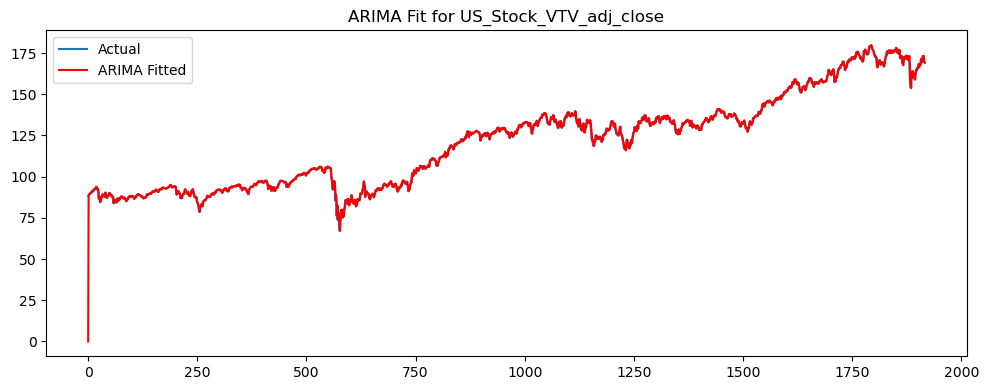

c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



ARIMA summary for US_Stock_VTV_adj_open:
                                 SARIMAX Results                                 
Dep. Variable:     US_Stock_VTV_adj_open   No. Observations:                 1853
Model:                    ARIMA(1, 1, 1)   Log Likelihood               -3043.708
Date:                   Tue, 02 Sep 2025   AIC                           6093.415
Time:                           15:35:43   BIC                           6109.987
Sample:                                0   HQIC                          6099.524
                                  - 1853                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5469      0.124     -4.405      0.000      -0.790      -0.304
ma.L1          0.4767      0.130      3.668      0.000       0.22

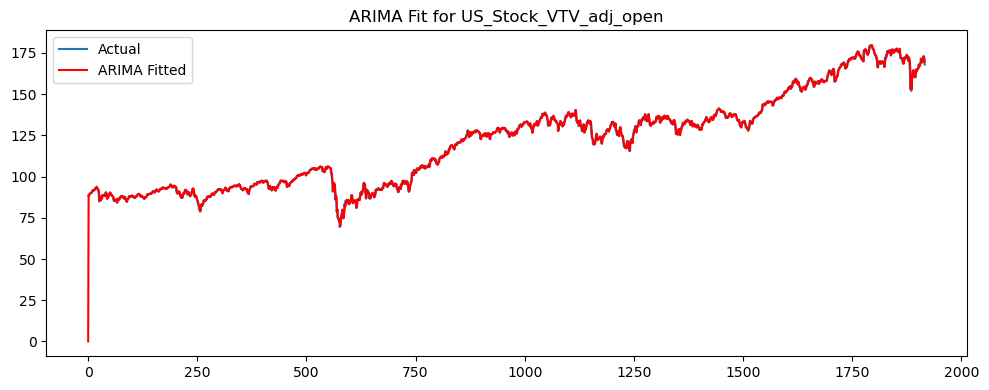

c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



ARIMA summary for US_Stock_VTV_adj_low:
                                SARIMAX Results                                 
Dep. Variable:     US_Stock_VTV_adj_low   No. Observations:                 1853
Model:                   ARIMA(1, 1, 1)   Log Likelihood               -2879.476
Date:                  Tue, 02 Sep 2025   AIC                           5764.952
Time:                          15:35:44   BIC                           5781.524
Sample:                               0   HQIC                          5771.061
                                 - 1853                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1599      0.103      1.555      0.120      -0.042       0.362
ma.L1          0.0088      0.106      0.082      0.934      -0.200       0

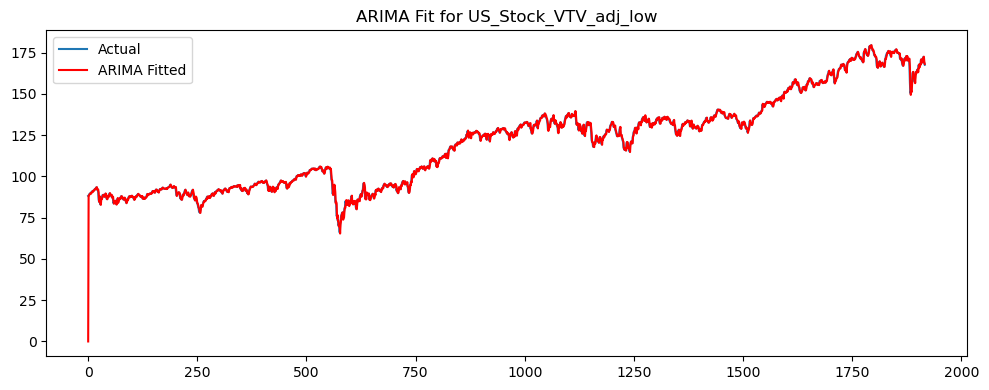

c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\USER\.conda\envs\Emmanuel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



ARIMA summary for US_Stock_SPYV_adj_high:
                                 SARIMAX Results                                  
Dep. Variable:     US_Stock_SPYV_adj_high   No. Observations:                 1853
Model:                     ARIMA(1, 1, 1)   Log Likelihood                -475.503
Date:                    Tue, 02 Sep 2025   AIC                            957.007
Time:                            15:35:44   BIC                            973.579
Sample:                                 0   HQIC                           963.116
                                   - 1853                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1037      0.155      0.669      0.503      -0.200       0.407
ma.L1          0.0071      0.155      0.046      0.963  

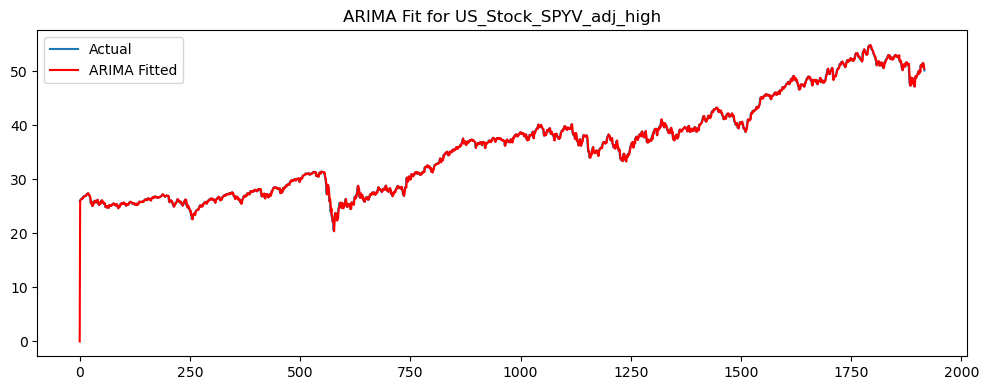

In [19]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# ARIMA modeling for each feature in top_20_features (limit to first 5 for speed)
for feature in list(top_20_features)[:5]:
    series = train[feature].dropna()
    # Fit ARIMA model (order can be tuned, here (1,1,1) as example)
    try:
        model = ARIMA(series, order=(1, 1, 1))
        model_fit = model.fit()
        print(f"\nARIMA summary for {feature}:")
        print(model_fit.summary())
        
        # Plot actual vs predicted
        plt.figure(figsize=(10, 4))
        plt.plot(series, label='Actual')
        plt.plot(model_fit.fittedvalues, label='ARIMA Fitted', color='red')
        plt.title(f'ARIMA Fit for {feature}')
        plt.legend()
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"ARIMA failed for {feature}: {e}")